In [1]:
import pandas as pd, networkx as nx
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import trace_analysis
import os
import trace_statistics 

# 1st Trace of Normal Network
## All nodes operating
Parse the 1st trace file with 200 packets over a network without any attacker.

In [3]:
nodes1, hops1 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-30-1')
std_values1, outliers1 = trace_analysis.separate_outliers_node_by_node(nodes1)

hop_nodes1 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1')
hop_std_values1, hop_outliers1 = trace_analysis.separate_outliers(hop_nodes1)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


In [4]:
hop_nodes1.keys()

Int64Index([1, 2], dtype='int64')

Produce Histogram of delay depending on the hop-distance from the root

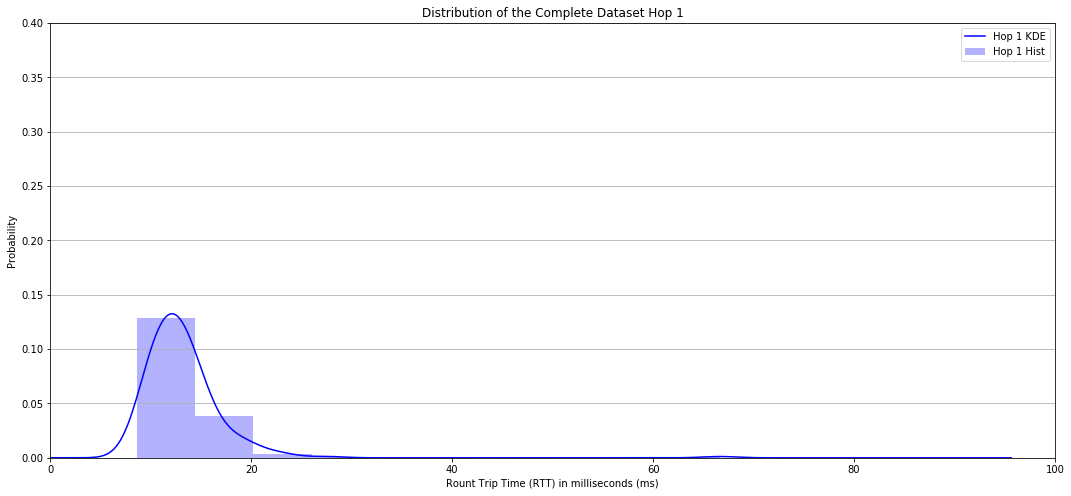

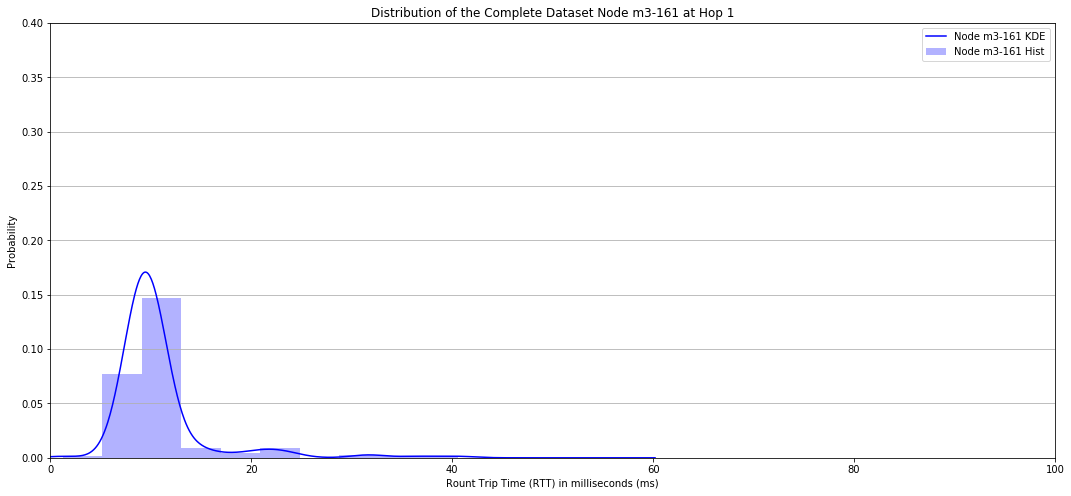

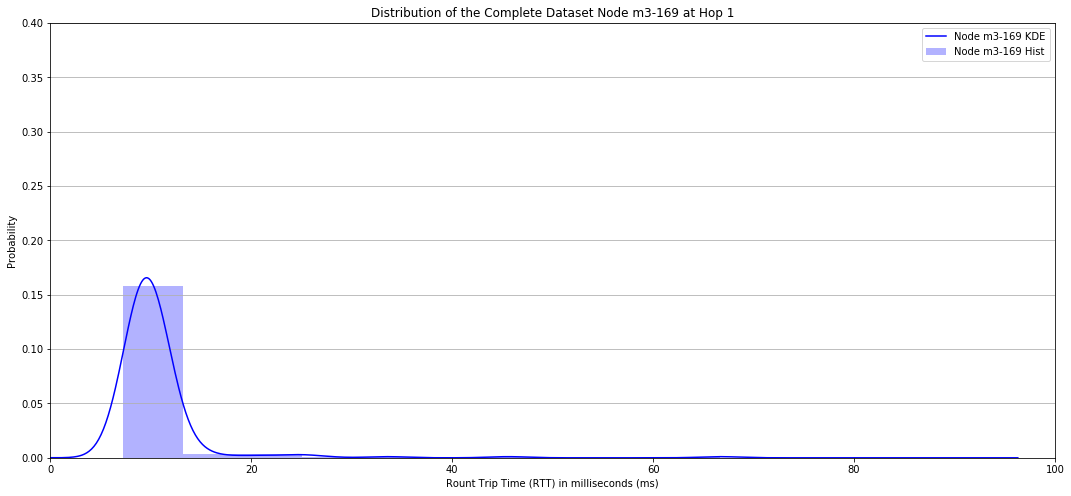

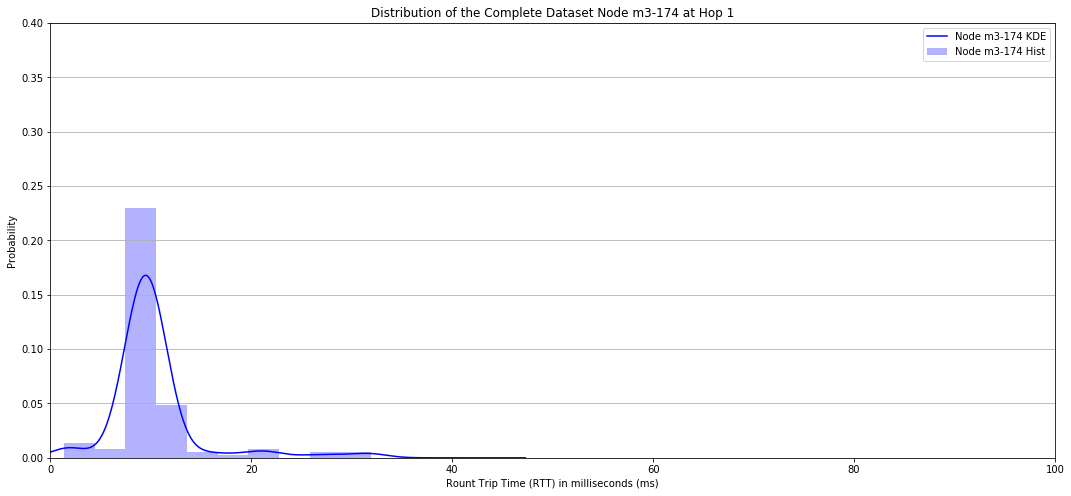

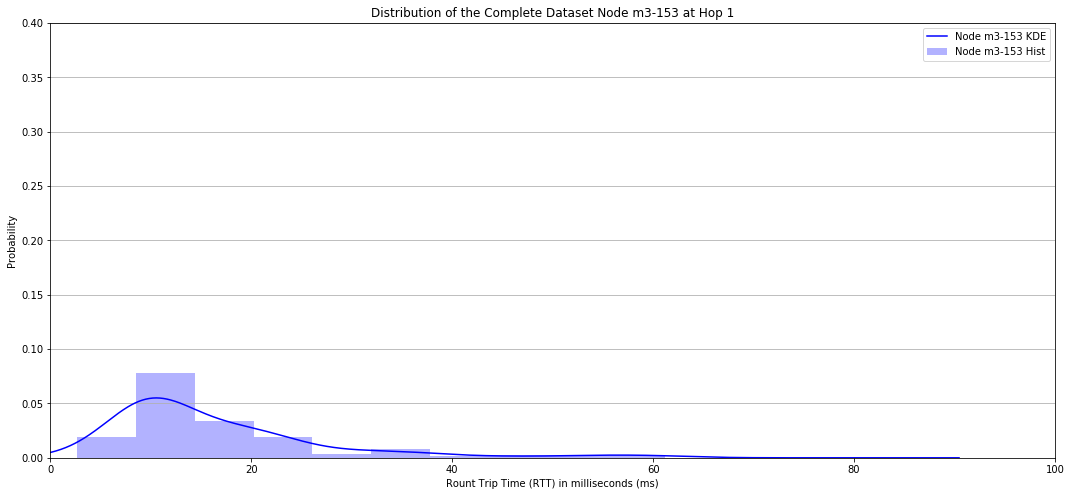

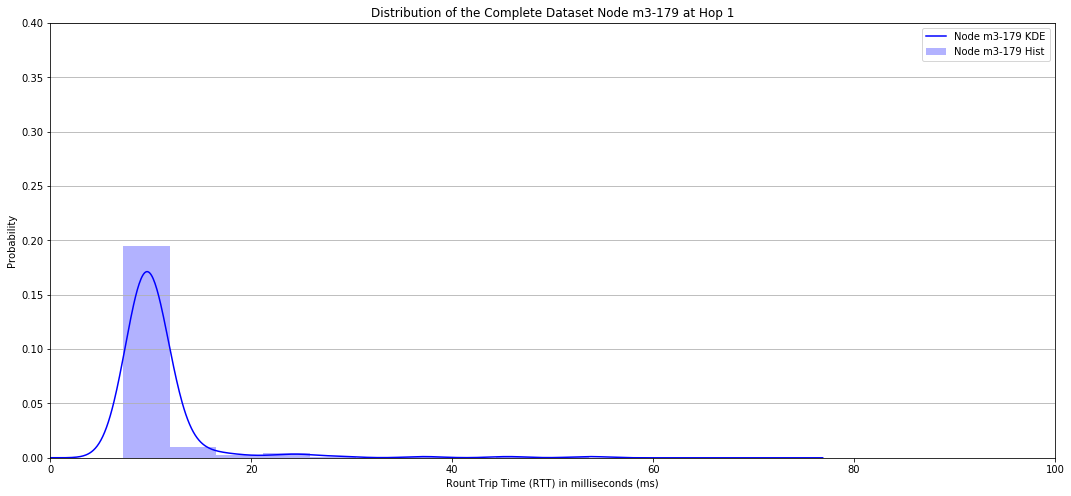

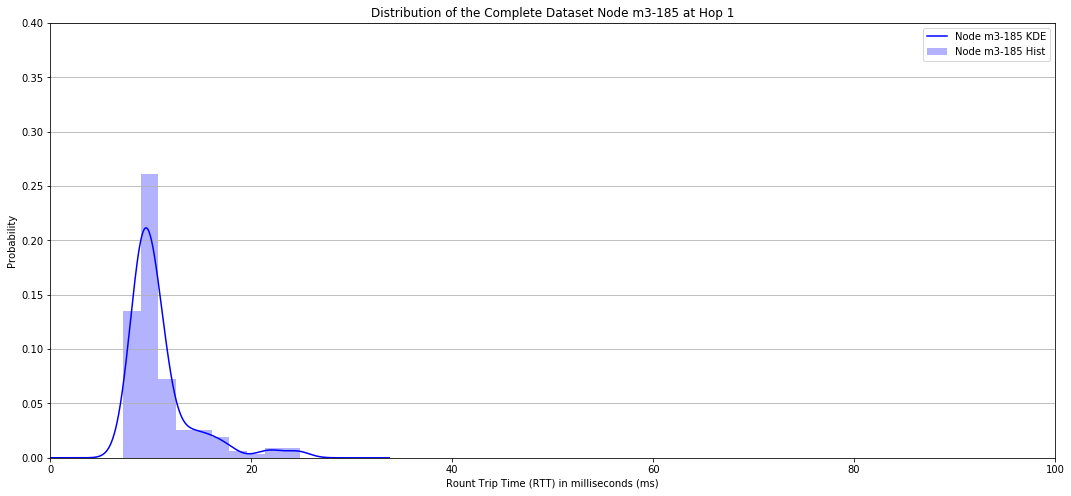

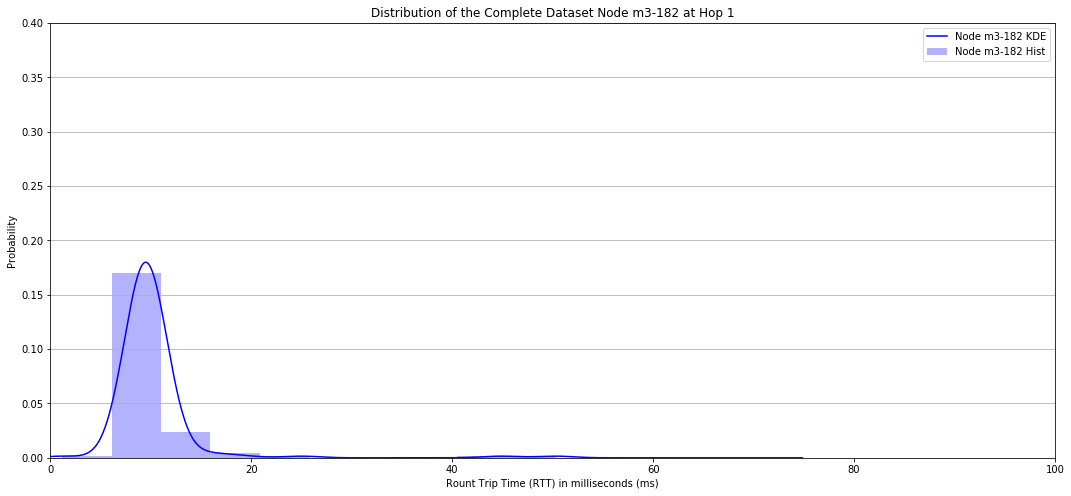

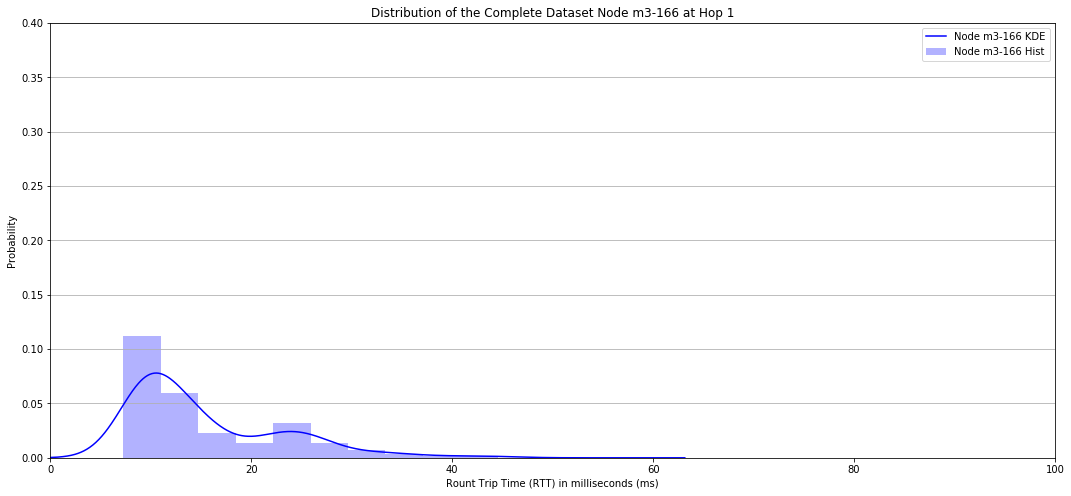

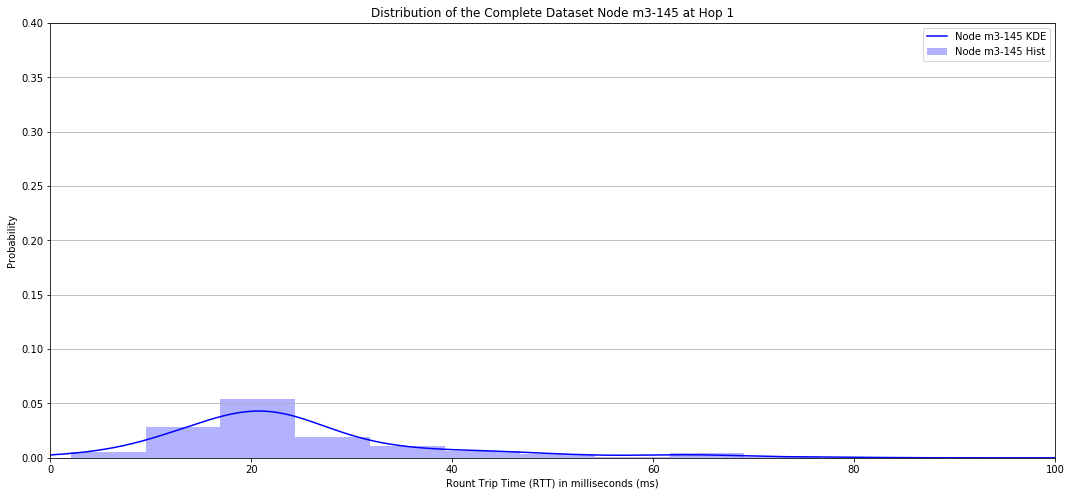

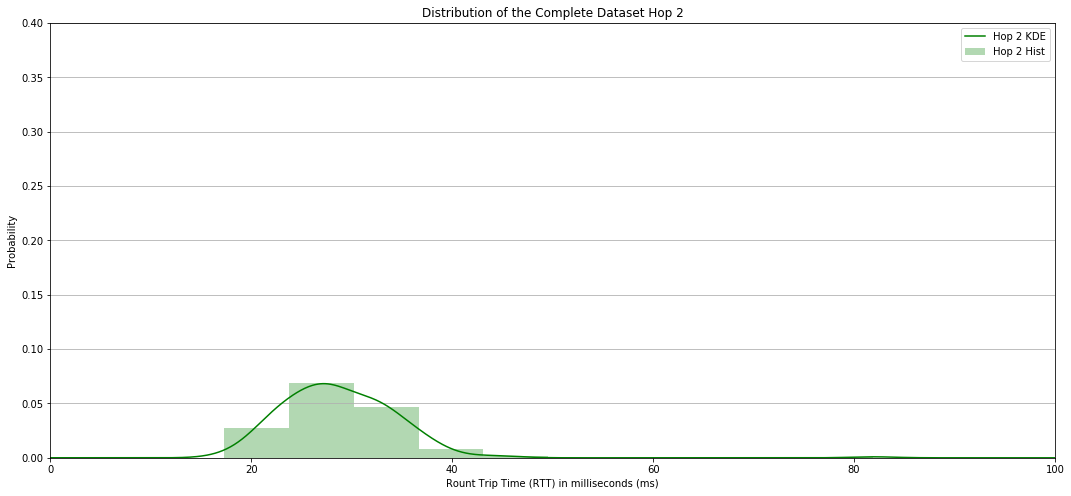

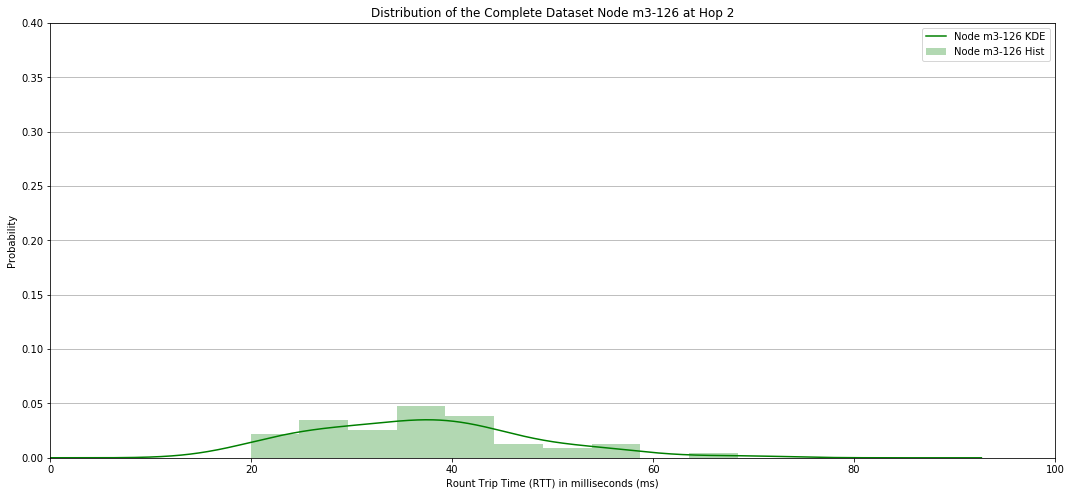

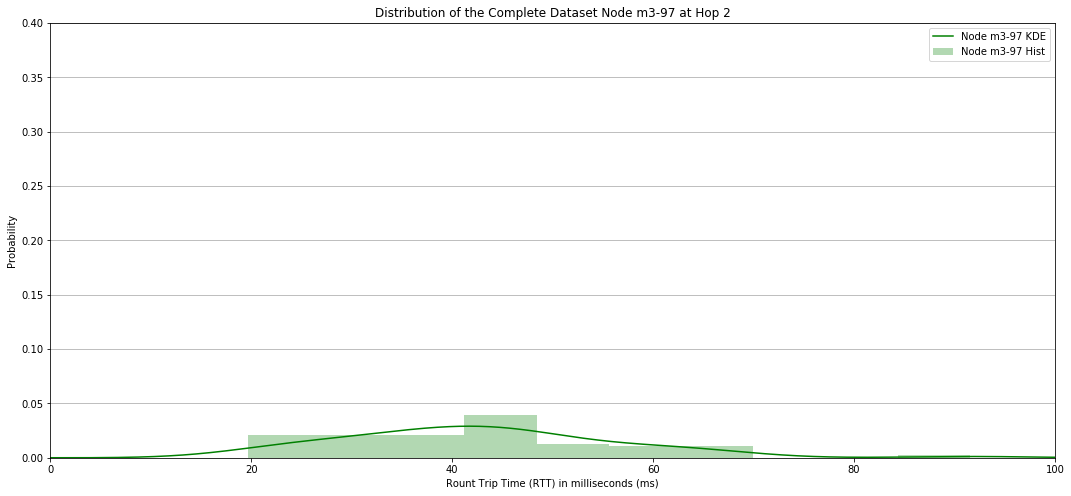

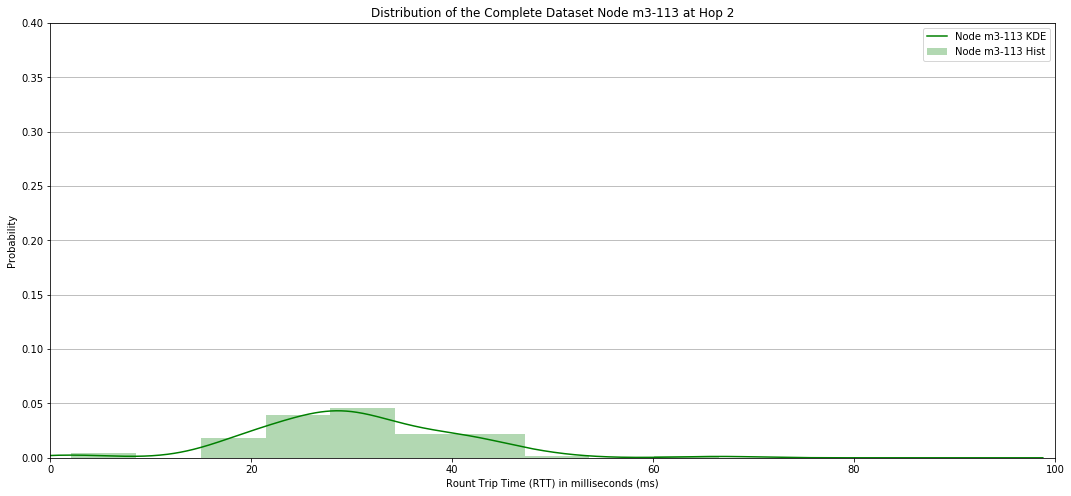

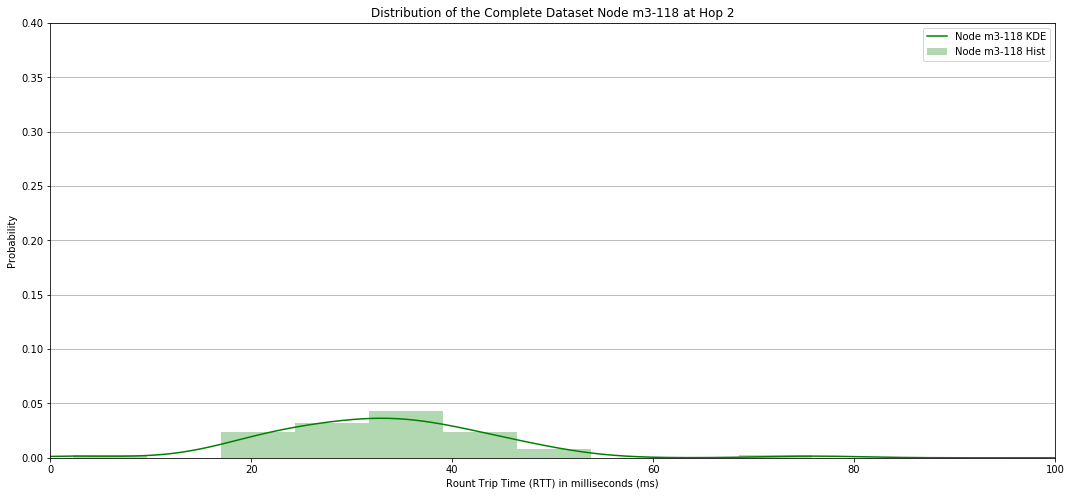

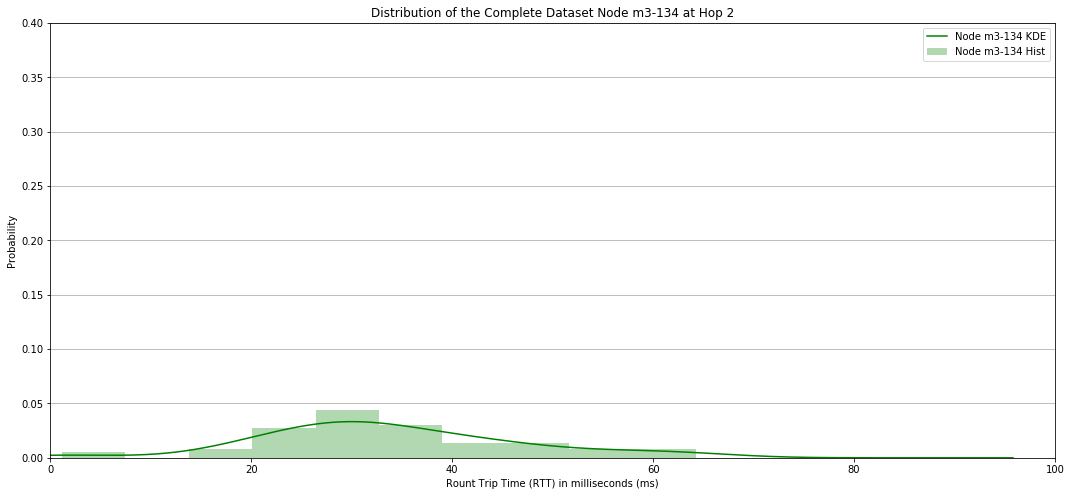

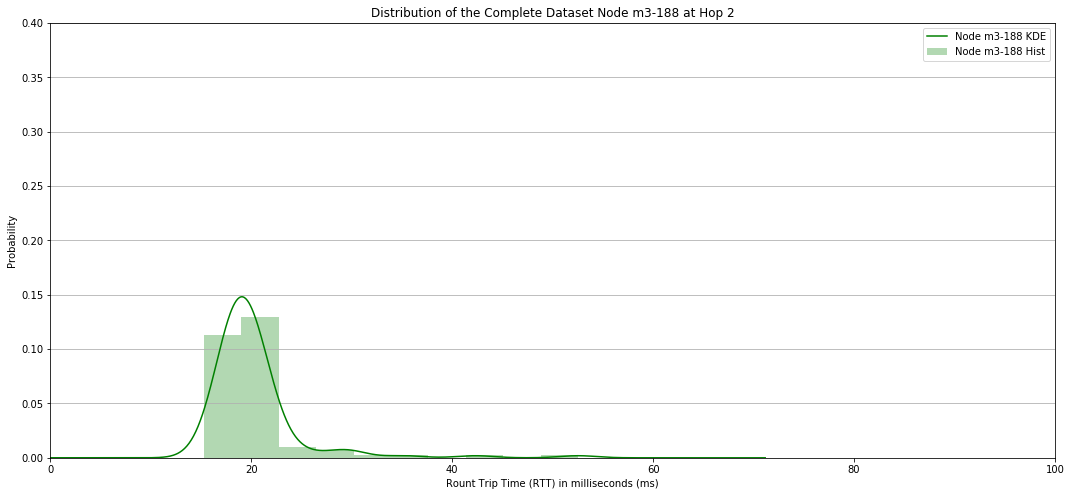

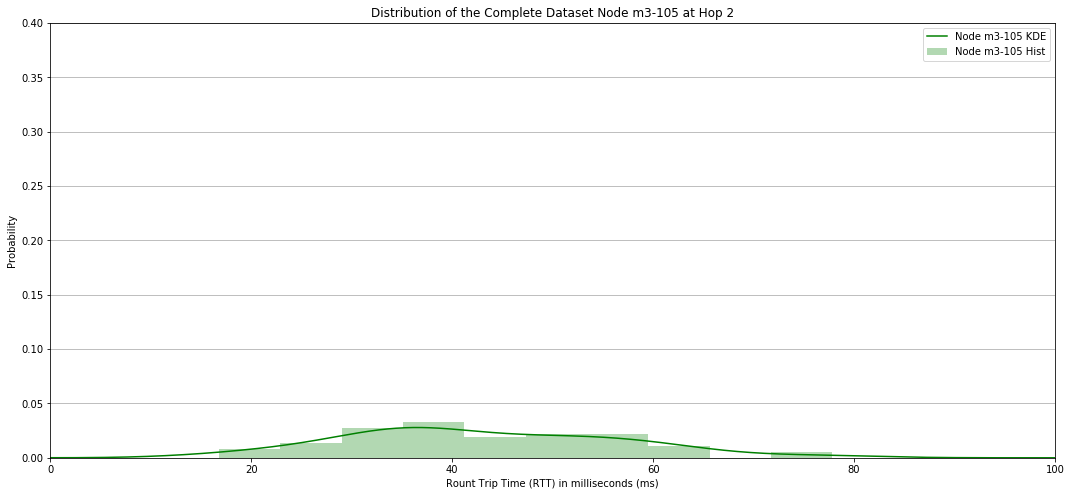

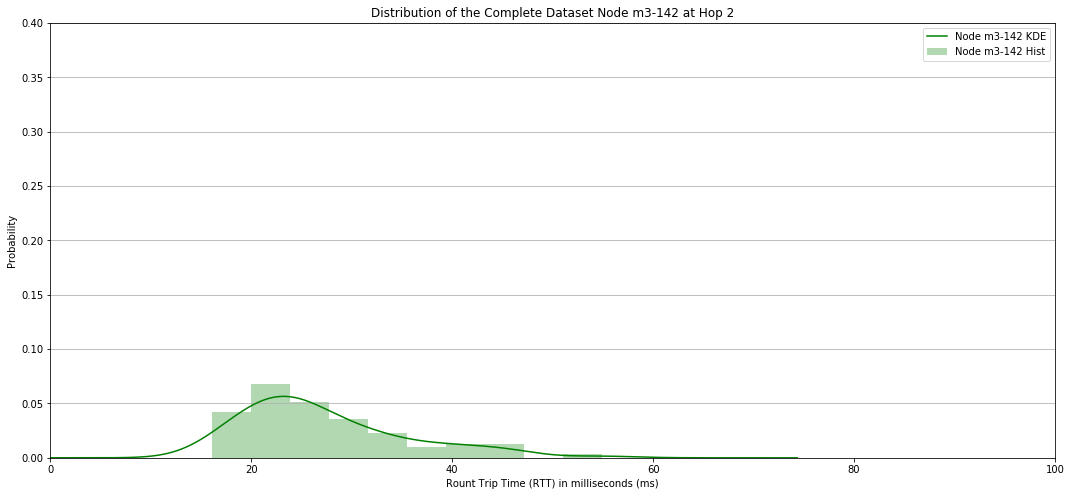

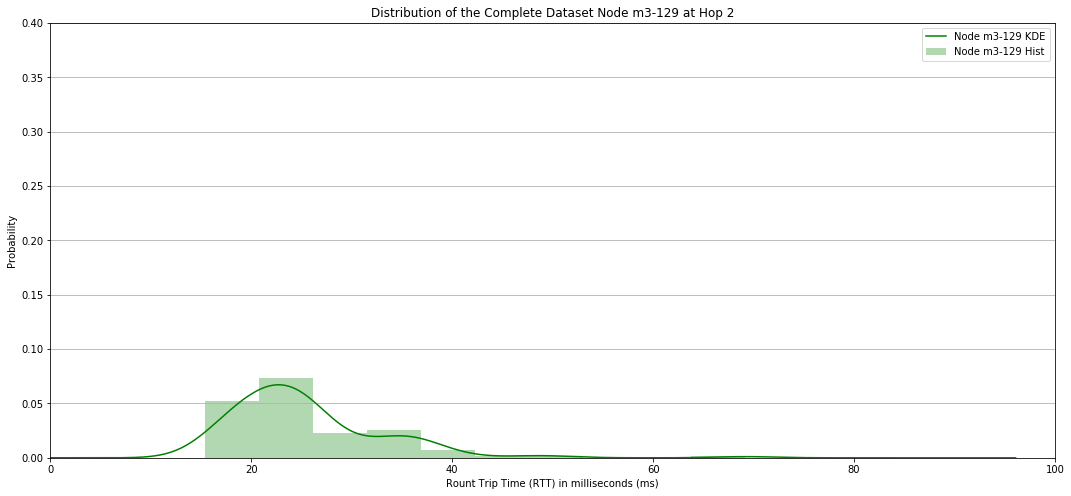

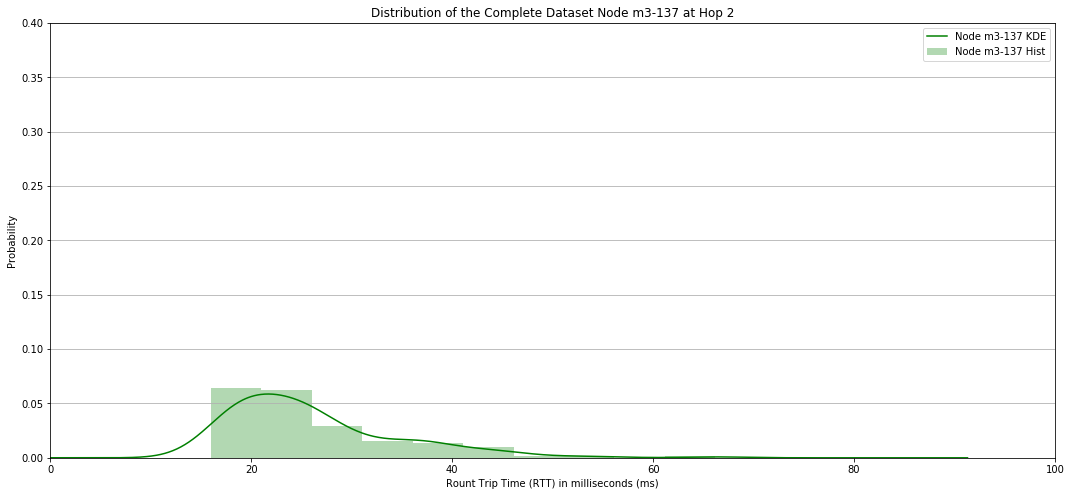

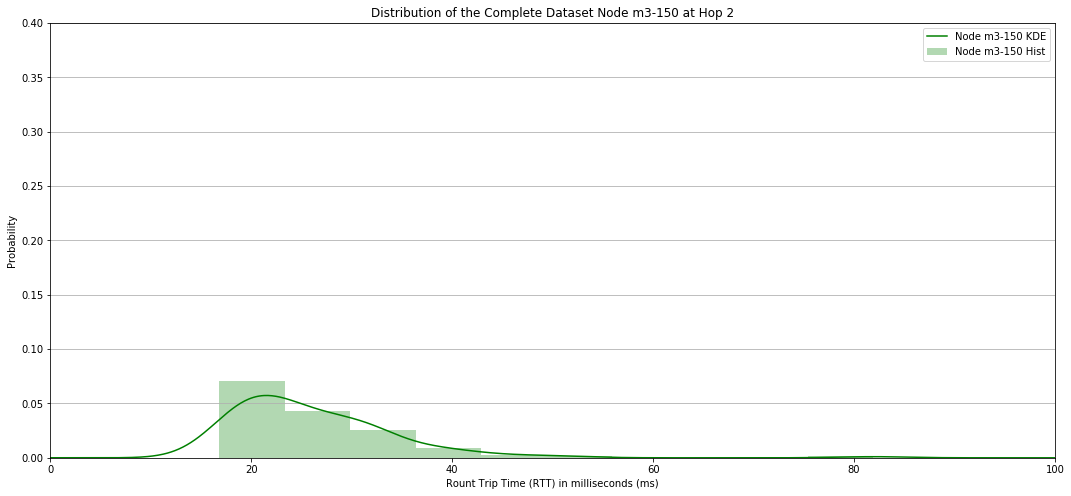

In [87]:
color = ['', 'blue', 'green', 'red']


for hop in hops1.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops1[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes1[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes1[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Compare Hops

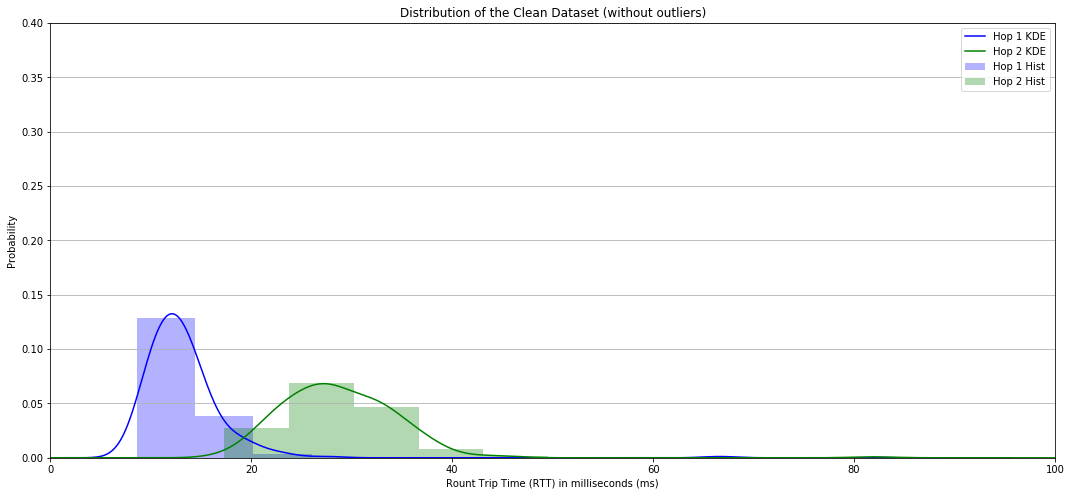

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes1.keys():
    hop_nodes1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

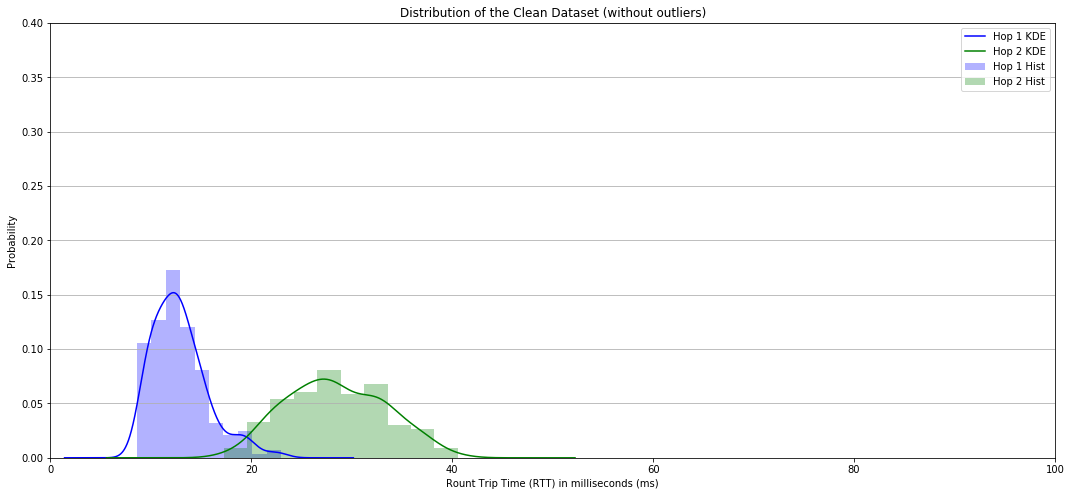

In [7]:
color = ['', 'blue', 'green', 'red']

fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values1.keys():
    hop_std_values1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

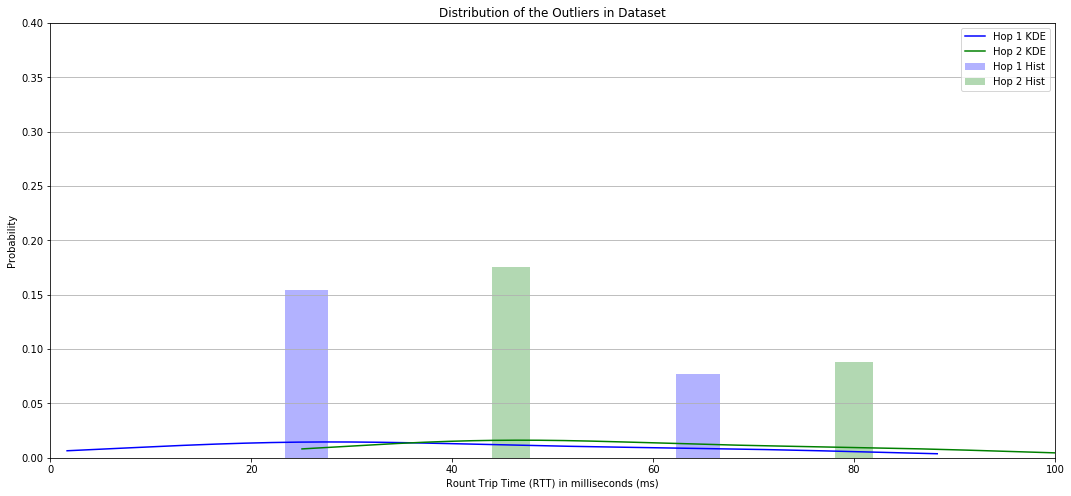

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers1.keys():
    hop_outliers1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


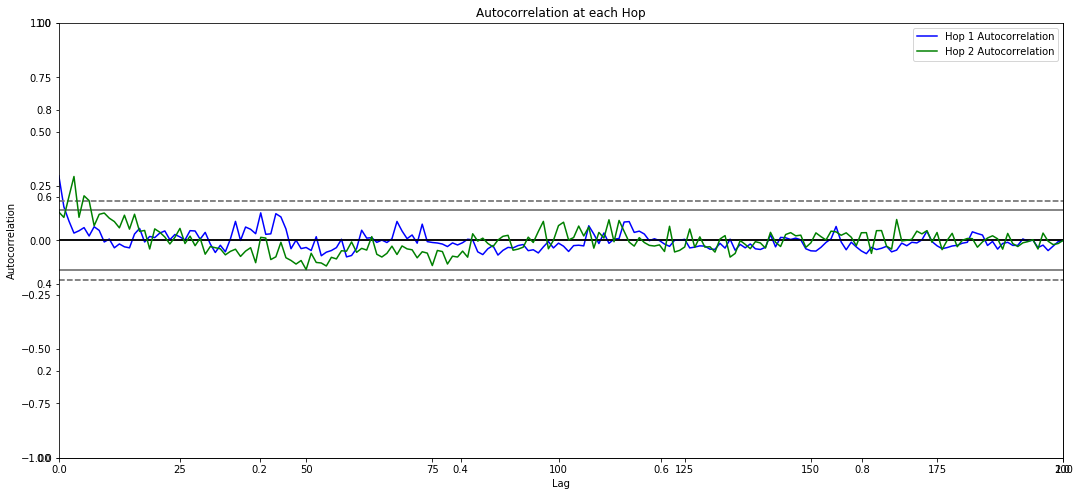

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes1.keys():
    autocorrelation_plot(hop_nodes1[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling/rolling windows

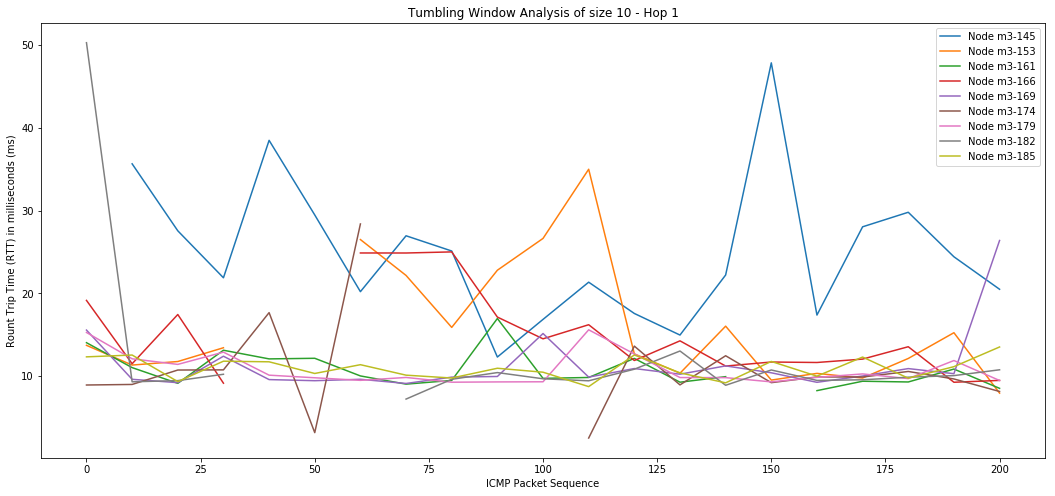

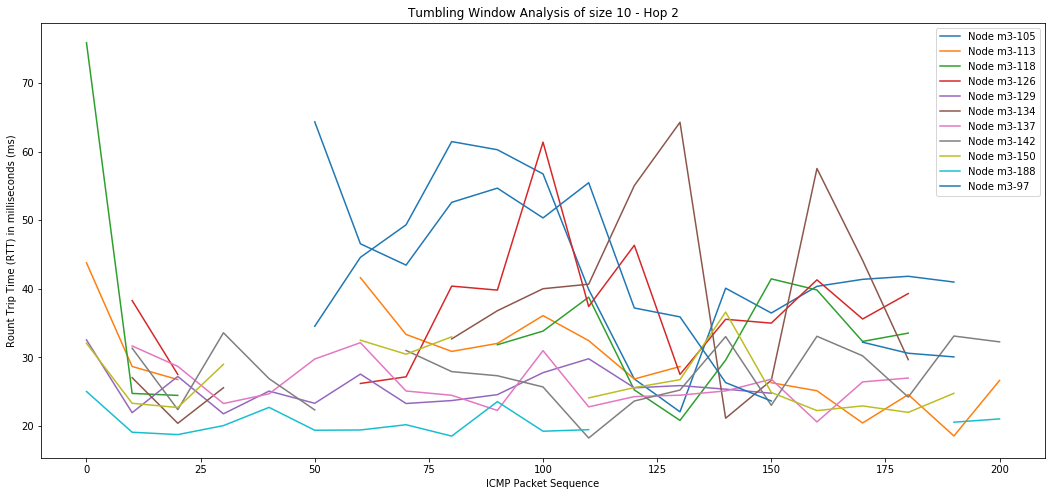

In [10]:
window_size = 10
for h in hops1.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes1:
        if node in hops1[h]:
            plt.plot(nodes1[node].groupby(nodes1[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by Hop tumbling window

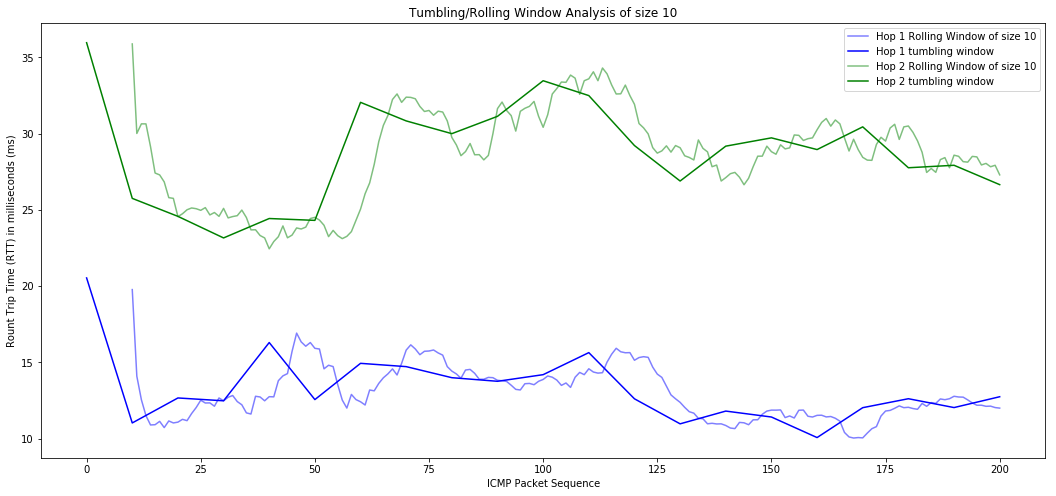

In [11]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes1.keys():
    plt.plot(hop_nodes1[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes1[hop].groupby(hop_nodes1[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

Outliers

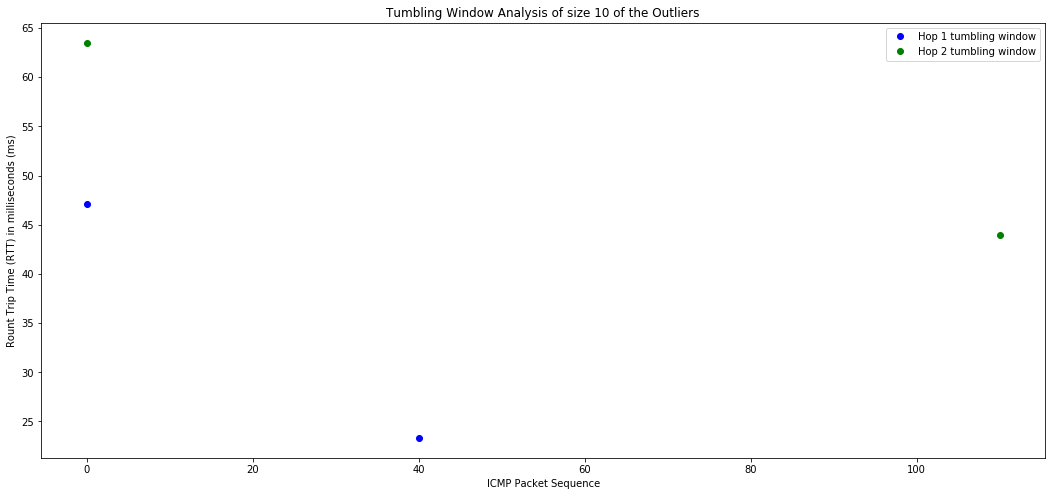

In [12]:
window_size = 10 
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes1.keys():
    plt.plot(hop_outliers1[hop].groupby(hop_outliers1[hop].index // window_size * window_size).mean(), 'o', color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' of the Outliers')
plt.legend()

### Statistics

For each hop

In [13]:
hop_nodes1.describe()

1           2
count  200.000000  200.000000
mean    13.283401   28.862192
std      4.859530    6.353471
min      8.592375   17.243000
25%     10.972792   24.742000
50%     12.621688   28.089250
75%     14.442958   32.407850
max     66.632000   81.920000

For each node

In [14]:
nodes1.describe()

m3-105     m3-113     m3-118     m3-126      m3-129     m3-134  \
count  59.000000  78.000000  51.000000  48.000000  124.000000  58.000000   
mean   43.042797  30.337782  33.125137  36.952333   25.474363  33.807483   
std    13.470991   9.911898  11.164617  10.641857    7.759921  13.025660   
min    16.777000   2.067000   2.231000  19.922000   15.382000   1.143000   
25%    34.531500  24.402000  26.005000  28.188000   20.495750  26.088000   
50%    40.367000  29.247000  32.814000  37.021500   23.763500  31.519000   
75%    52.734000  35.876250  38.928000  42.110750   27.502500  41.336000   
max    77.839000  66.558000  75.869000  68.431000   69.188000  64.270000   

           m3-137     m3-142      m3-145      m3-150      m3-153      m3-161  \
count  156.000000  80.000000  124.000000  115.000000  133.000000  171.000000   
mean    26.152551  27.179750   24.618903   26.251461   16.590977   10.809351   
std      8.542636   8.144918   13.081151    8.732473   11.039550    4.894322   
min     15.974000  16.051000    2.023000   16.813000    2.659000    1.202000   
25%     19.856500  21.436000   17.025750   20.641500    9.546000    8.778000   
50%     24.499500  24.874500   21.710500   24.255000   11.427000    9.735000   
75%     29.199000  31.089750   27.234500   30.359000   19.827000   10.733500   
max     66.194000  54.921000   76.545000   81.920000   61.195000   40.531000   

           m3-166      m3-169      m3-174      m3-179      m3-182      m3-185  \
count  153.000000  194.000000  121.000000  196.000000  146.000000  180.000000   
mean    15.312627   10.649005   10.298678   10.819240   10.242007   10.851839   
std      7.540714    5.648393    4.614275    5.266535    4.907979    3.273578   
min      7.259000    7.269000    1.331000    7.229000    1.182000    7.204000   
25%      9.805000    8.856250    8.468000    8.829500    8.823000    9.113000   
50%     12.296000    9.624500    9.730000    9.776500    9.470500    9.754000   
75%     20.514000   10.613500   10.381000   10.744000   10.416750   11.035000   
max     44.524000   66.632000   31.963000   53.667000   50.294000   24.892000   

           m3-188      m3-97  
count  112.000000  53.000000  
mean    20.263946  42.851057  
std      4.767721  13.777012  
min     15.272000  19.632000  
25%     18.068500  33.670000  
50%     19.113000  42.188000  
75%     20.708250  49.174000  
max     52.533000  91.570000

Loss

In [15]:
pd.DataFrame([[h, str((len(hop_nodes1[h]) - hop_nodes1[h].count())/len(hop_nodes1[h])*100) +'%'] 
              for h in hop_nodes1.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 0.0%
1    2                 0.0%

In [16]:
pd.DataFrame([[n, h, str((len(nodes1[n]) - nodes1[n].count())/len(nodes1[n])*100) +'%'] 
              for n in nodes1.keys() for h in hops1.keys() if n in hops1[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
17  m3-185    1                10.0%
16  m3-182    1                27.0%
15  m3-179    1                 2.0%
14  m3-174    1                39.5%
13  m3-169    1                 3.0%
12  m3-166    1                23.5%
11  m3-161    1                14.5%
8   m3-145    1                38.0%
10  m3-153    1                33.5%
0   m3-105    2                70.5%
9   m3-150    2                42.5%
7   m3-142    2                60.0%
6   m3-137    2                22.0%
5   m3-134    2                71.0%
4   m3-129    2                38.0%
3   m3-126    2                76.0%
2   m3-118    2                74.5%
1   m3-113    2                61.0%
18  m3-188    2                44.0%
19   m3-97    2                73.5%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

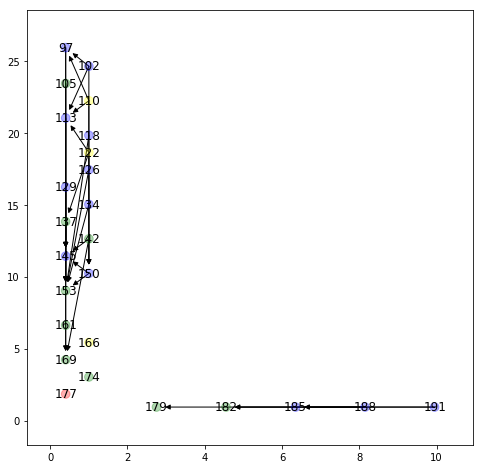

In [17]:
G1 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
plt.show()

## Disconnection of 1 node
Parse the 2nd trace file with 200 packets over a network with 1 node disconnection (node 169).

In [18]:
nodes2, hops2 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')
std_values2, outliers2 = trace_analysis.separate_outliers_node_by_node(nodes2)

hop_nodes2 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')
hop_std_values2, hop_outliers2 = trace_analysis.separate_outliers(hop_nodes2)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

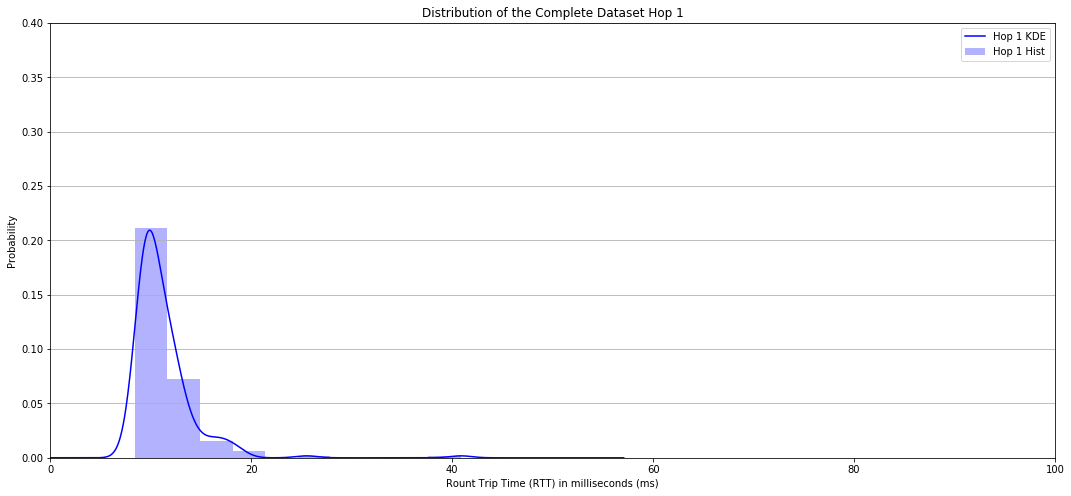

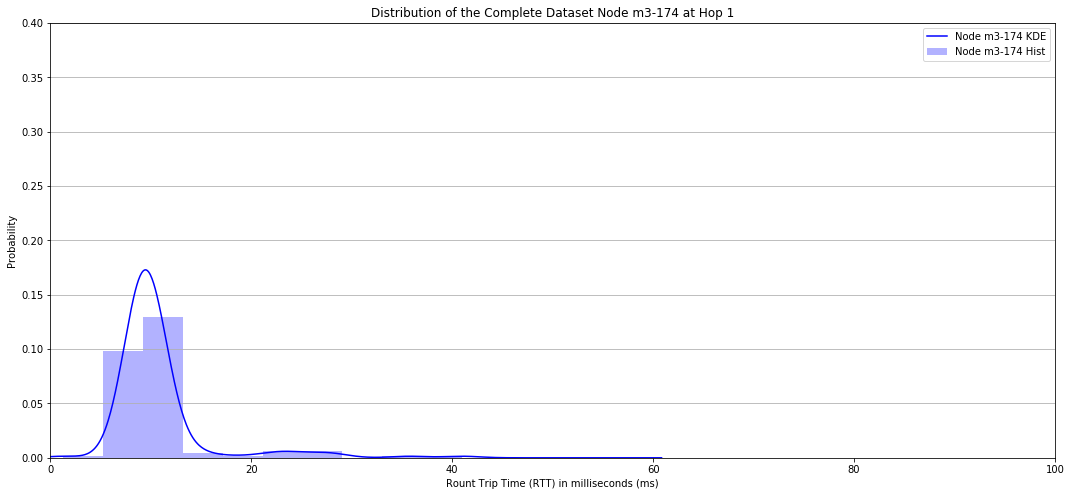

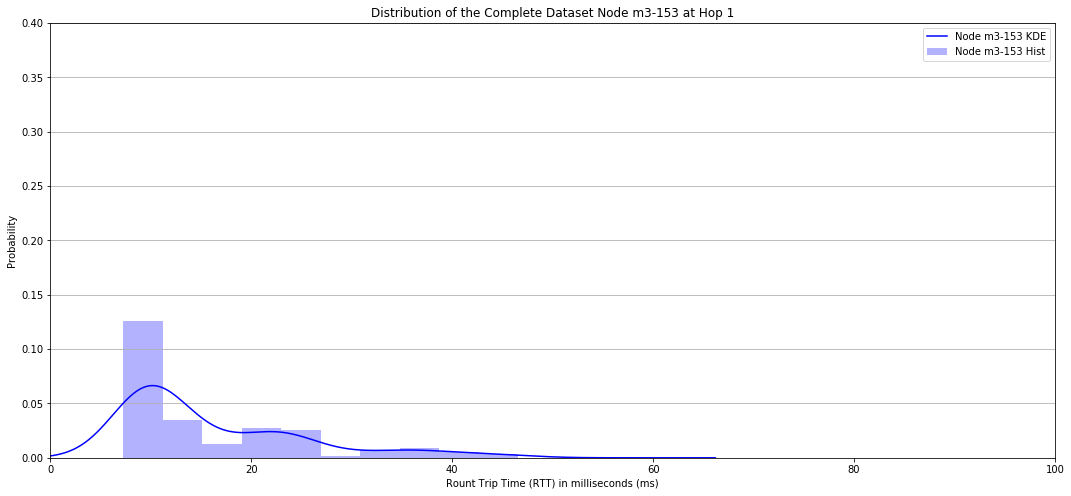

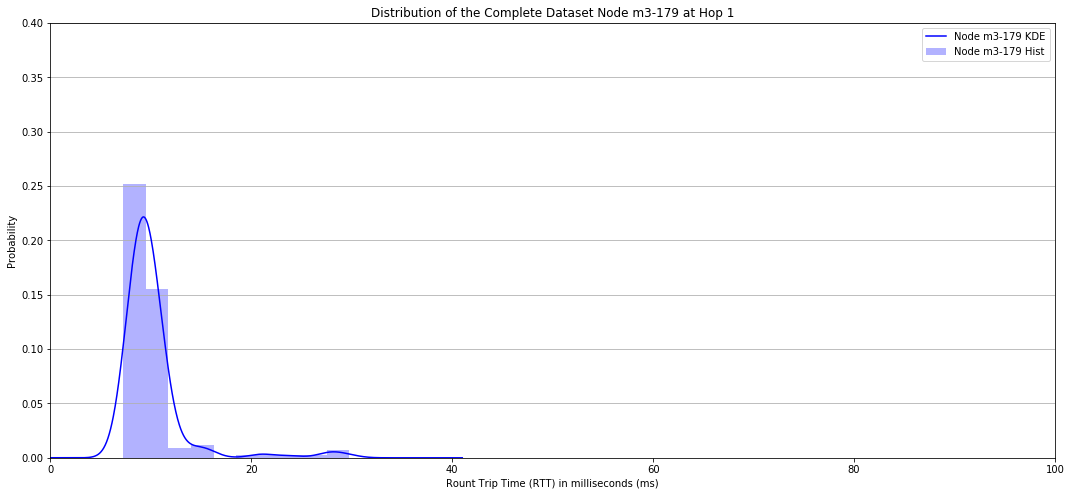

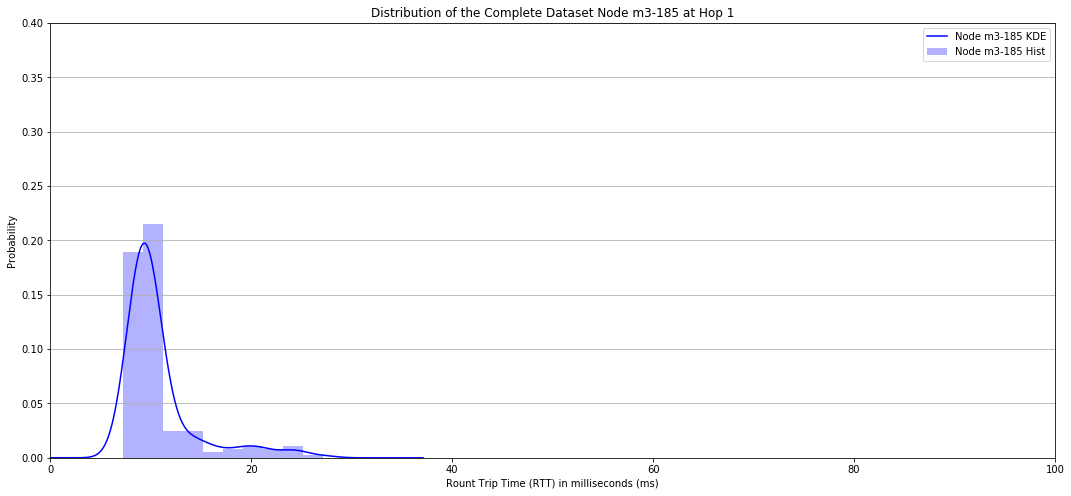

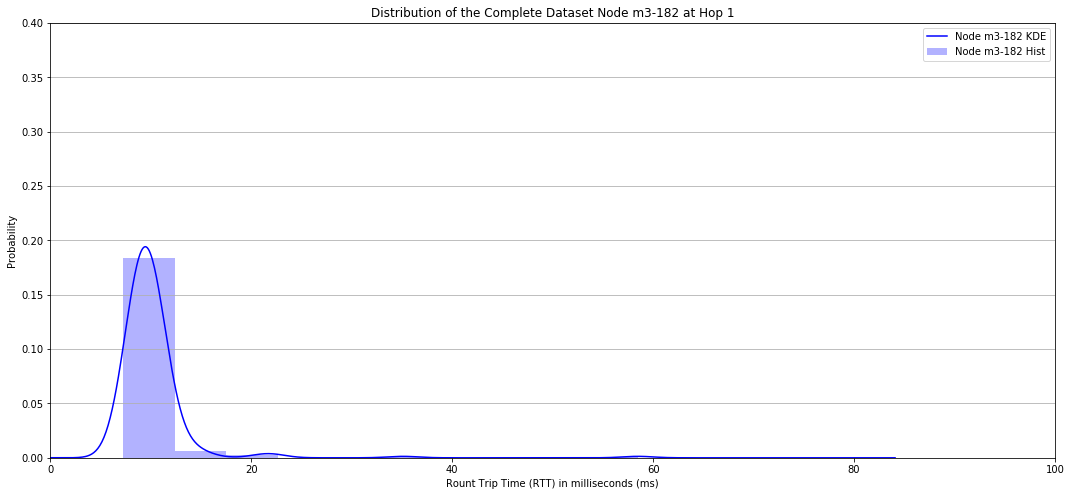

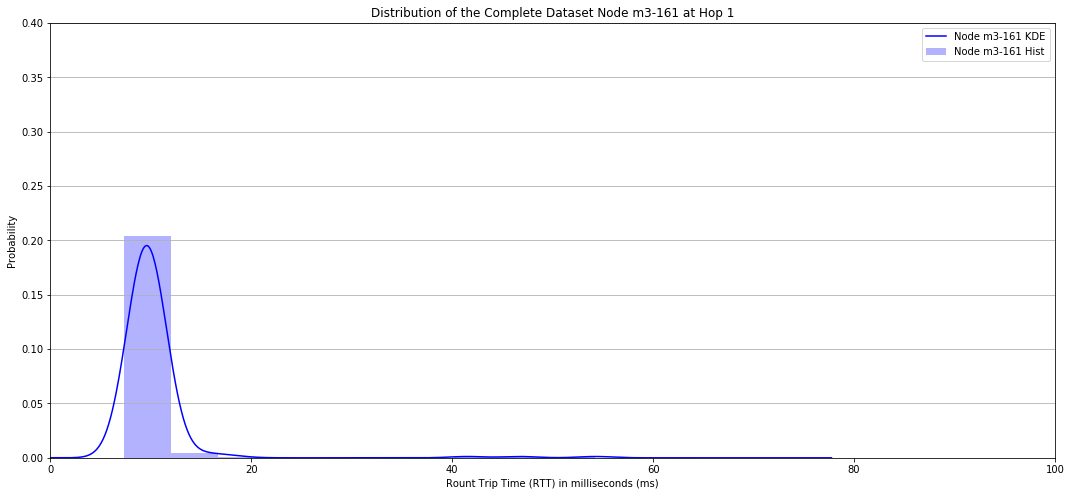

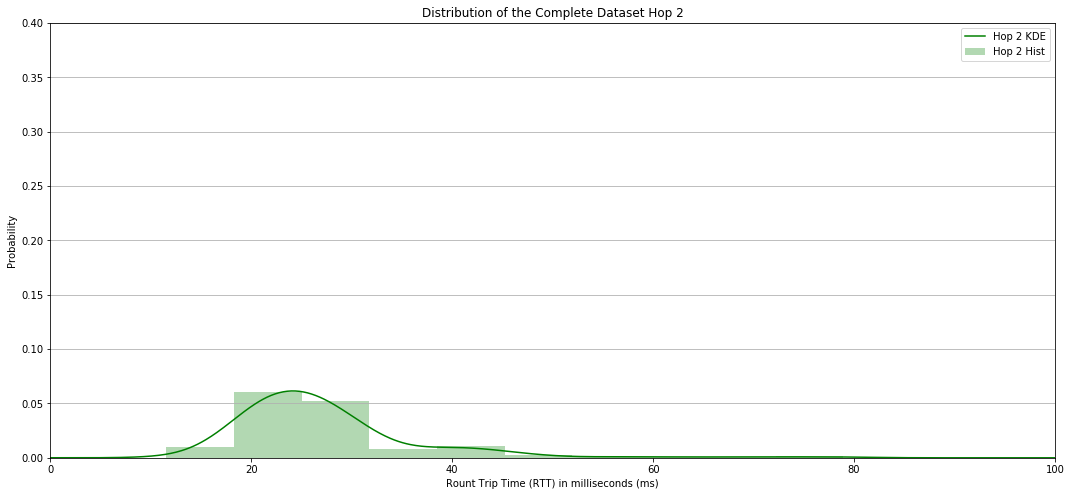

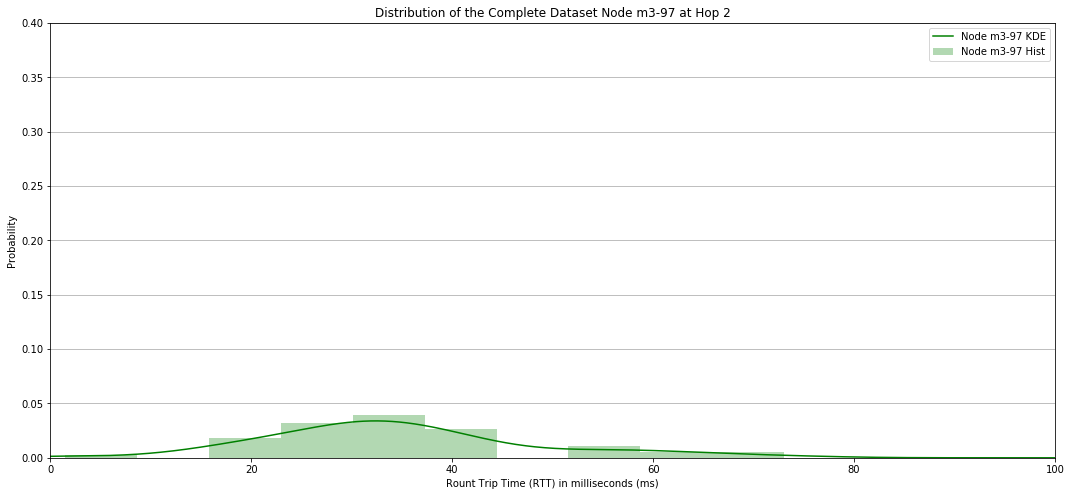

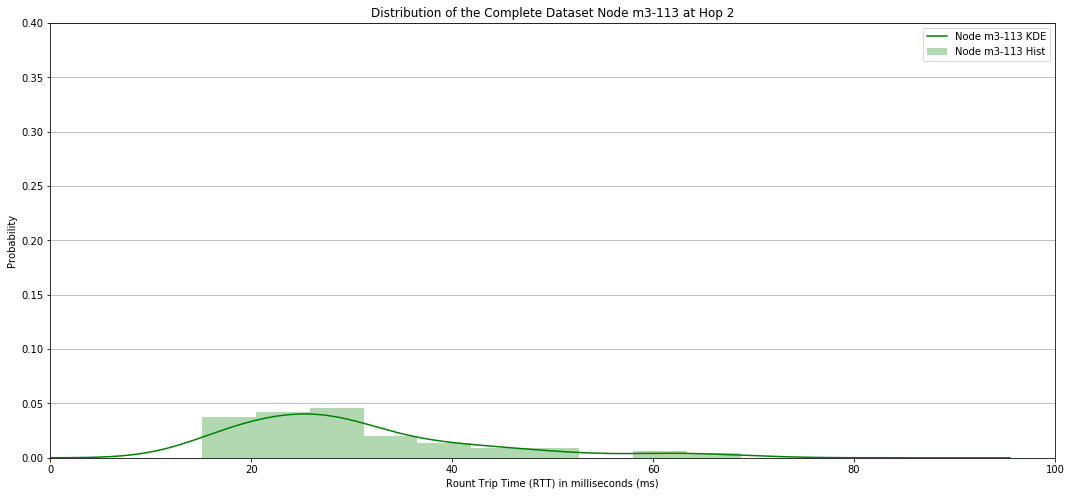

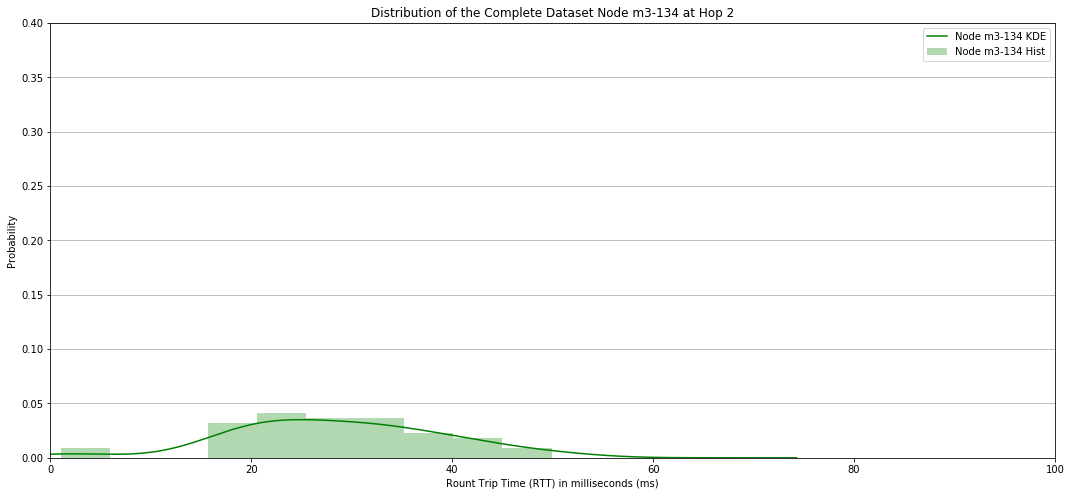

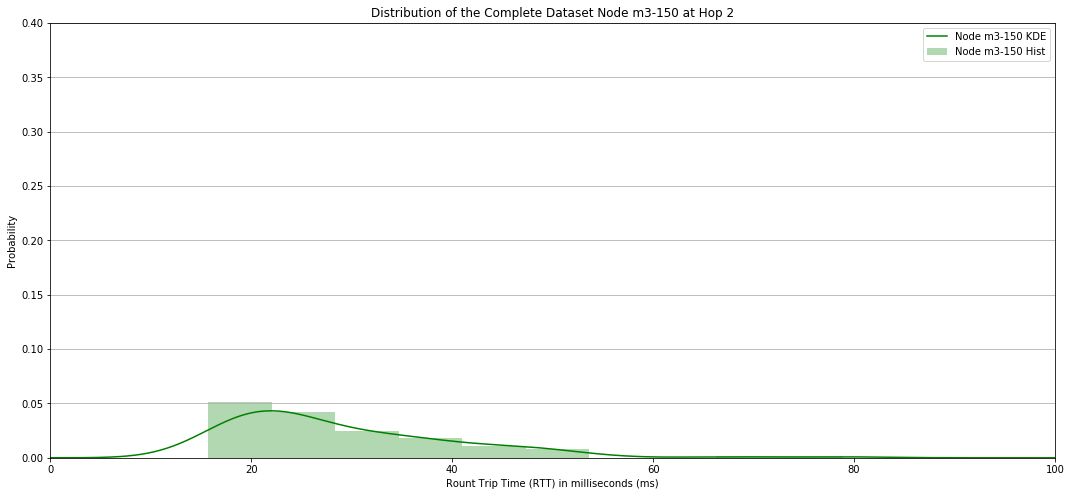

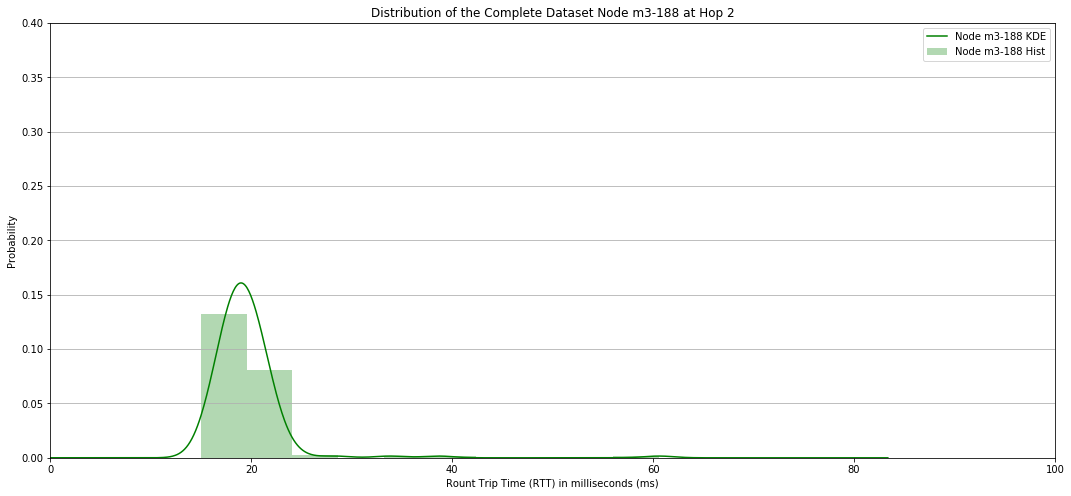

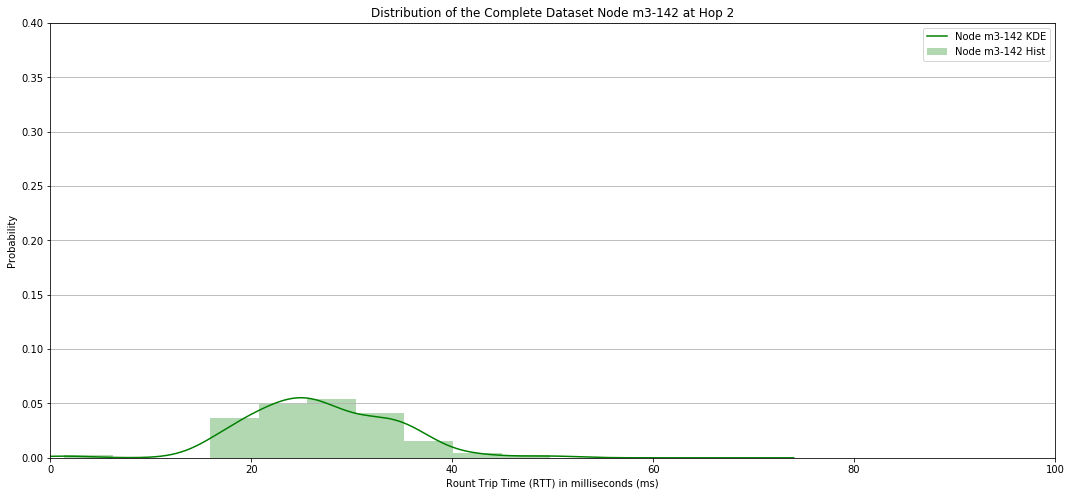

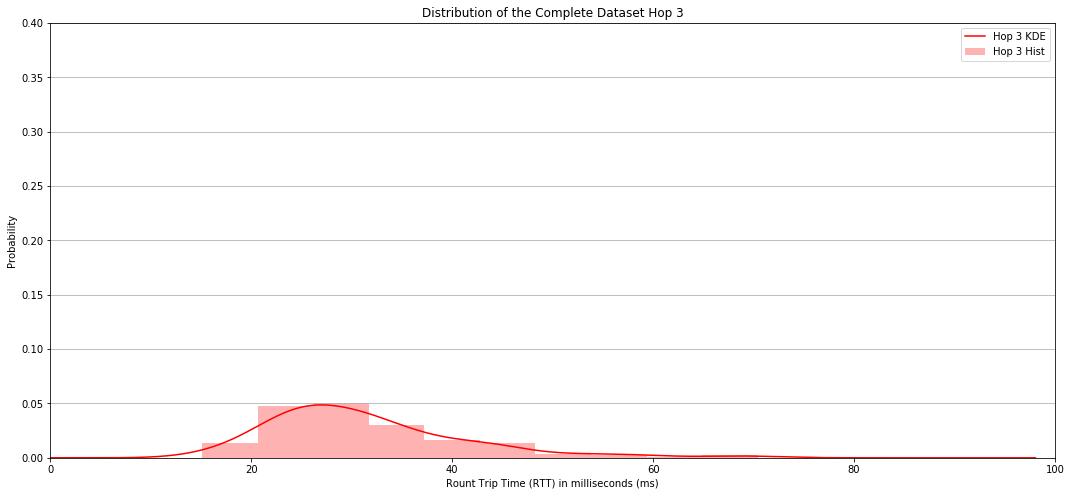

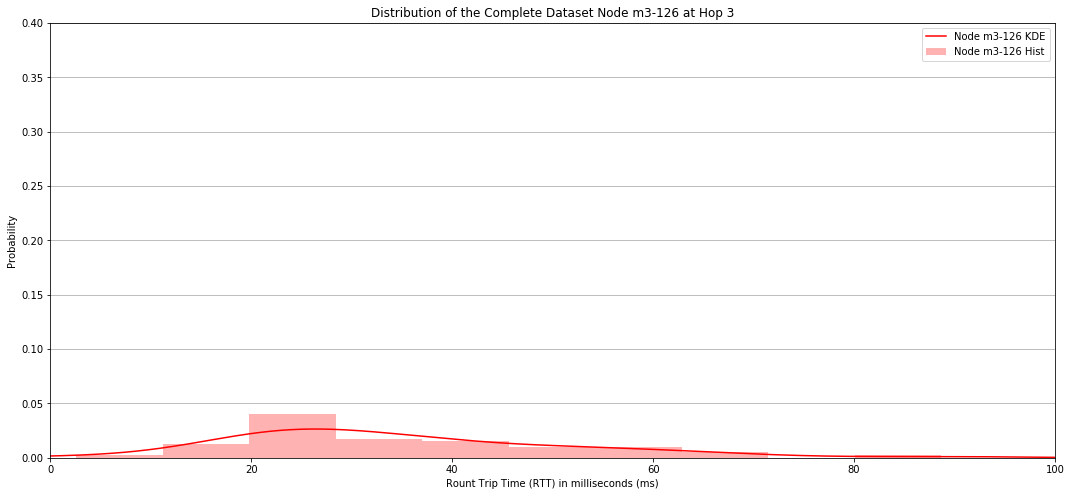

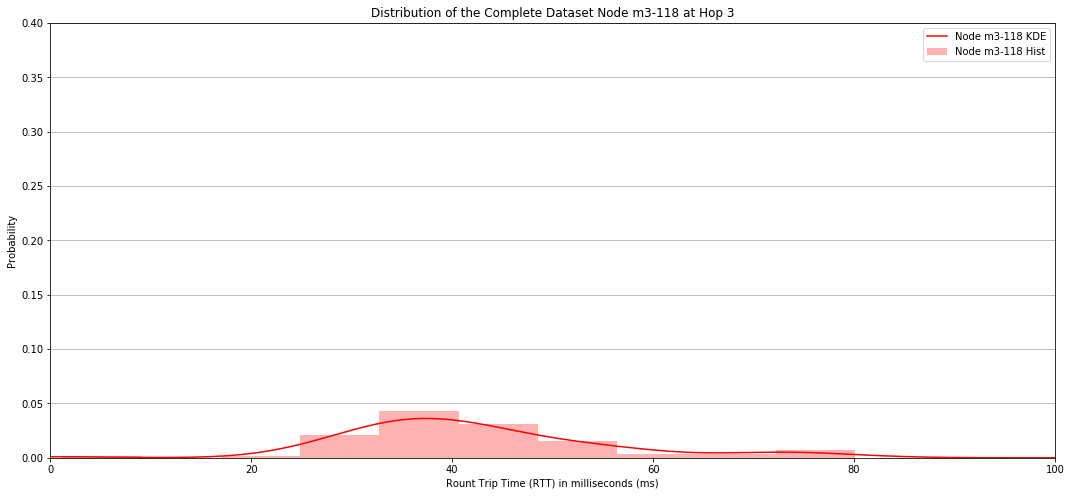

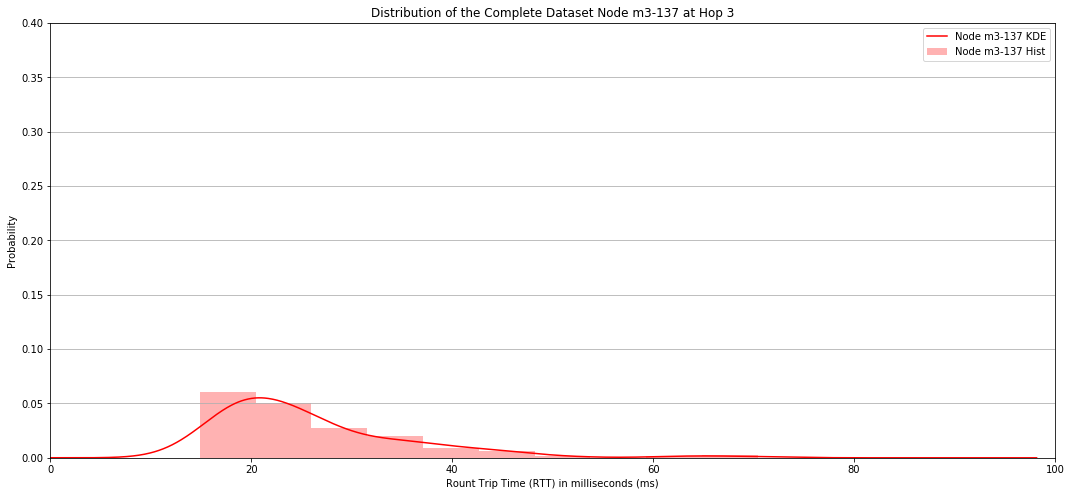

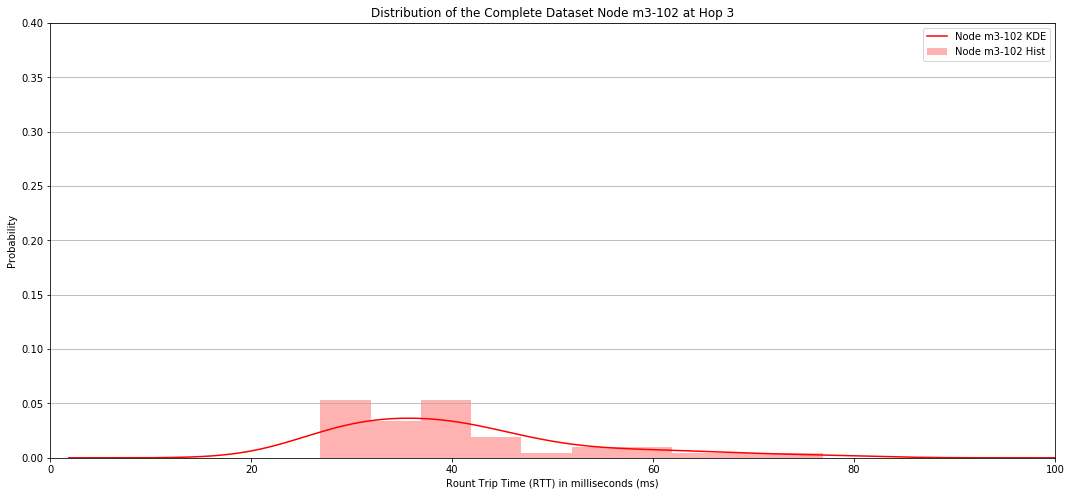

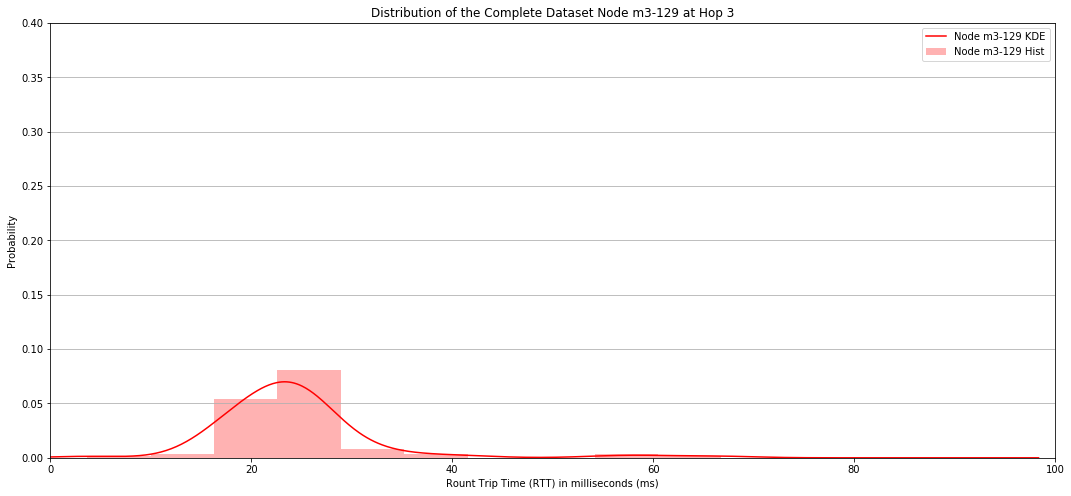

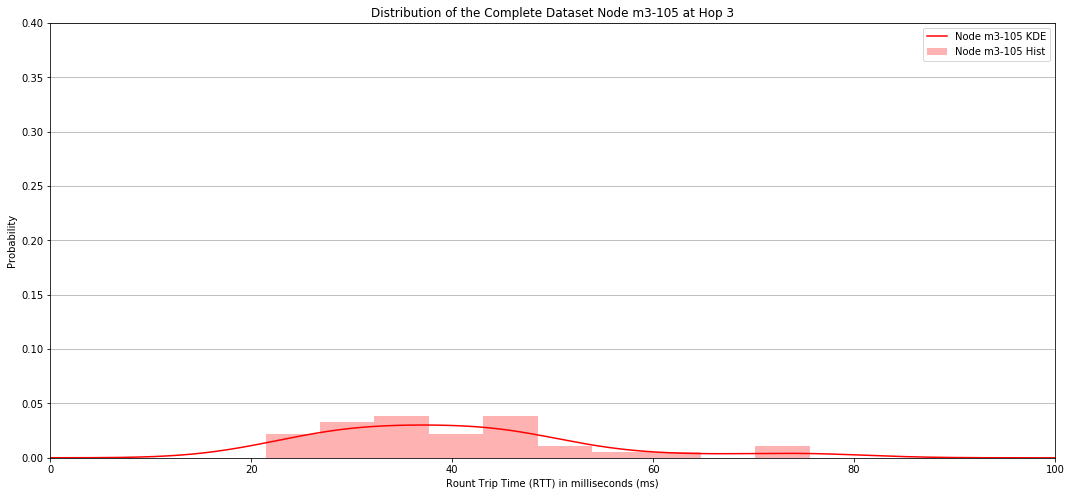

In [19]:
for hop in sorted(hops2.keys()):
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops2[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes2[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes2[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Examine original data

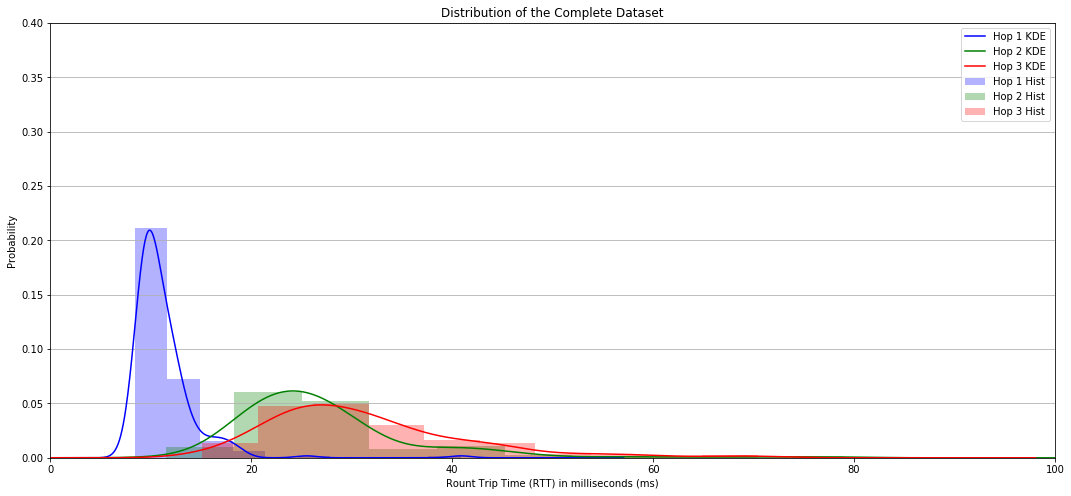

In [20]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    hop_nodes2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

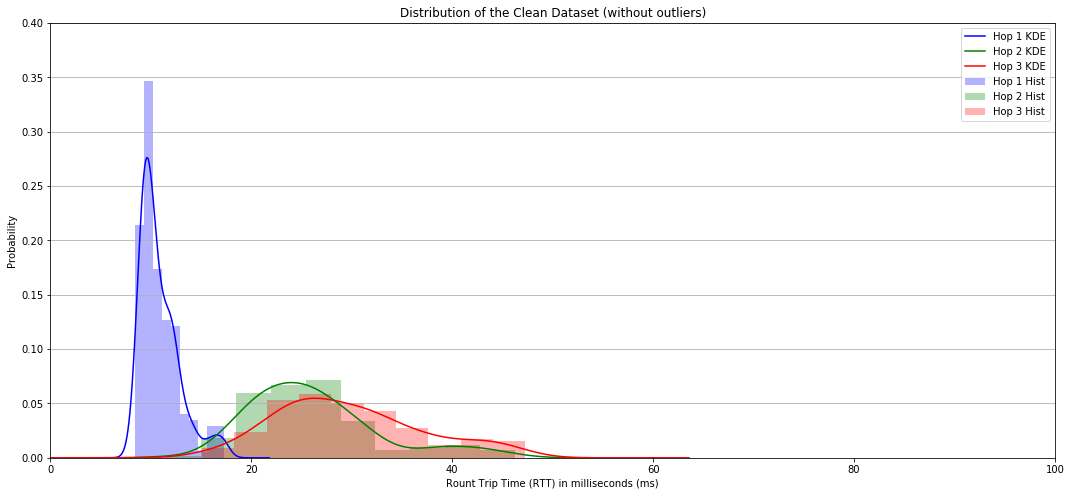

In [21]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values2.keys():
    hop_std_values2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Considering the outliers

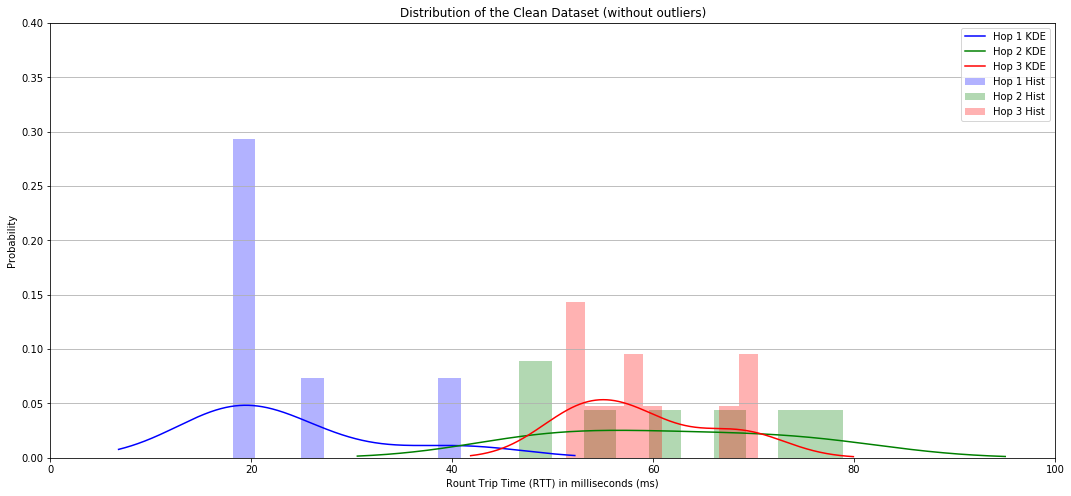

In [22]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers2.keys():
    hop_outliers2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


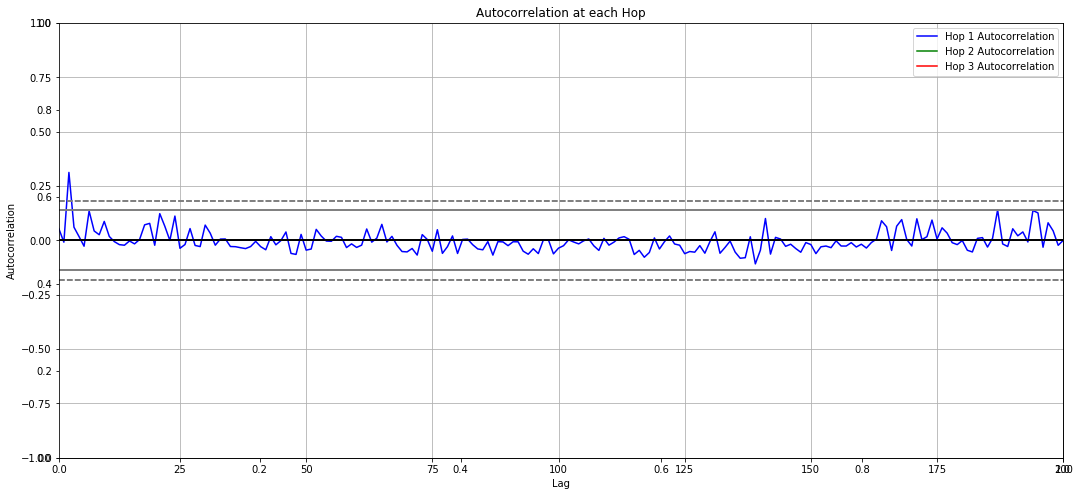

In [23]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    autocorrelation_plot(hop_nodes2[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

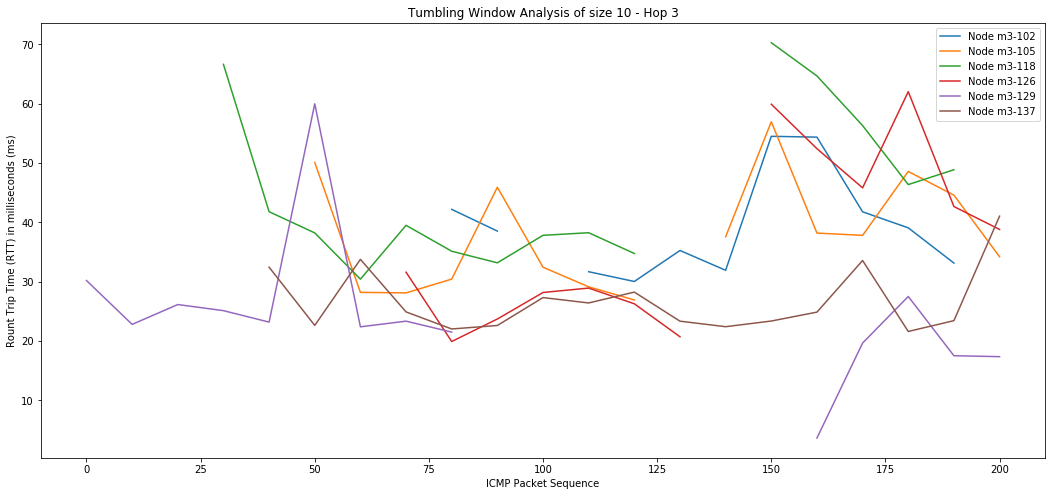

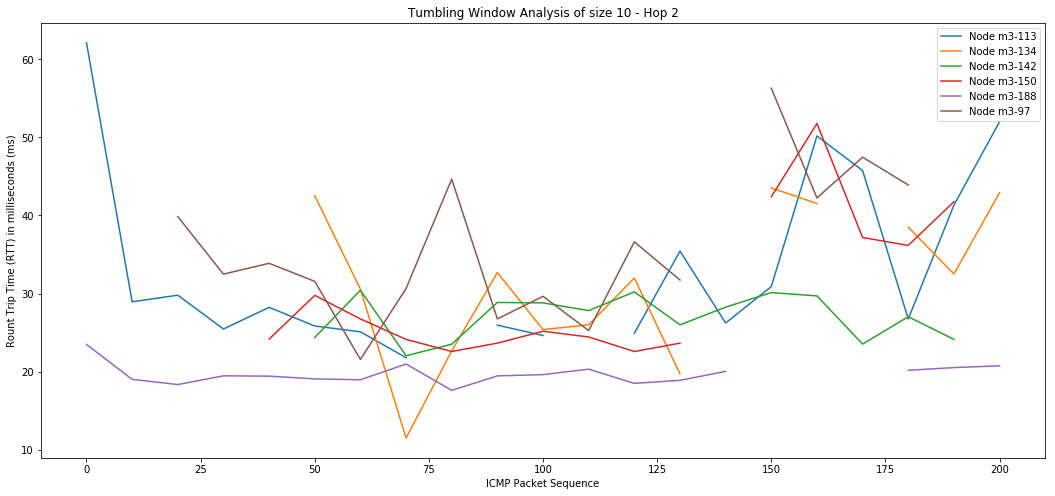

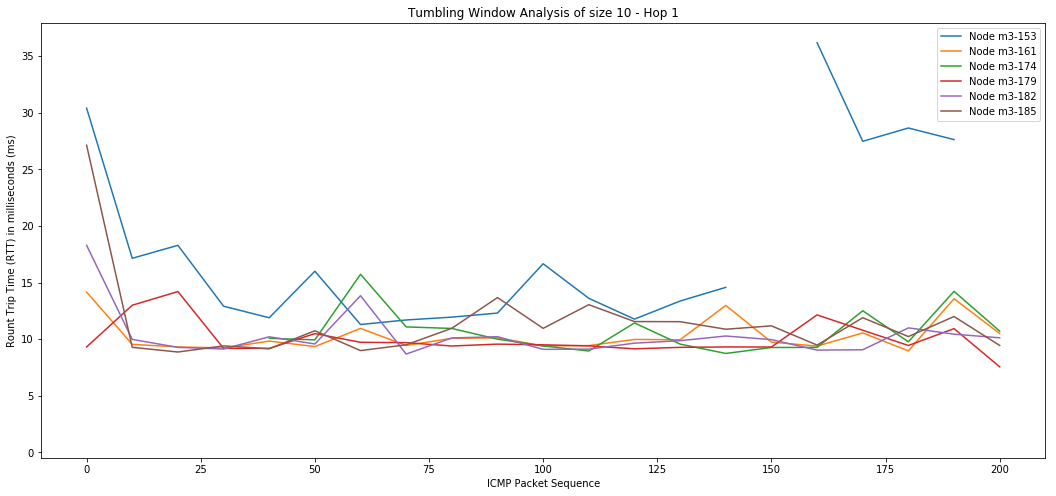

In [24]:
window_size = 10
for h in hops2.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes2:
        if node in hops2[h]:
            plt.plot(nodes2[node].groupby(nodes2[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by Hop tumbling window

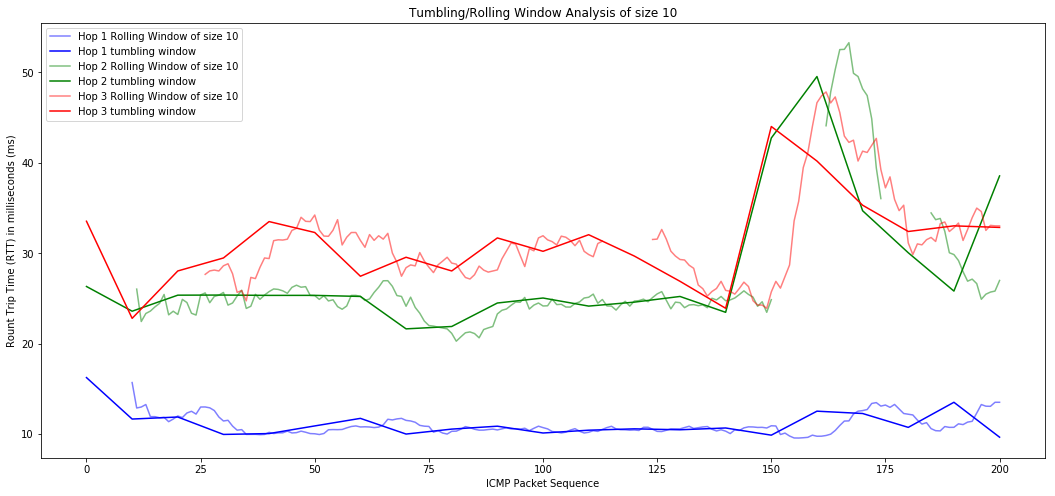

In [25]:
window_size = 10
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes2.keys():
    plt.plot(hop_nodes2[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes2[hop].groupby(hop_nodes2[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

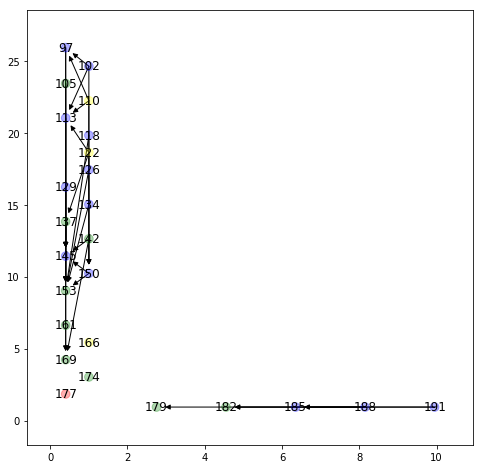

In [26]:
G1b = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
plt.show()

## Additional 2 node disconnections
Parse the 3rd trace file with 200 packets over a network with 2 additional nodes are disconnected. Now a total of 3 nodes are offline (node 153,169,182).

In [27]:
nodes3, hops3 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')
std_values3, outliers3 = trace_analysis.separate_outliers_node_by_node(nodes3)

hop_nodes3 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')
hop_std_values3, hop_outliers3 = trace_analysis.separate_outliers(hop_nodes3)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

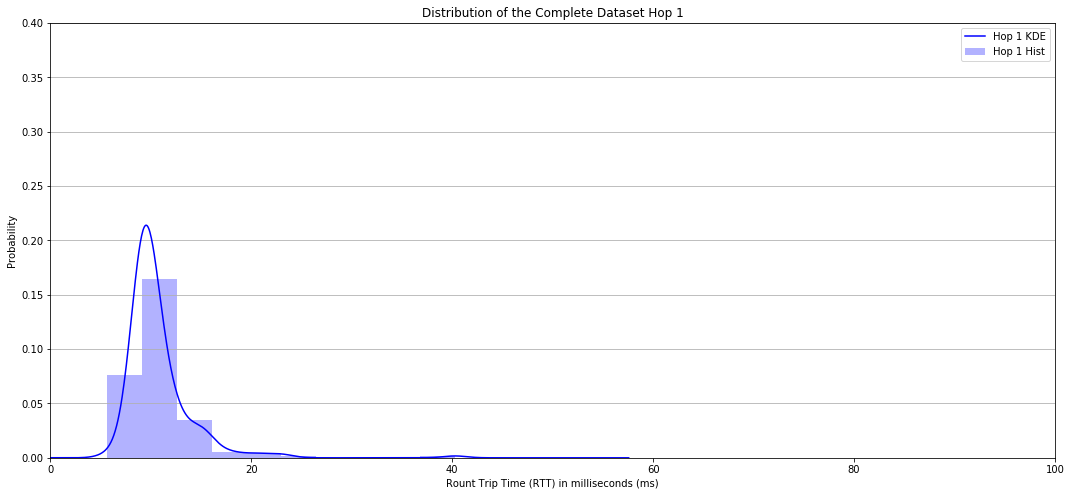

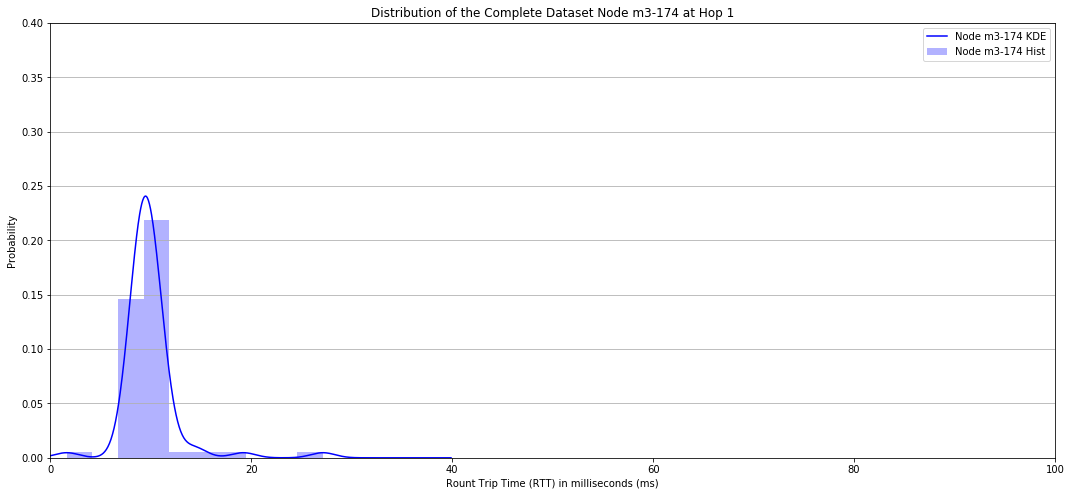

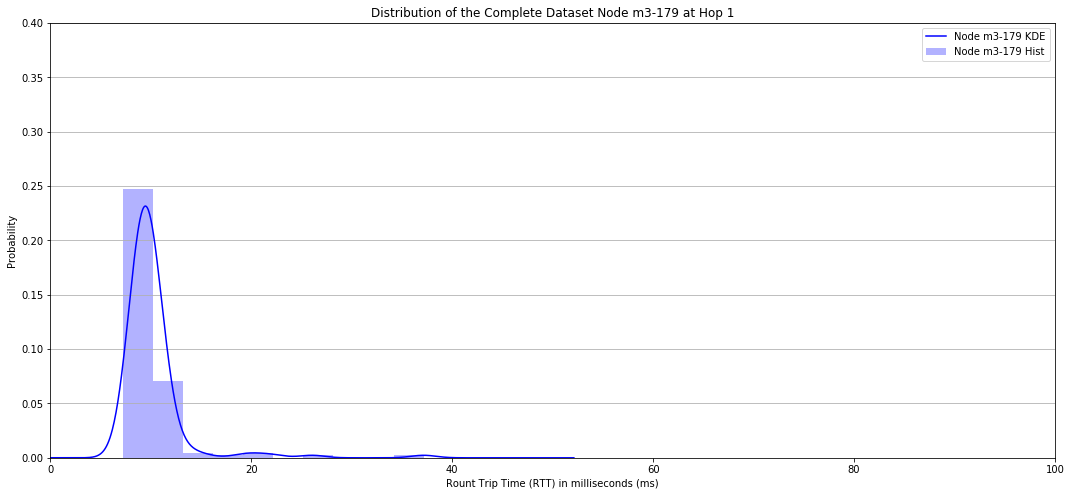

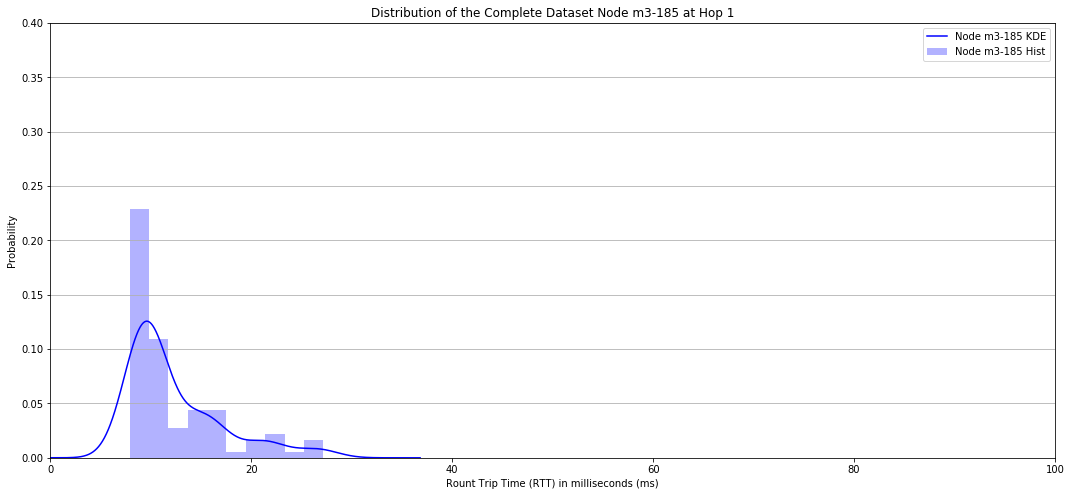

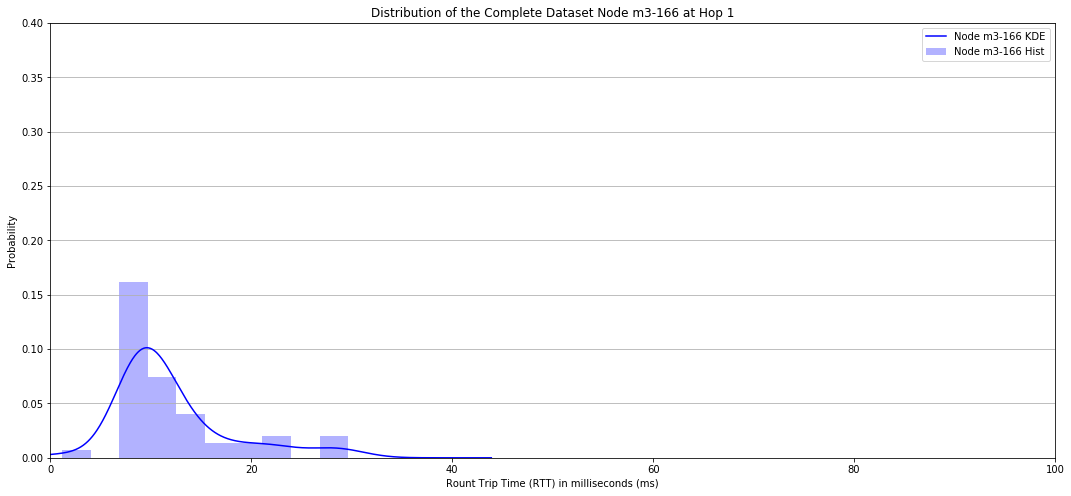

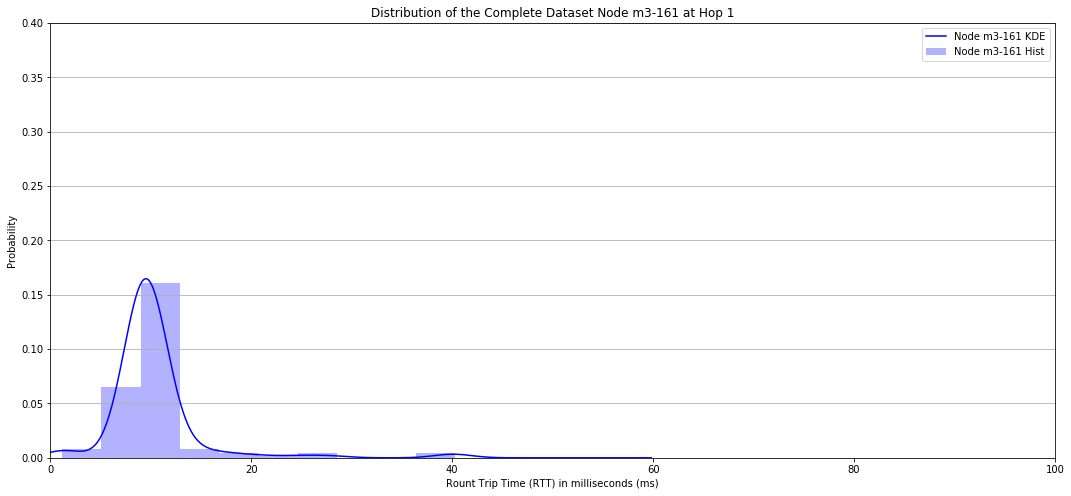

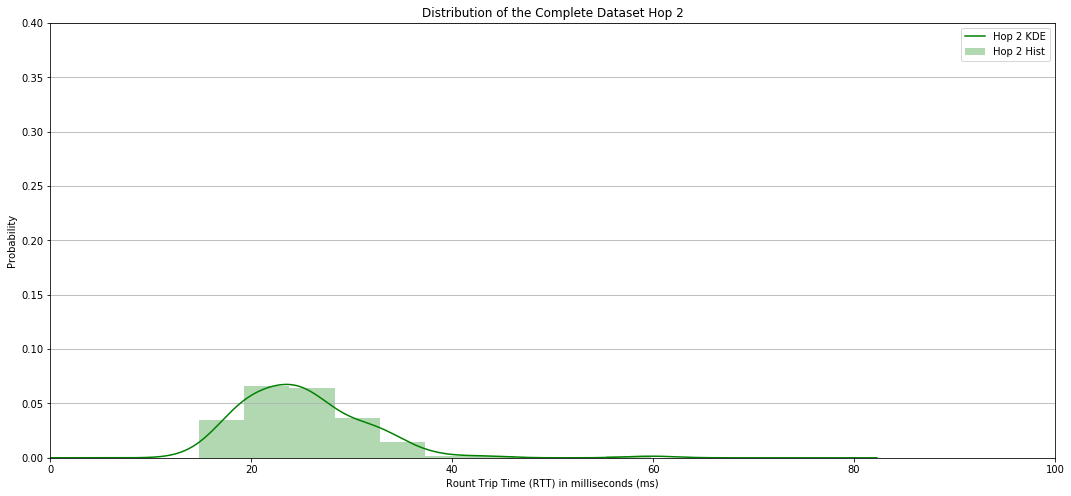

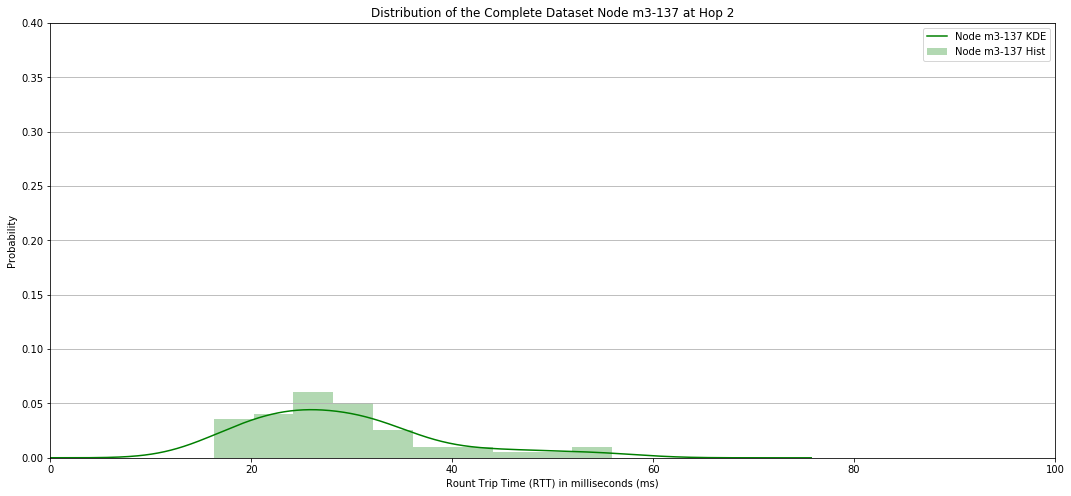

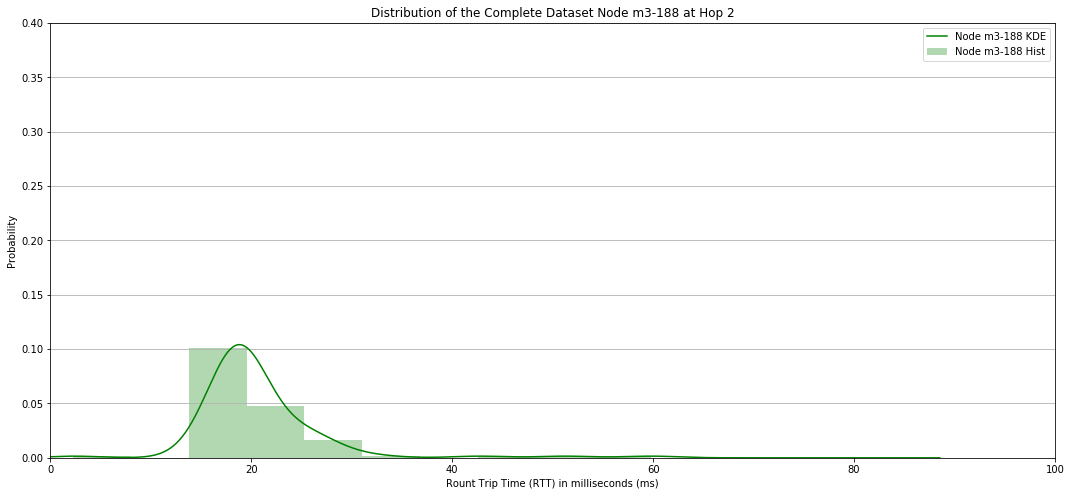

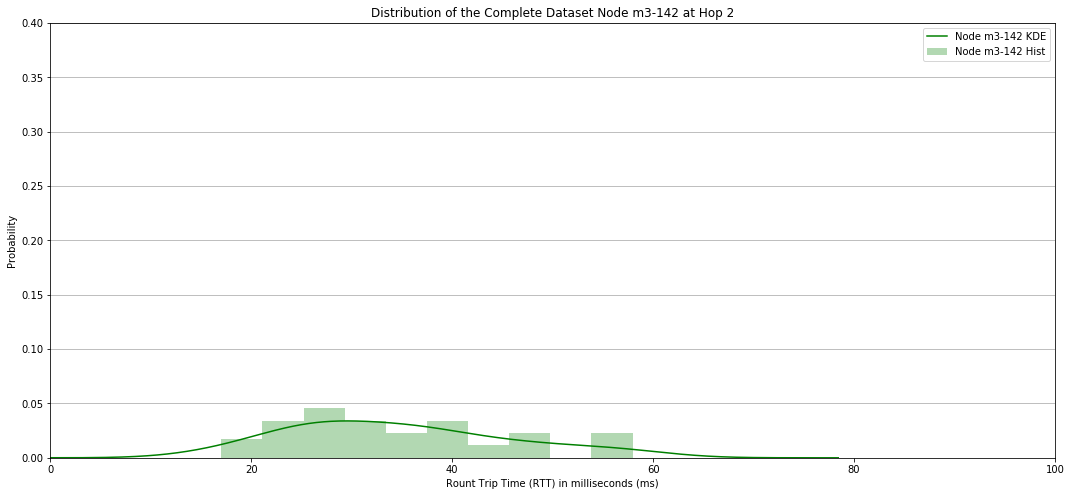

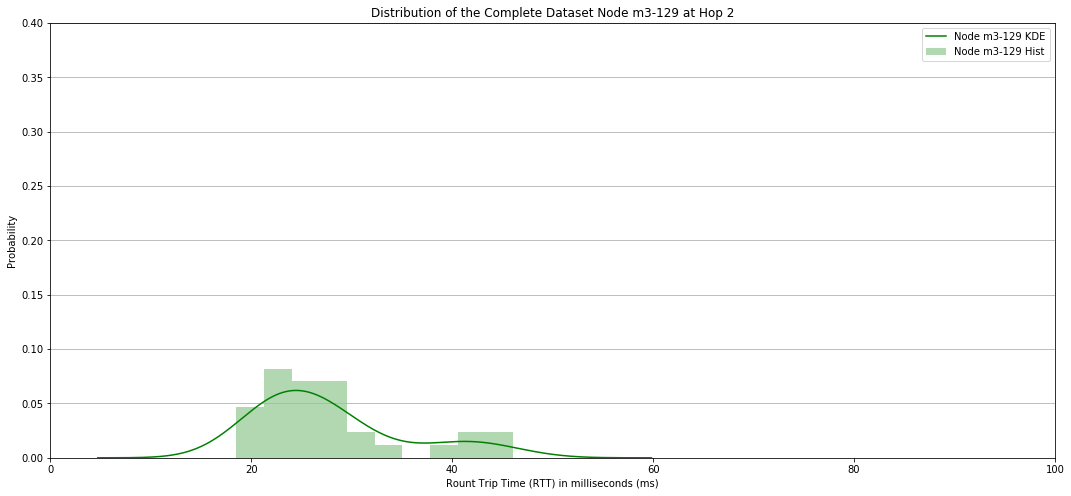

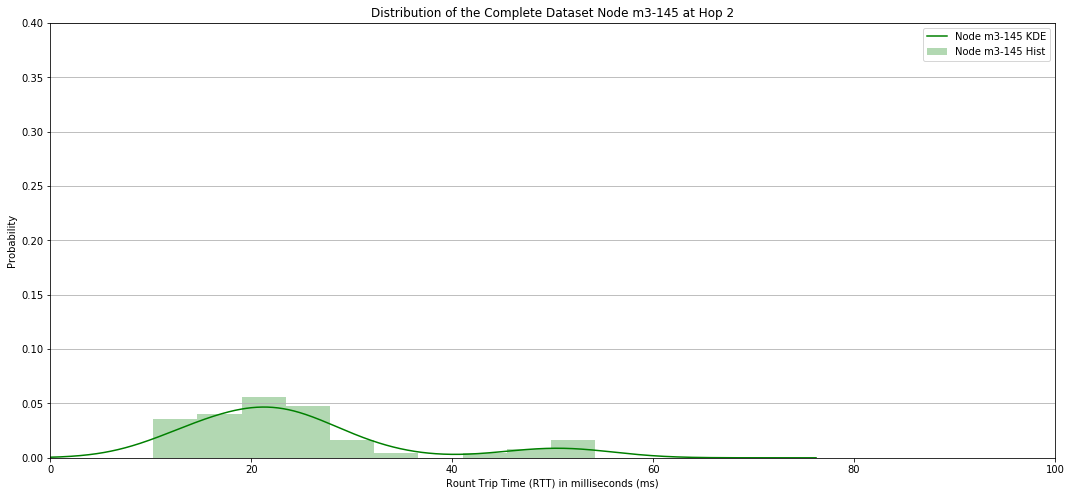

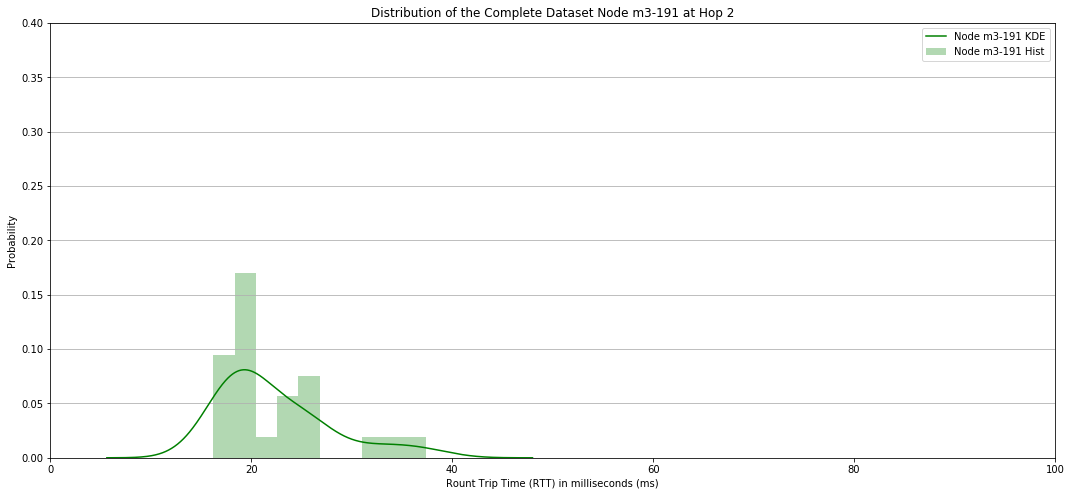

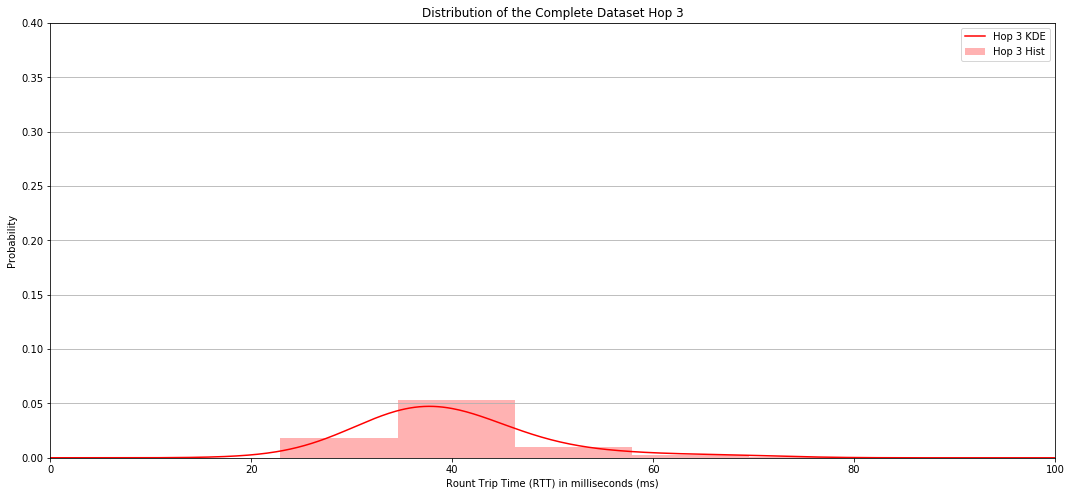

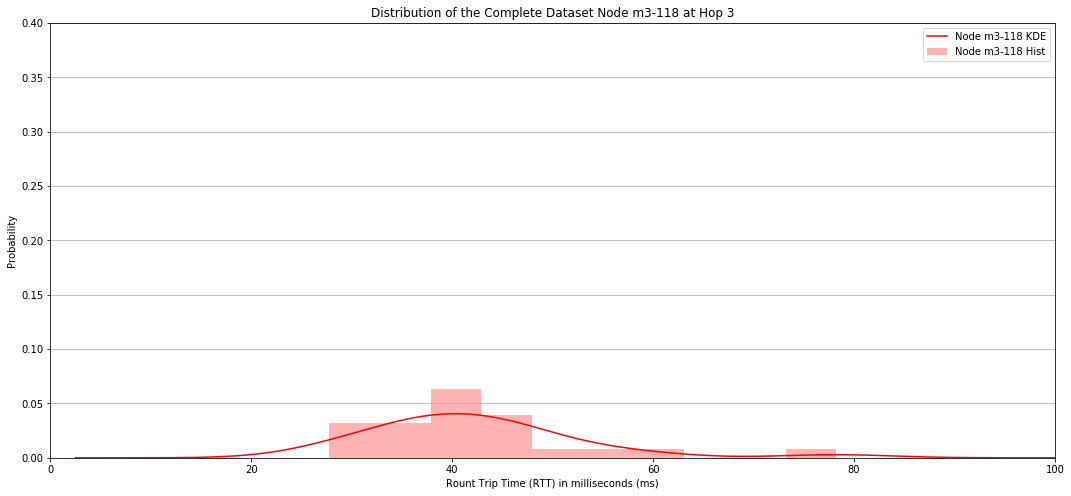

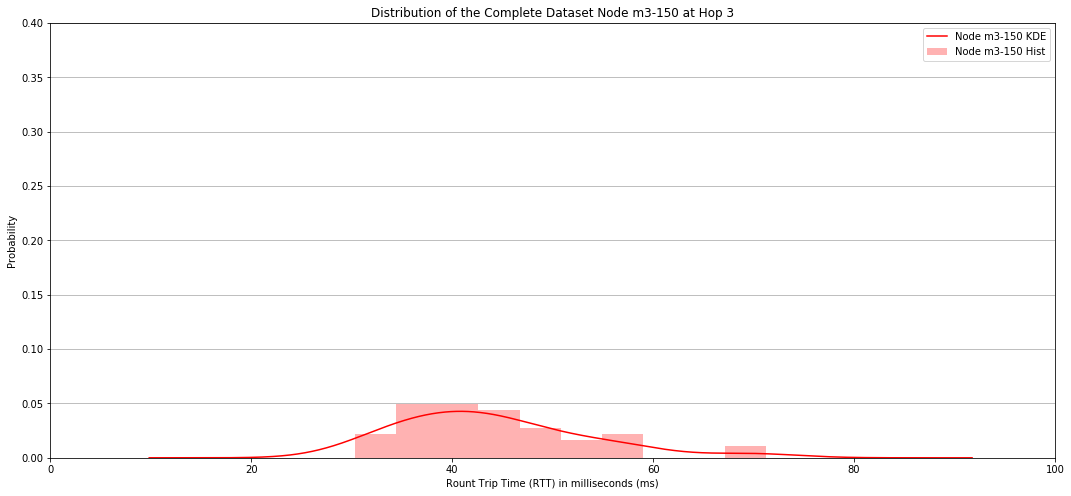

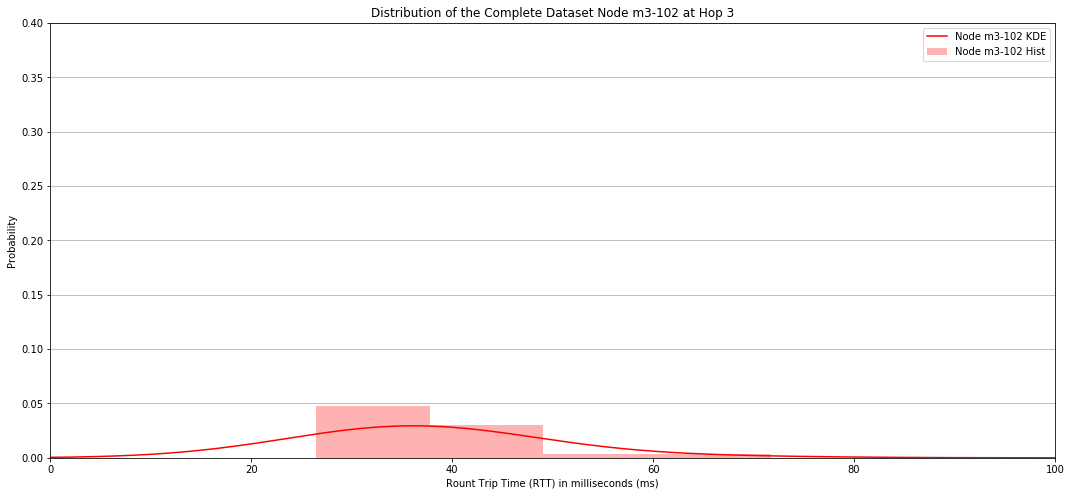

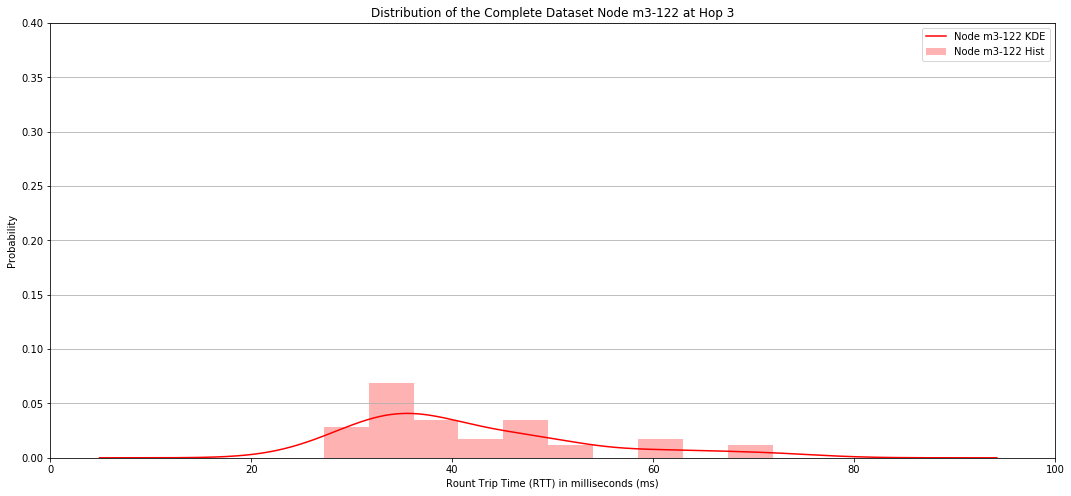

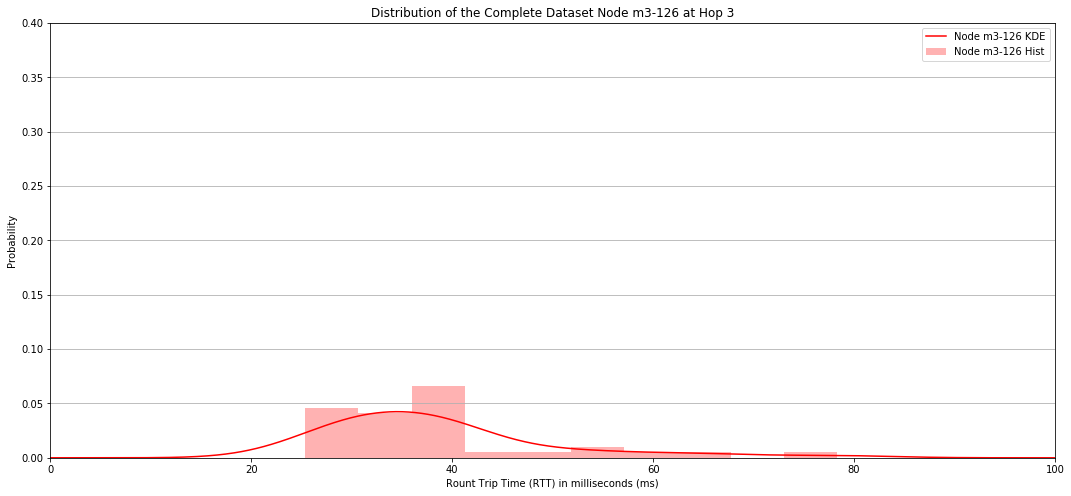

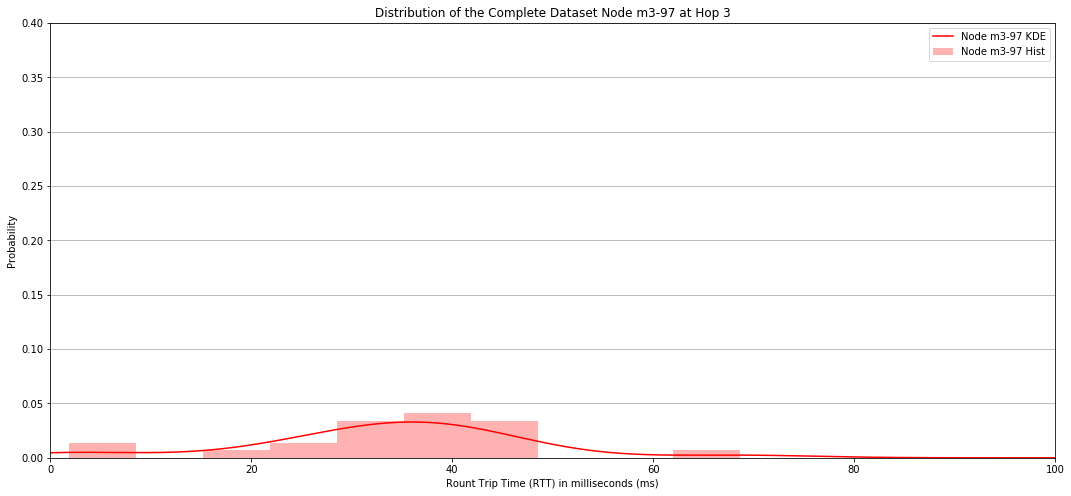

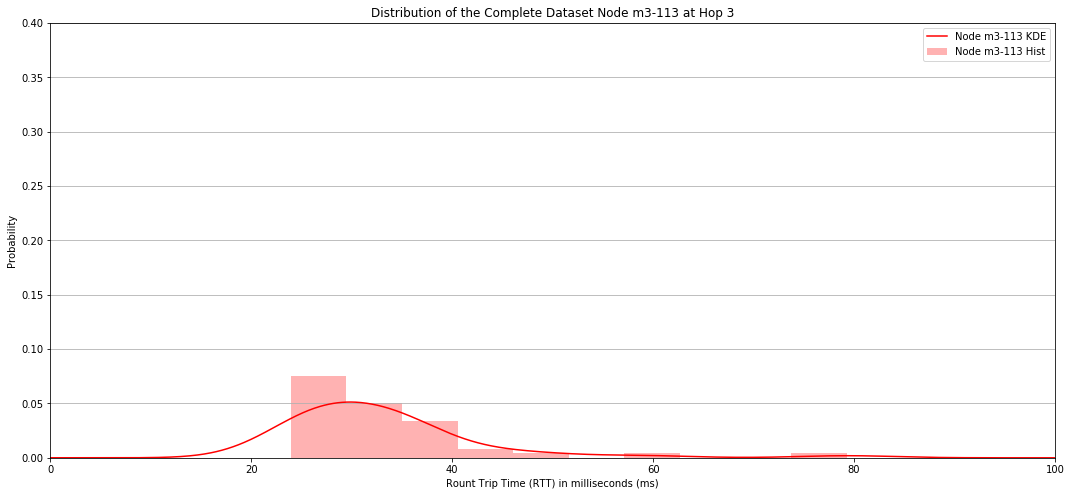

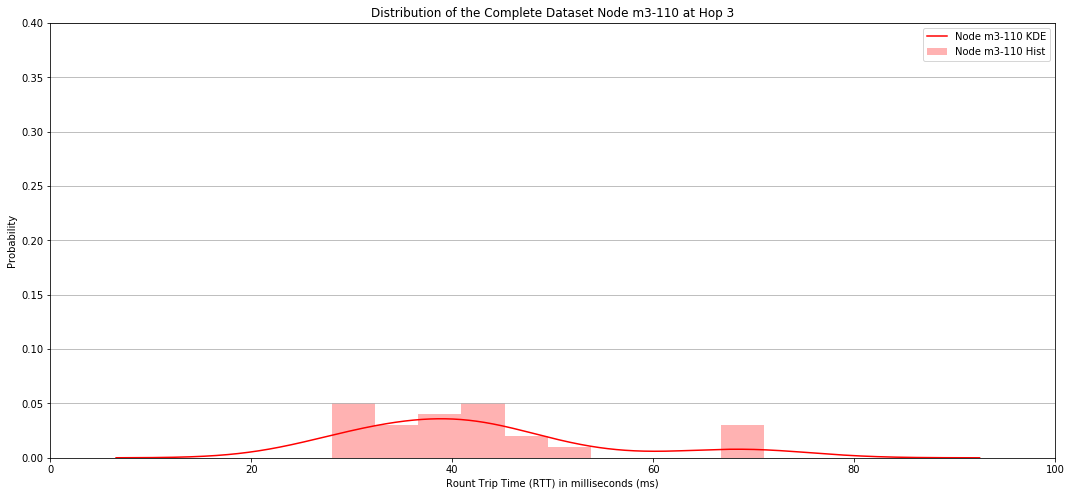

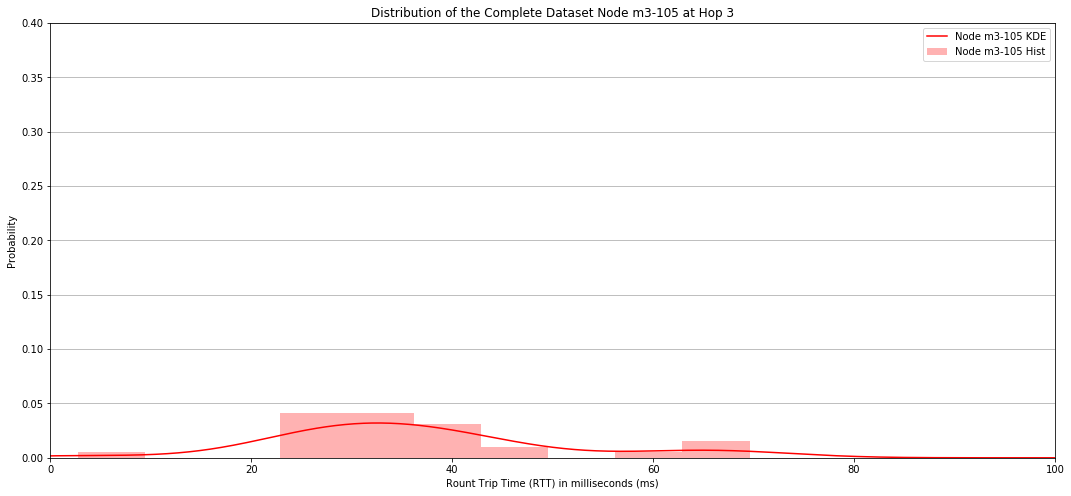

In [28]:
for hop in sorted(hops3.keys()):
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops3[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes3[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes3[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Complete dataset

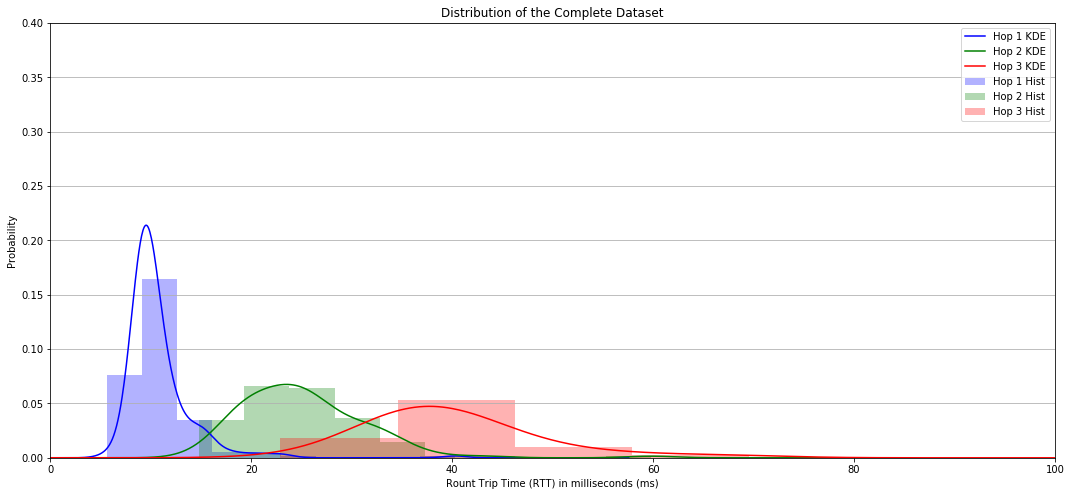

In [29]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    hop_nodes3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

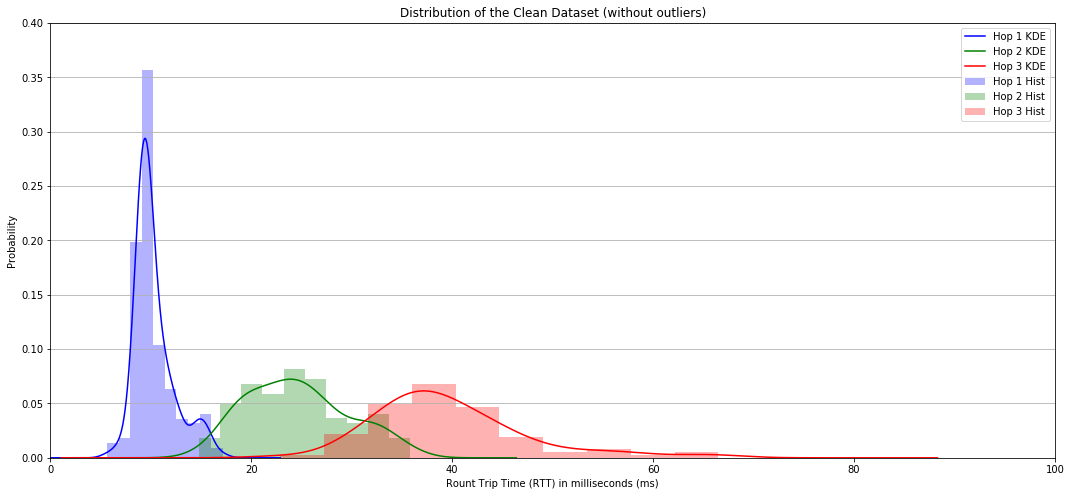

In [30]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values3.keys():
    hop_std_values3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

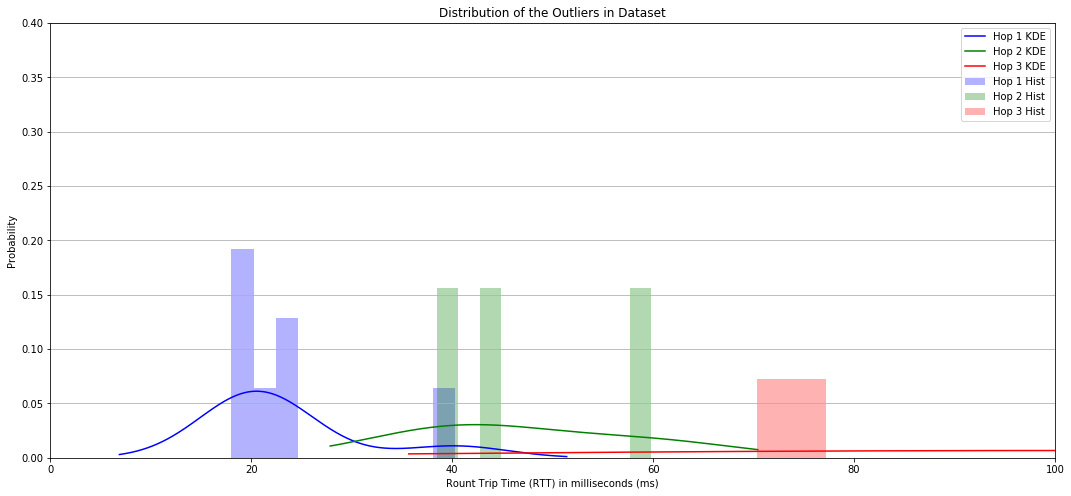

In [31]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers3.keys():
    hop_outliers3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a visualization of a tumbling window

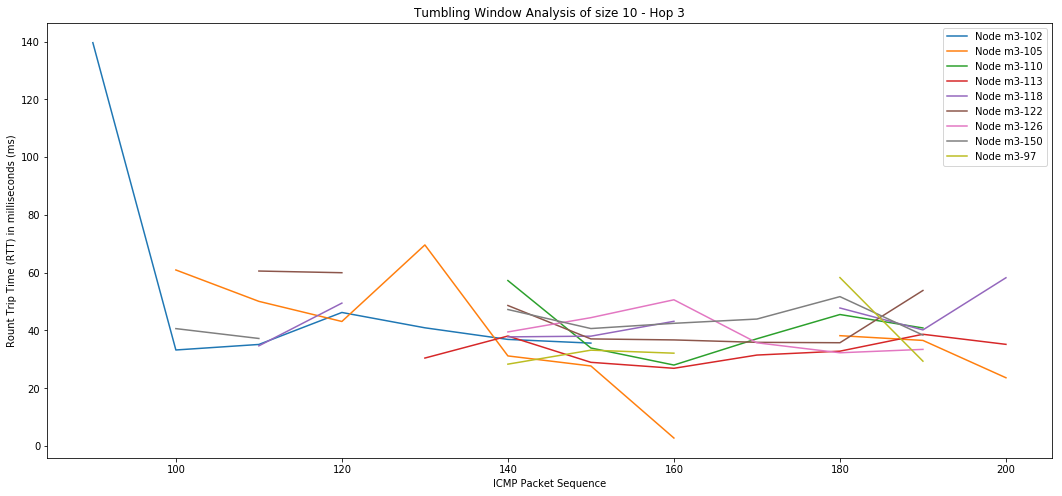

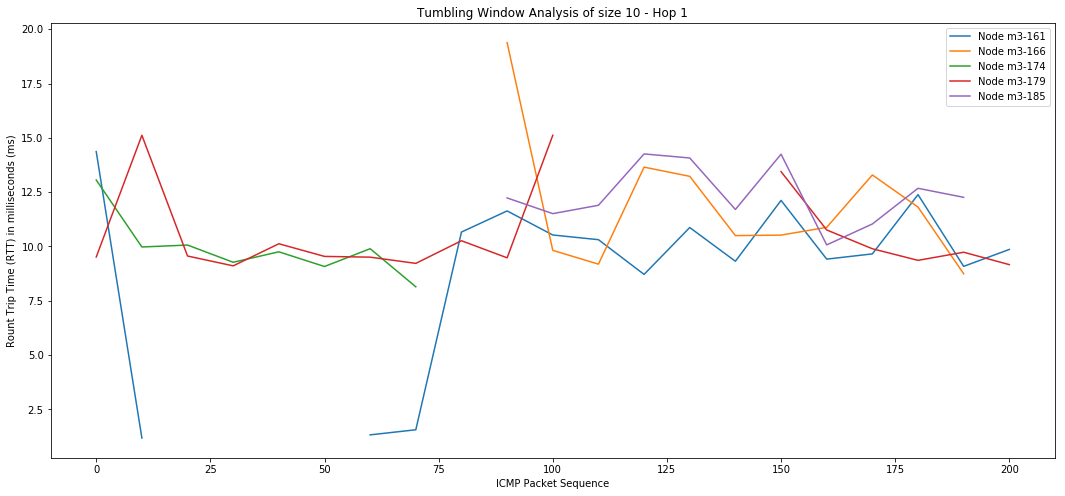

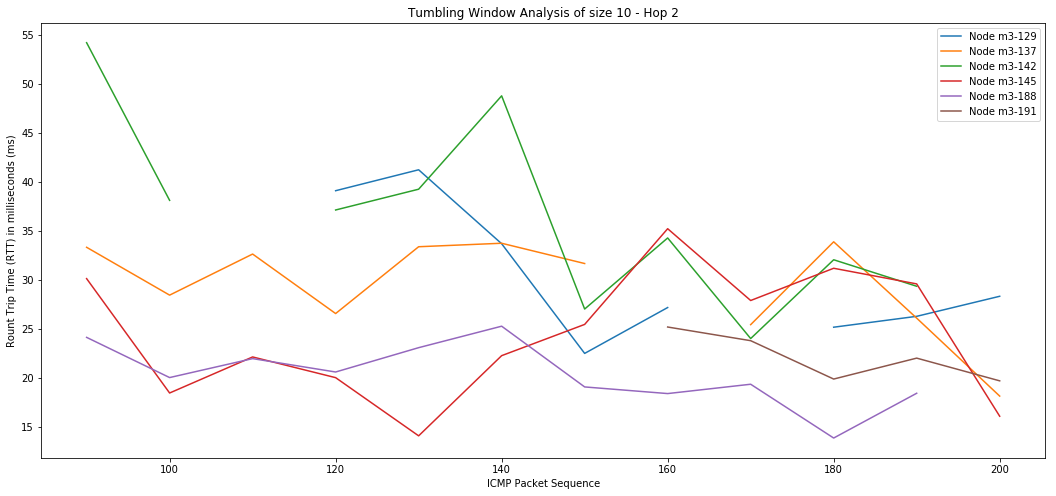

In [32]:
window_size = 10
for h in hops3.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes3:
        if node in hops3[h]:
            plt.plot(nodes3[node].groupby(nodes3[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by Hop tumbling window

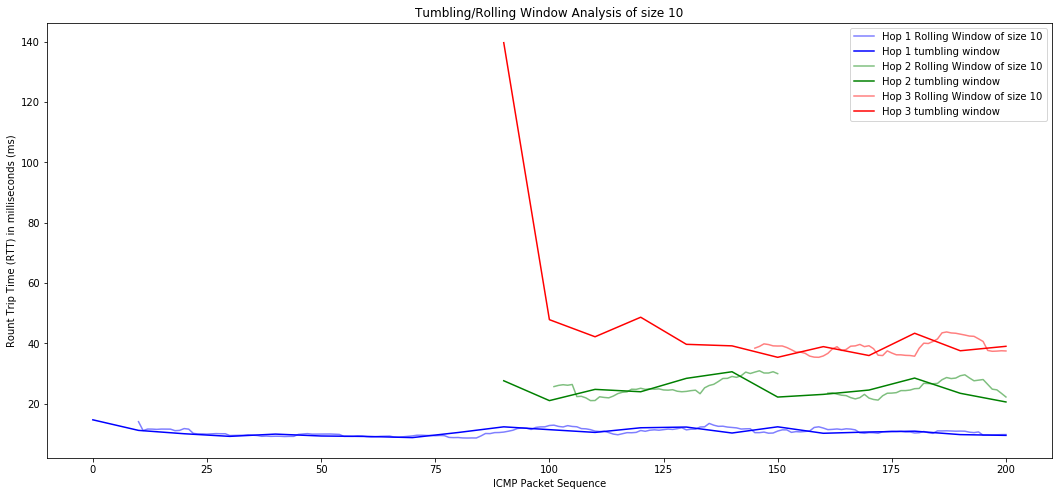

In [33]:
window_size = 10
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes3.keys():
    plt.plot(hop_nodes3[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes3[hop].groupby(hop_nodes3[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


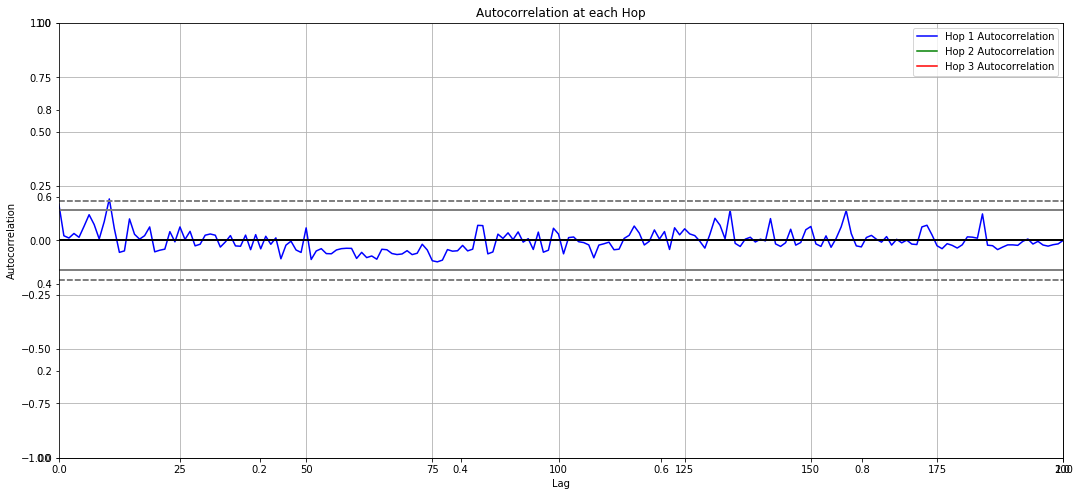

In [34]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    autocorrelation_plot(hop_nodes3[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


### Statistics

For each hop

In [35]:
hop_nodes3.describe()

1           2           3
count  200.000000  108.000000   86.000000
mean    10.749532   25.233201   41.167230
std      3.367859    6.365514   13.525809
min      5.664000   14.783500   22.883000
25%      9.098250   20.586438   35.162375
50%      9.786500   24.292875   38.235400
75%     11.350750   28.428337   43.196750
max     40.268000   59.784000  139.626000

In [36]:
nodes3.describe()

m3-102     m3-105     m3-110     m3-113     m3-118     m3-122  \
count   26.000000  29.000000  23.000000  43.000000  25.000000  39.000000   
mean    41.368577  36.595655  42.475130  33.146558  42.376160  41.668385   
std     21.560094  14.430688  12.251661  10.223881  10.657769  11.244155   
min     26.451000   2.763000  28.028000  23.918000  27.758000  27.220000   
25%     32.459750  28.087000  34.209000  26.627000  36.906000  34.255000   
50%     37.085000  35.066000  40.420000  30.914000  40.747000  37.174000   
75%     41.023500  42.078000  44.926500  35.380500  47.261000  47.953000   
max    139.626000  69.612000  71.014000  79.305000  78.258000  71.893000   

          m3-126     m3-129     m3-137     m3-142     m3-145     m3-150  \
count  37.000000  31.000000  50.000000  43.000000  57.000000  44.000000   
mean   38.587162  27.787387  29.064440  34.616163  24.564386  44.095159   
std    11.541041   7.400450   9.342345  10.836507  11.008413   9.384019   
min    25.361000  18.493000  16.252000  17.013000  10.226000  30.315000   
25%    31.004000  22.736000  22.232250  26.823500  18.035000  36.926250   
50%    36.389000  25.447000  27.108500  32.831000  22.461000  42.549000   
75%    40.689000  29.738000  33.036750  40.194000  26.783000  48.657000   
max    78.341000  46.056000  55.913000  57.962000  54.224000  71.278000   

           m3-161     m3-166     m3-174      m3-179     m3-185     m3-188  \
count  129.000000  52.000000  70.000000  138.000000  95.000000  98.000000   
mean    10.346240  12.078500   9.924600   10.175072  12.345611  20.825337   
std      4.926563   5.730544   2.838349    3.356238   4.729036   6.696780   
min      1.169000   1.141000   1.620000    7.234000   7.875000   2.271000   
25%      8.809000   8.822500   8.799000    8.811000   9.171500  17.883500   
50%      9.544000   9.781500   9.436000    9.488000  10.427000  19.089000   
75%     10.407000  12.994250  10.393000   10.417500  15.002500  21.227500   
max     40.268000  29.642000  27.128000   37.153000  27.162000  59.784000   

          m3-191      m3-97  
count  25.000000  22.000000  
mean   22.324600  33.654545  
std     5.522881  14.072106  
min    16.209000   1.822000  
25%    18.763000  29.211250  
50%    20.051000  36.107000  
75%    25.261000  41.396500  
max    37.399000  68.627000

Loss

In [37]:
pd.DataFrame([[h, str((len(hop_nodes3[h]) - hop_nodes3[h].count())/len(hop_nodes3[h])*100) +'%'] 
              for h in hop_nodes3.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 0.0%
1    2                46.0%
2    3                57.0%

In [38]:
pd.DataFrame([[n, h, str((len(nodes3[n]) - nodes3[n].count())/len(nodes3[n])*100) +'%'] 
              for n in nodes3.keys() for h in hops3.keys() if n in hops3[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
16  m3-185    1                52.5%
15  m3-179    1                31.0%
14  m3-174    1                65.0%
13  m3-166    1                74.0%
12  m3-161    1                35.5%
9   m3-142    2                78.5%
17  m3-188    2                51.0%
7   m3-129    2                84.5%
8   m3-137    2                75.0%
18  m3-191    2                87.5%
10  m3-145    2                71.5%
0   m3-102    3                87.0%
6   m3-126    3                81.5%
5   m3-122    3                80.5%
4   m3-118    3                87.5%
3   m3-113    3                78.5%
2   m3-110    3                88.5%
1   m3-105    3                85.5%
11  m3-150    3                78.0%
19   m3-97    3                89.0%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

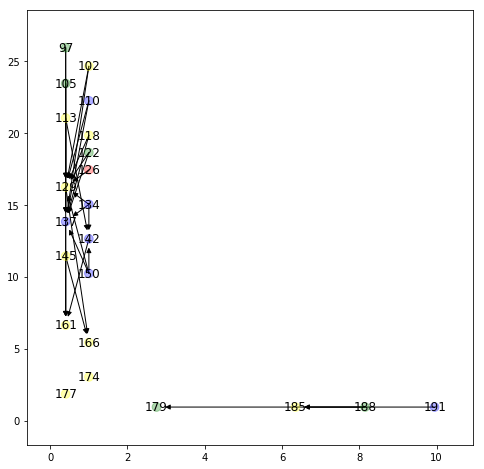

In [39]:
G3 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G3, pos=nx.get_node_attributes(G3,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G3,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G3, pos=nx.get_node_attributes(G3,'loc'), labels=nx.get_node_attributes(G3,'id'))
nx.draw_networkx_edges(G3, pos=nx.get_node_attributes(G3,'loc'))
plt.show()

## Nodes are re-activated
Parse the 4th trace file with 200 packets when 3 nodes (153,169,182) are re-activated.

In [40]:
nodes4, hops4 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-30-2')
std_values4, outliers4 = trace_analysis.separate_outliers_node_by_node(nodes4)

hop_nodes4 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-2')
hop_std_values4, hop_outliers4 = trace_analysis.separate_outliers(hop_nodes4)

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

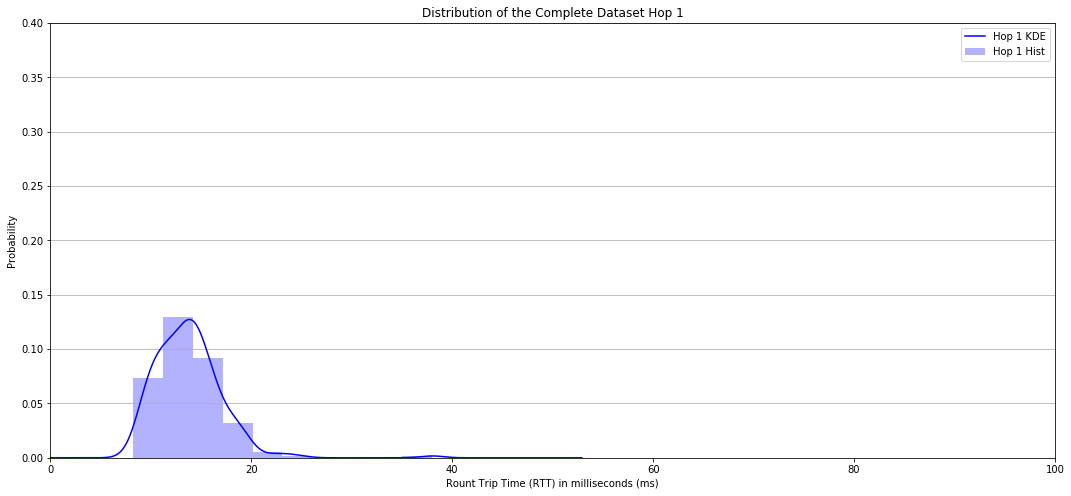

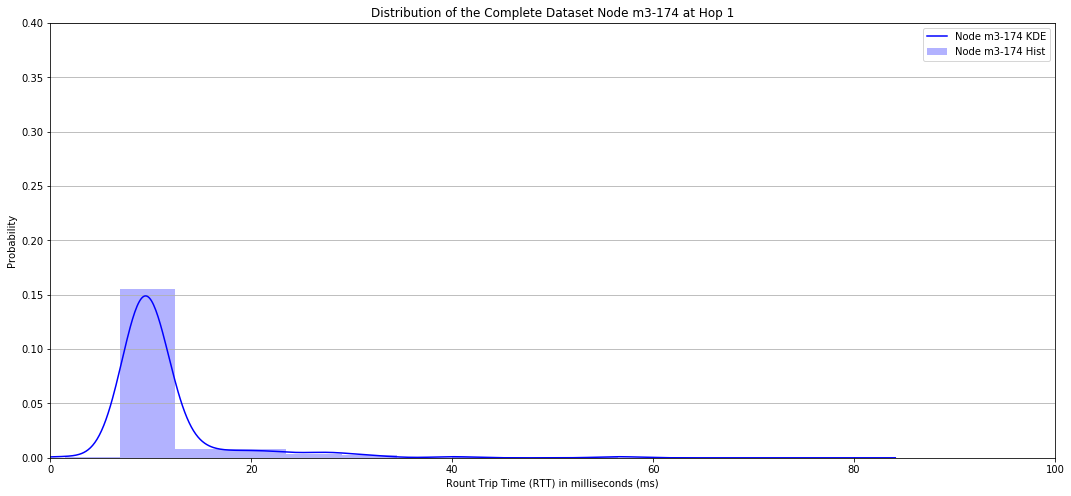

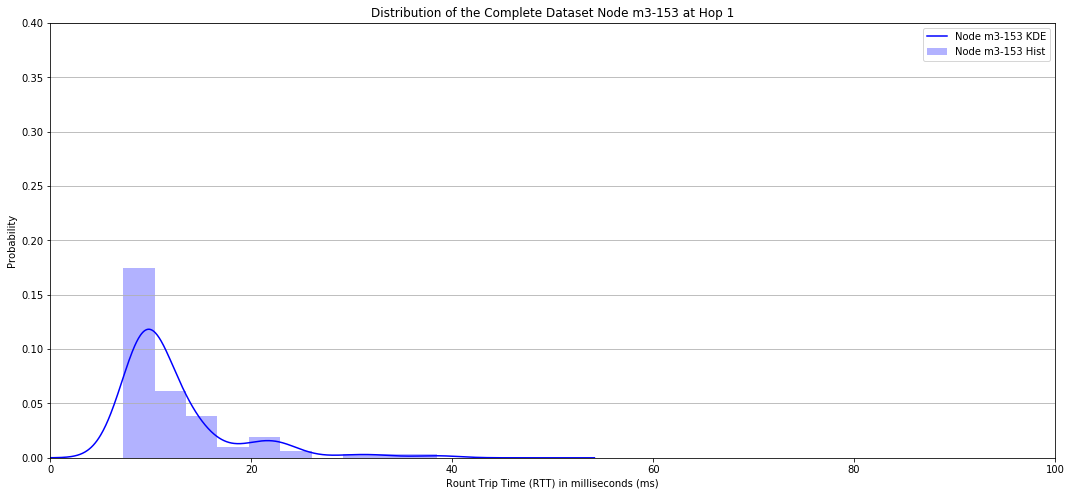

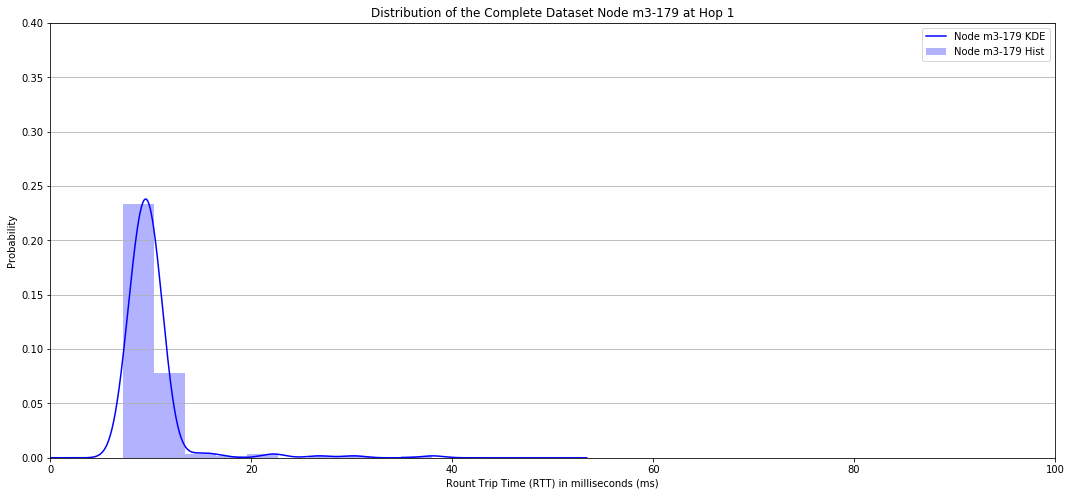

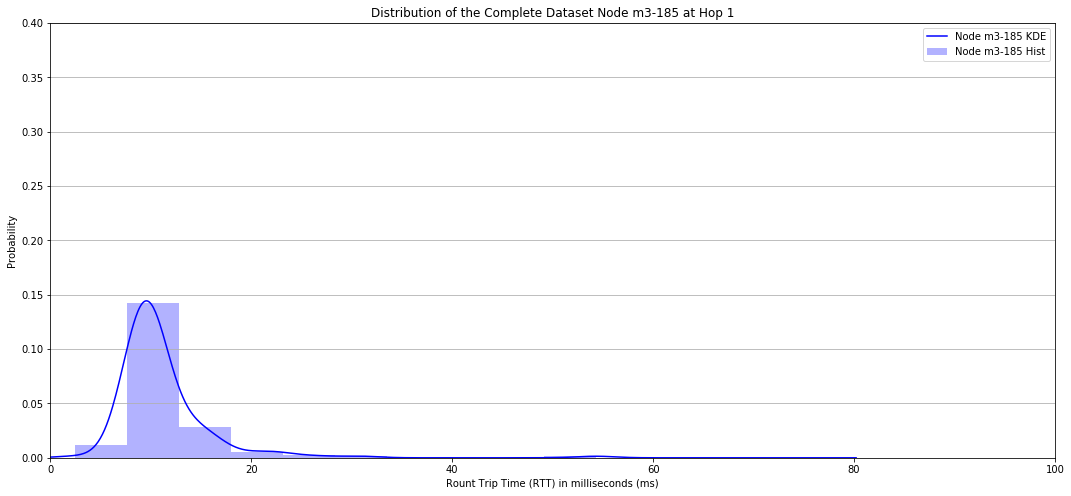

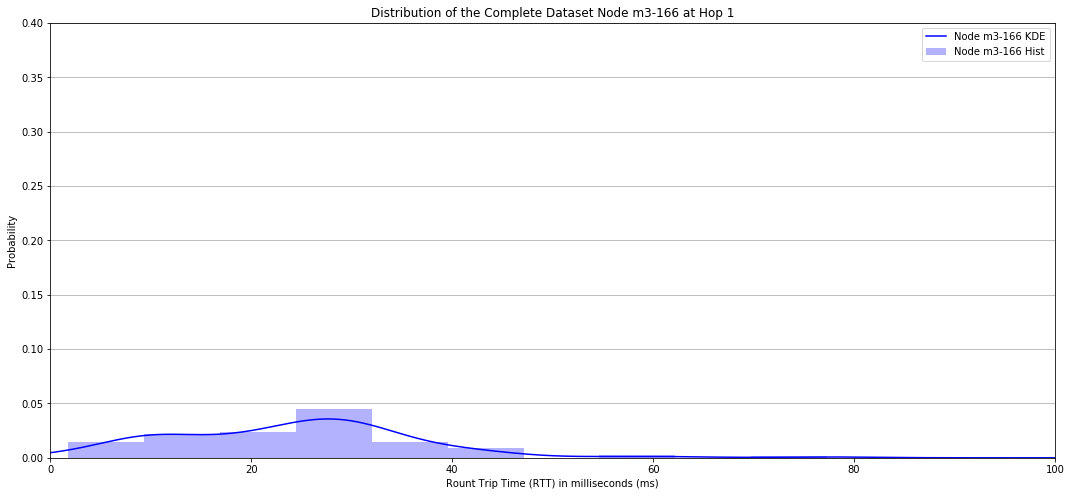

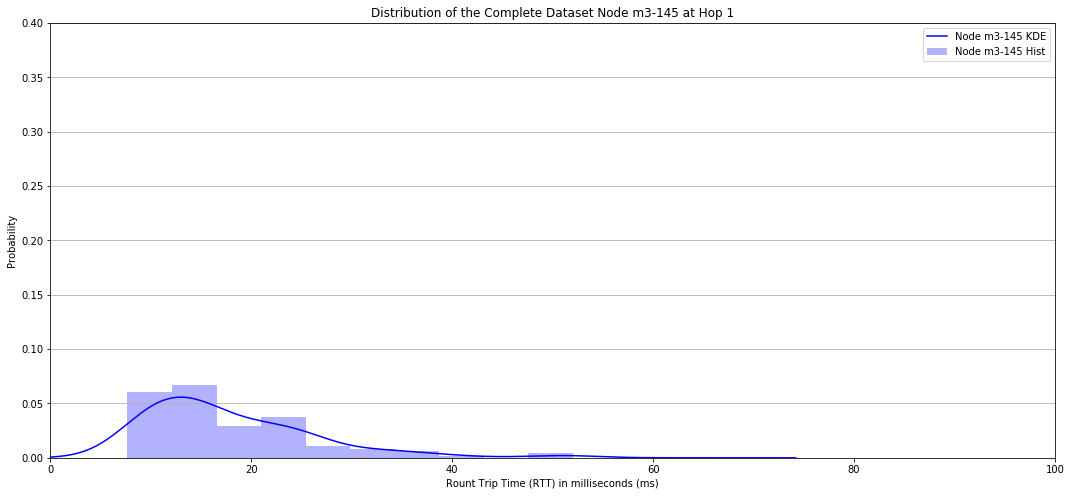

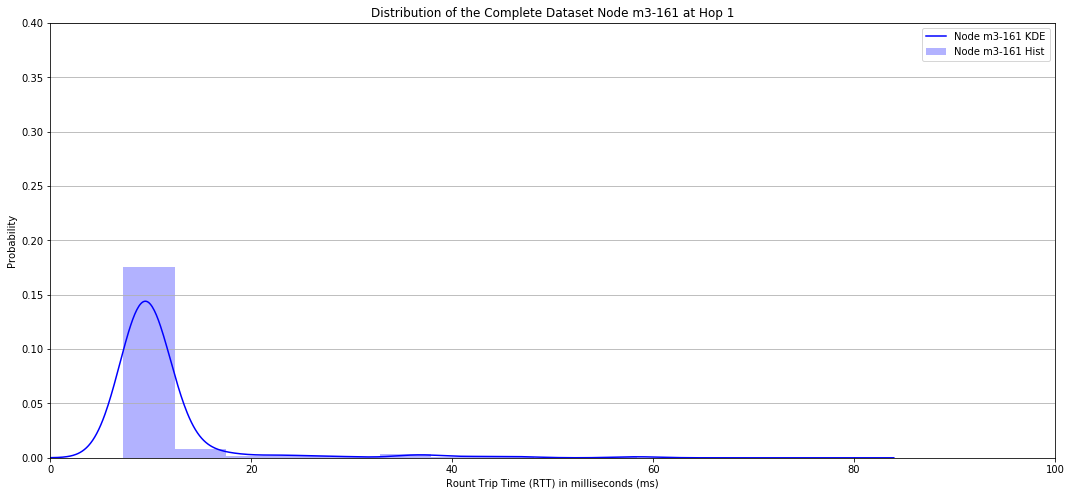

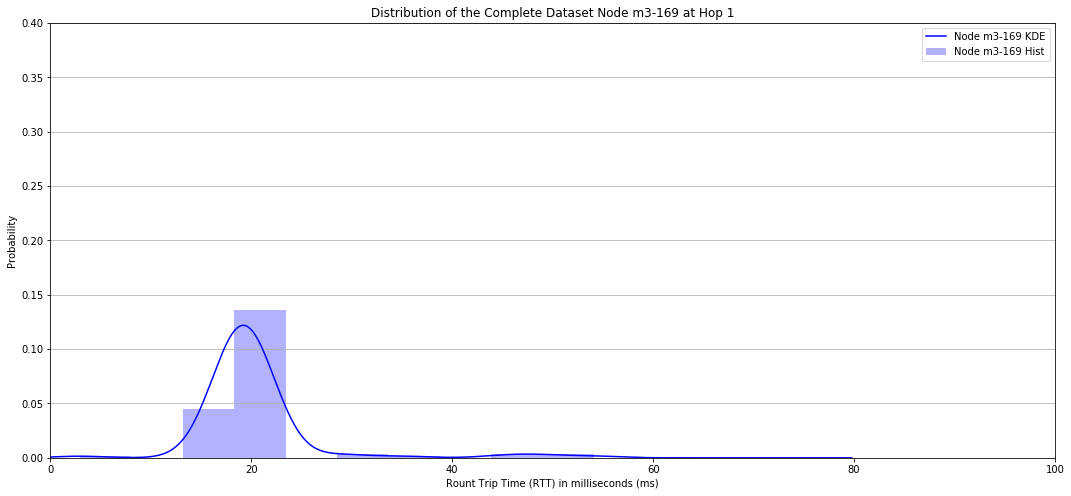

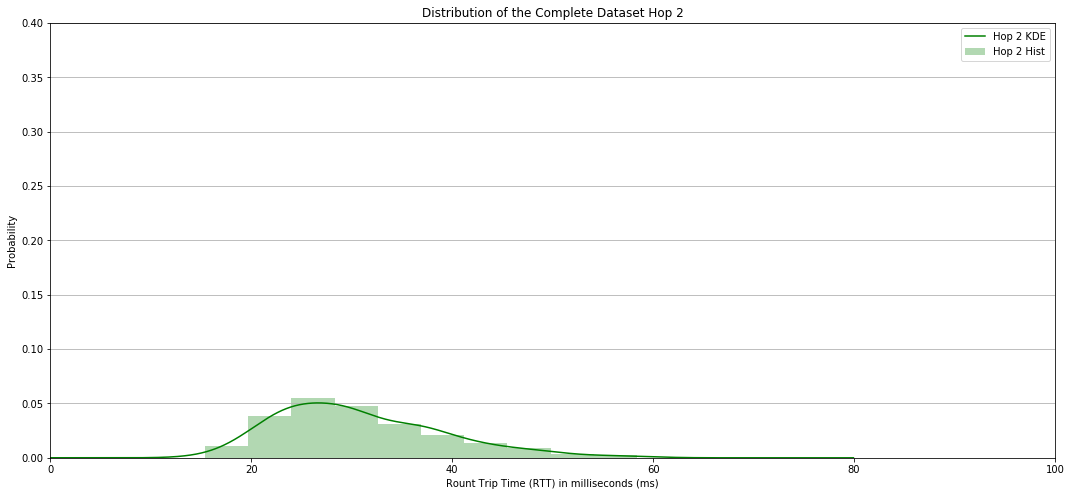

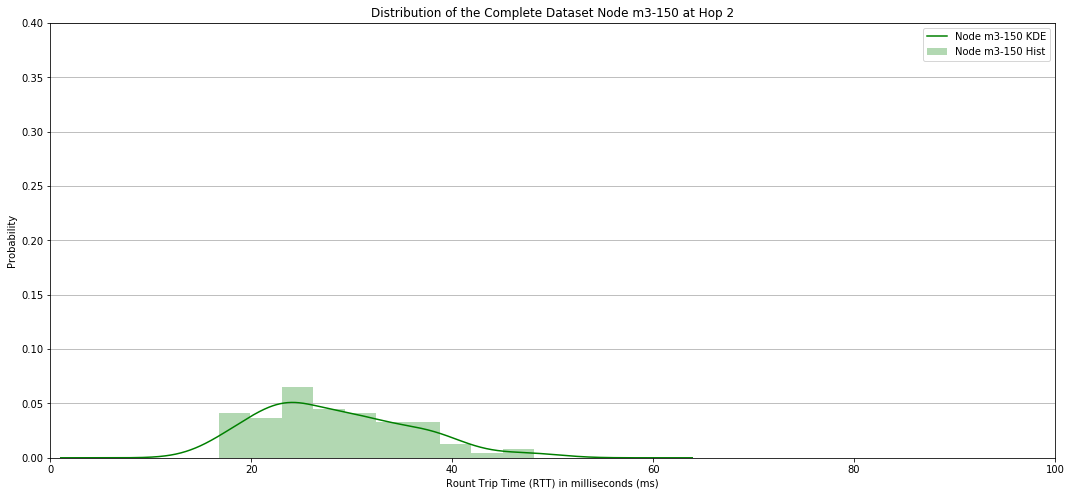

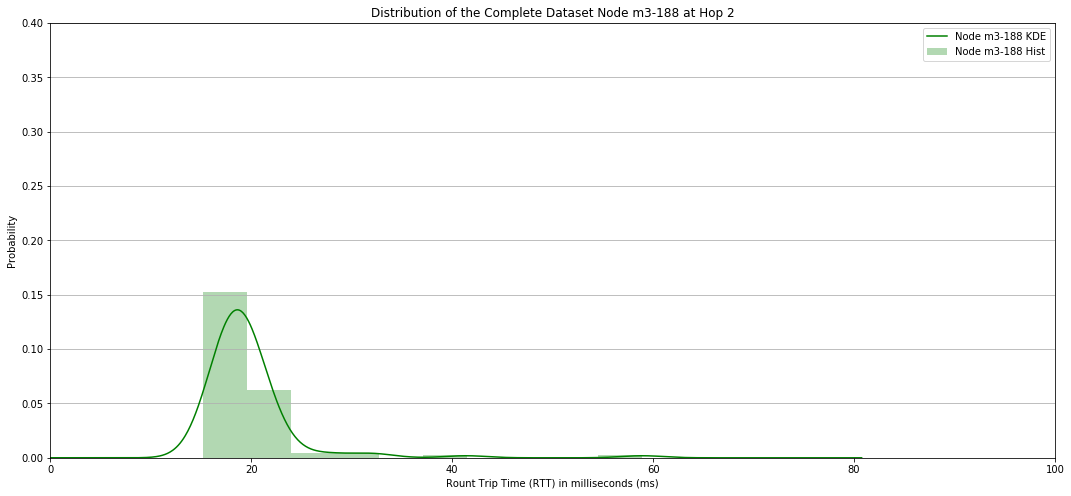

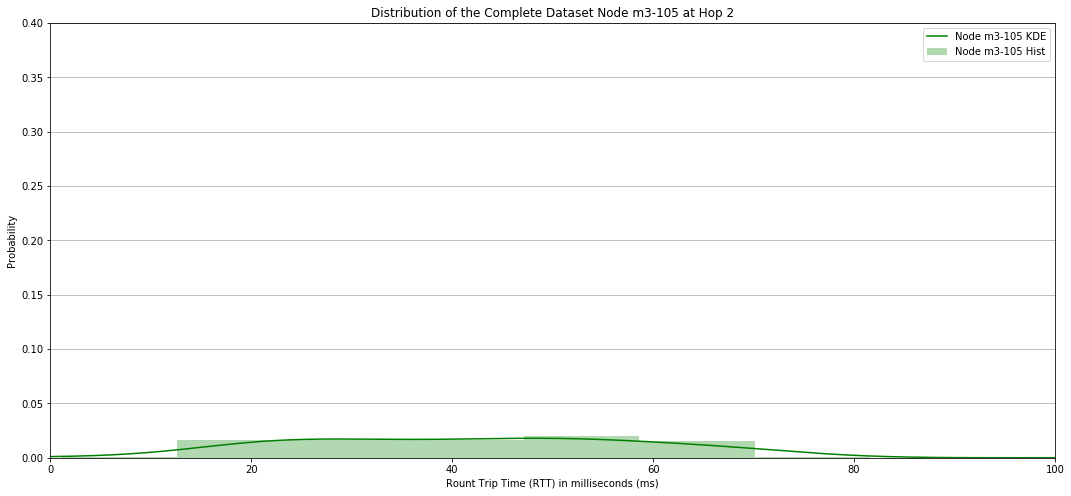

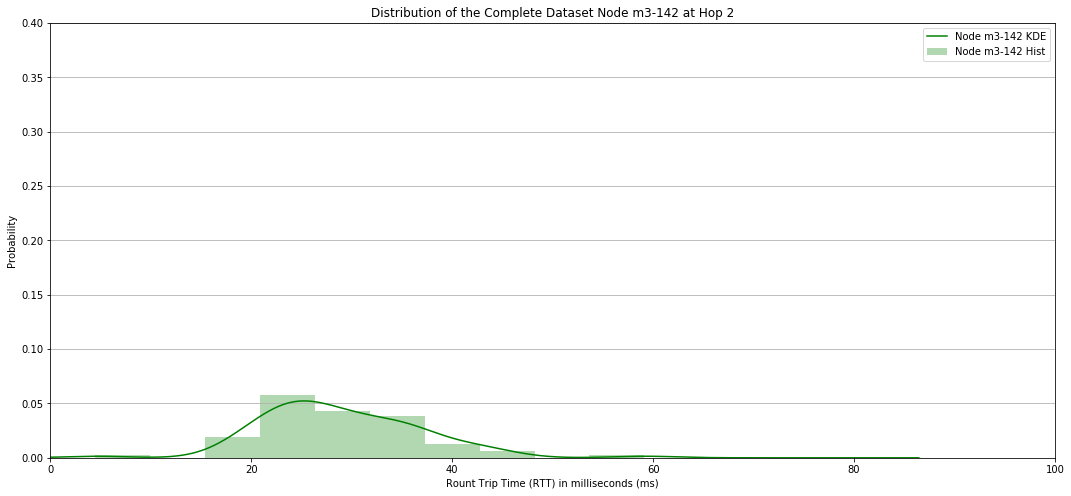

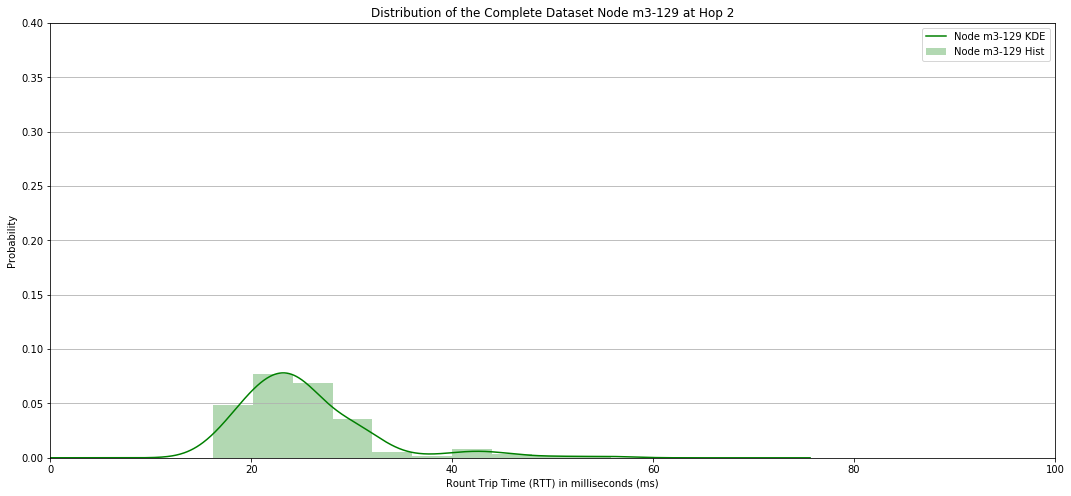

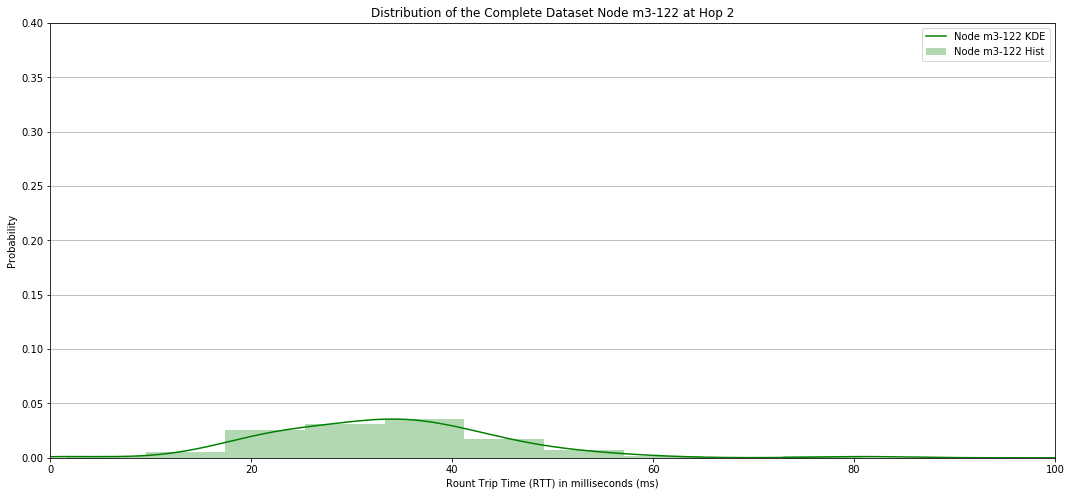

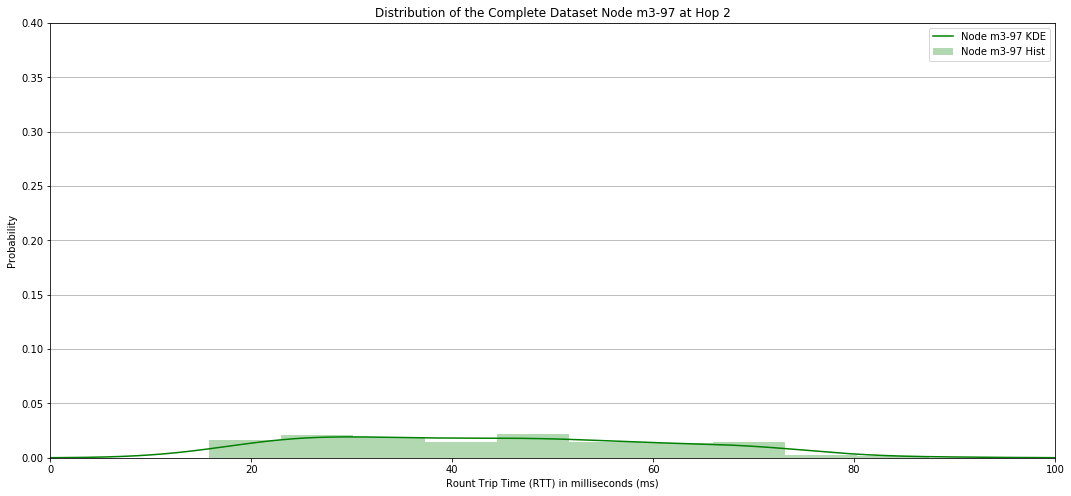

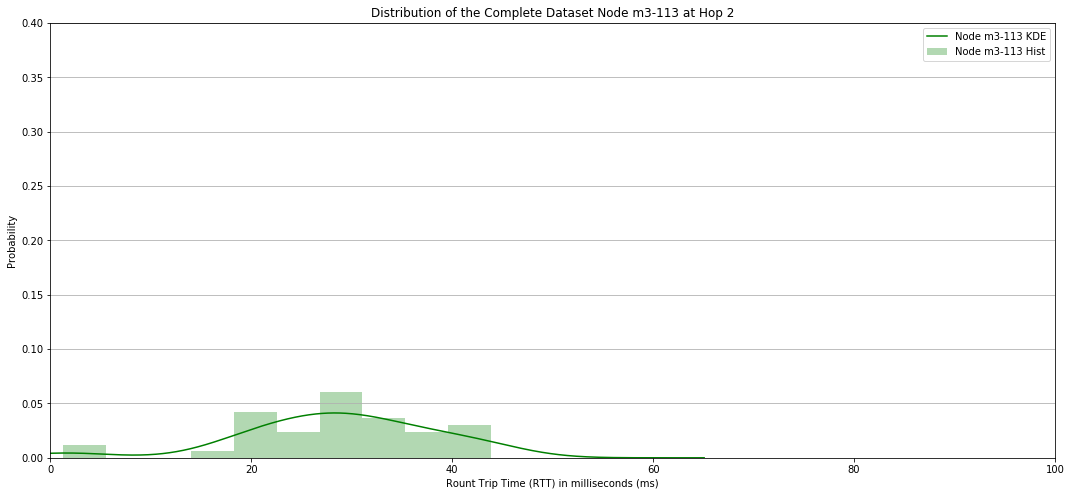

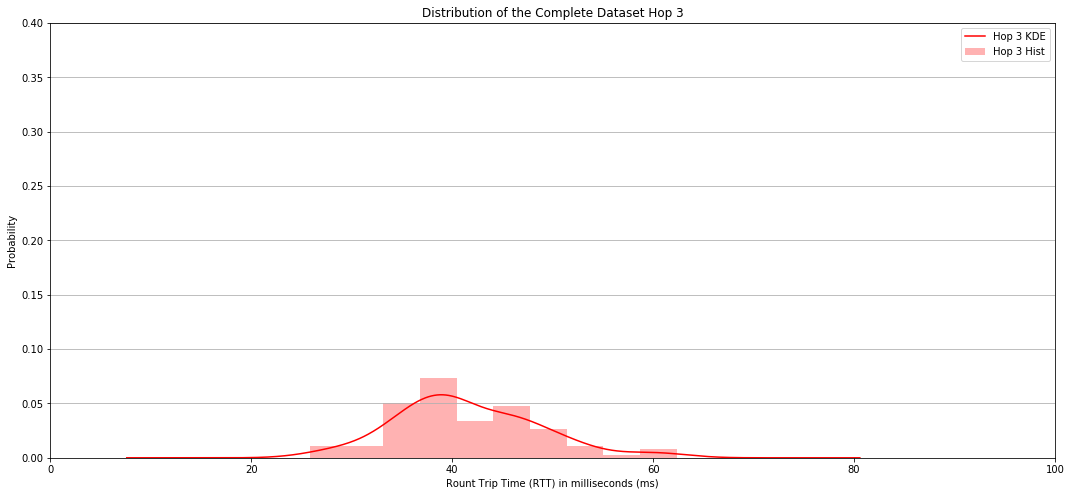

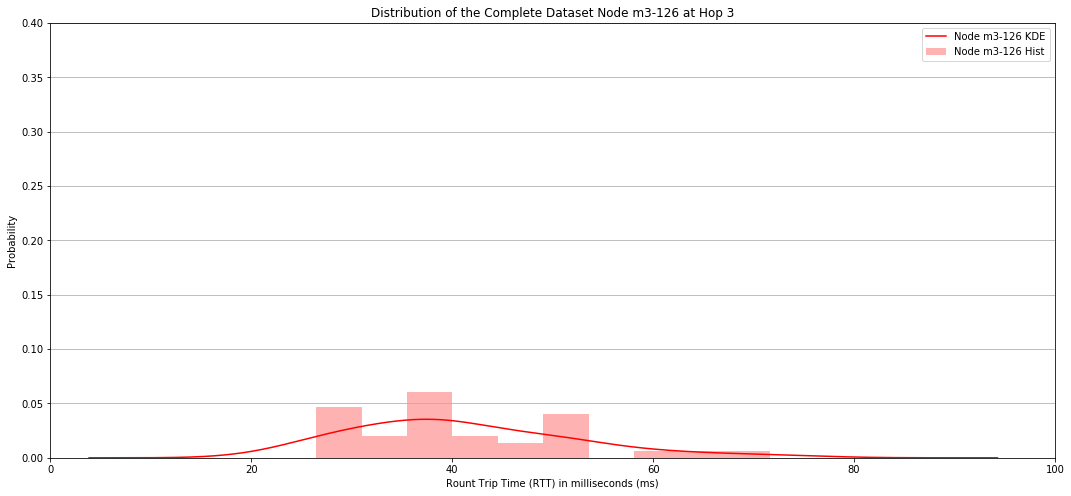

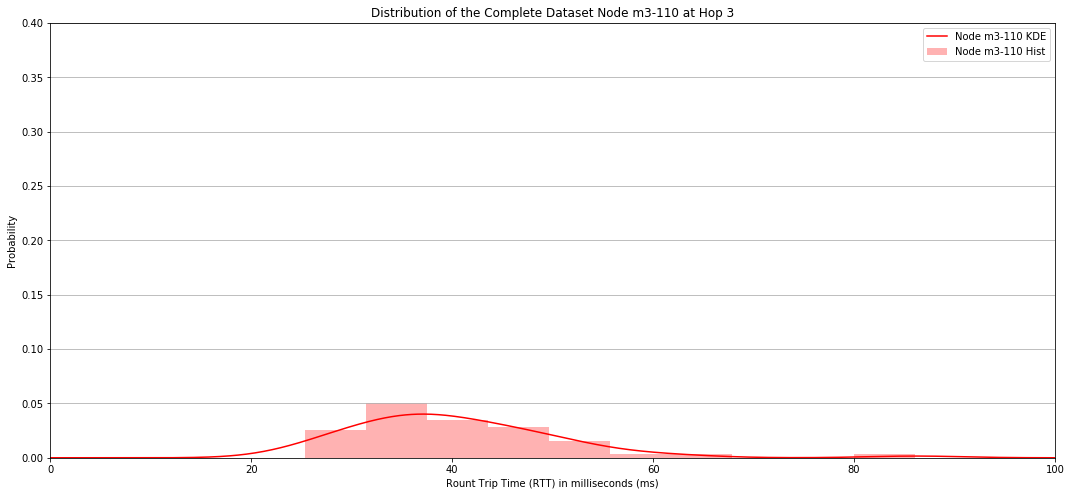

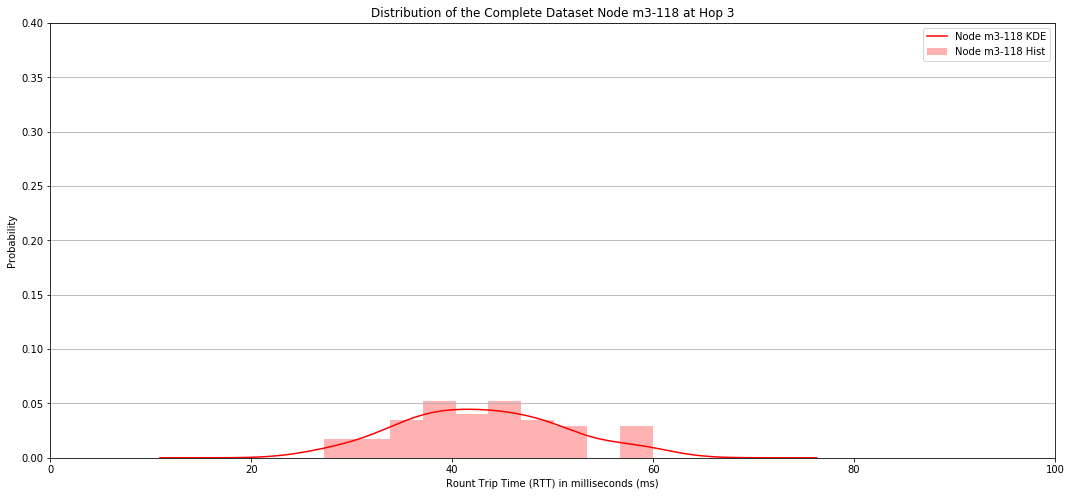

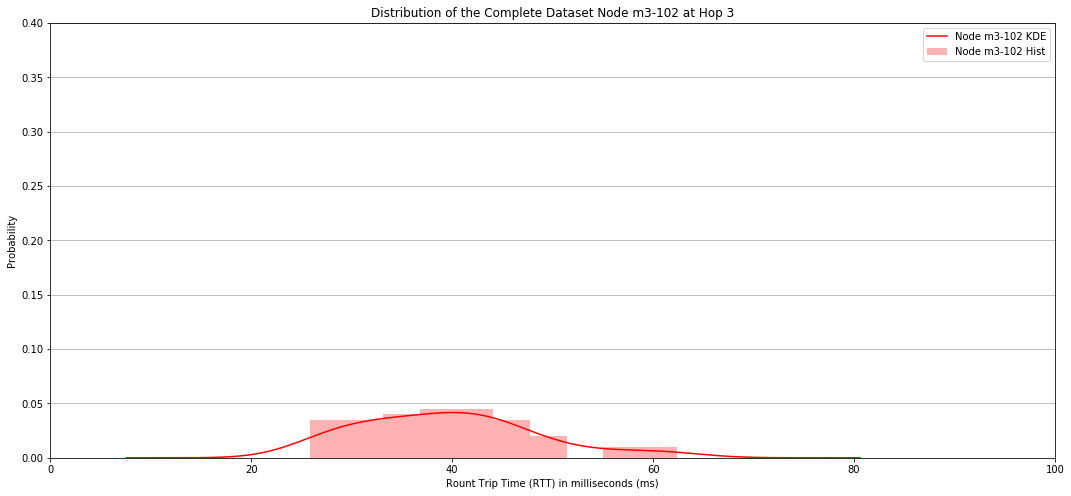

In [41]:
for hop in sorted(hops4.keys()):
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops4[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes4[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes4[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Complete dataset

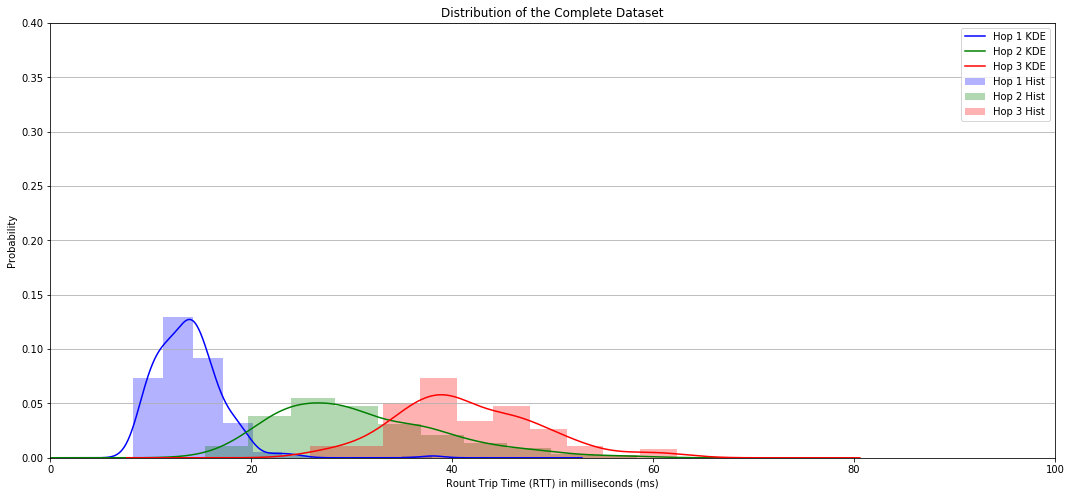

In [42]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes4.keys():
    hop_nodes4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

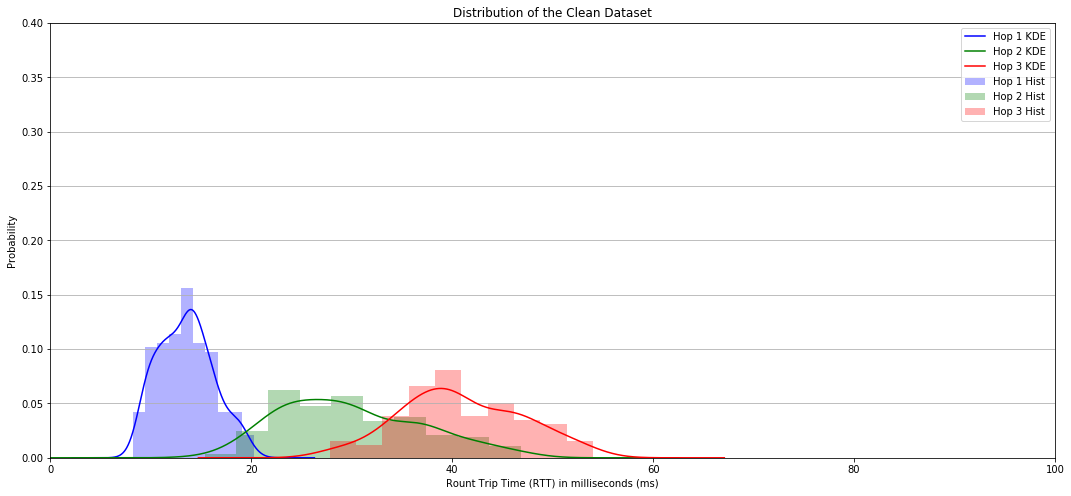

In [43]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values4.keys():
    hop_std_values4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

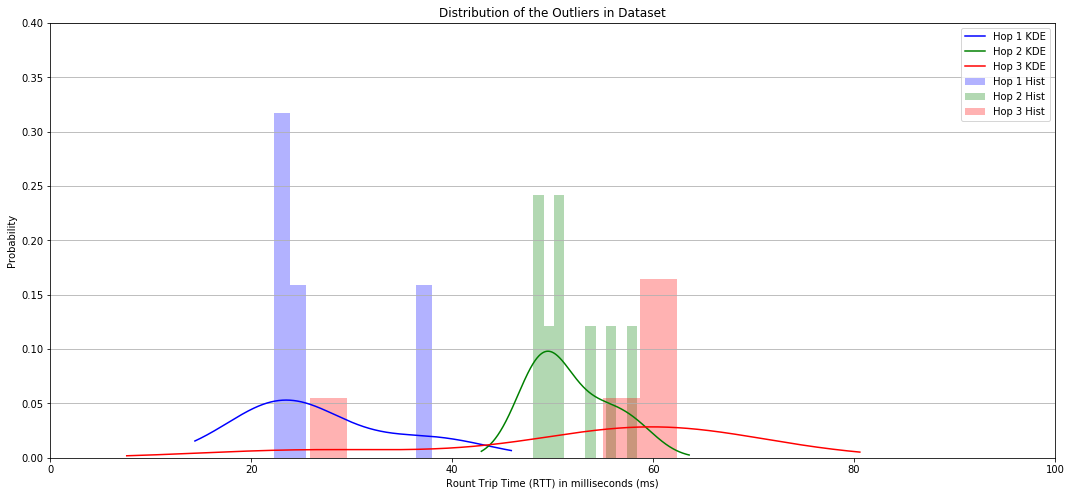

In [44]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers4.keys():
    hop_outliers4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


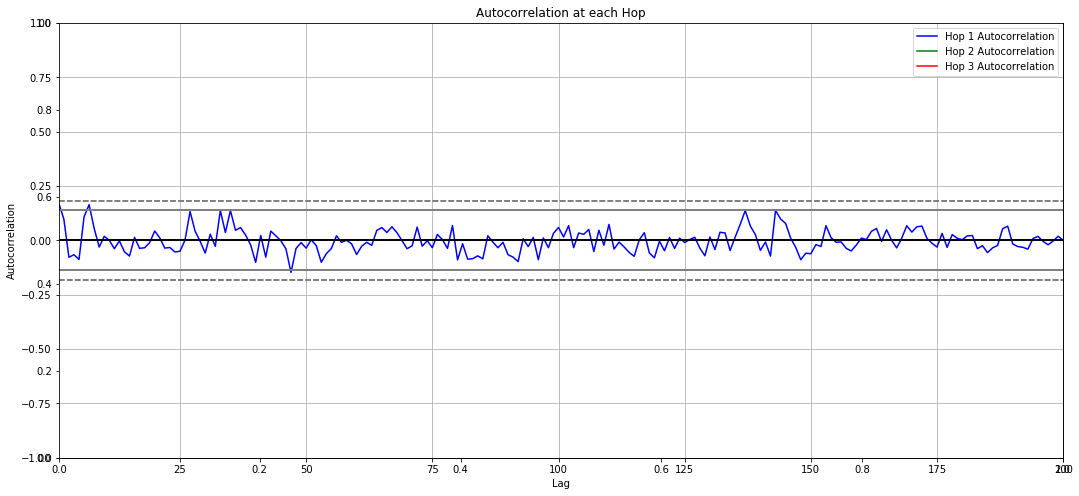

In [45]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes4.keys():
    autocorrelation_plot(hop_nodes4[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

Produce a visualization of a tumbling window

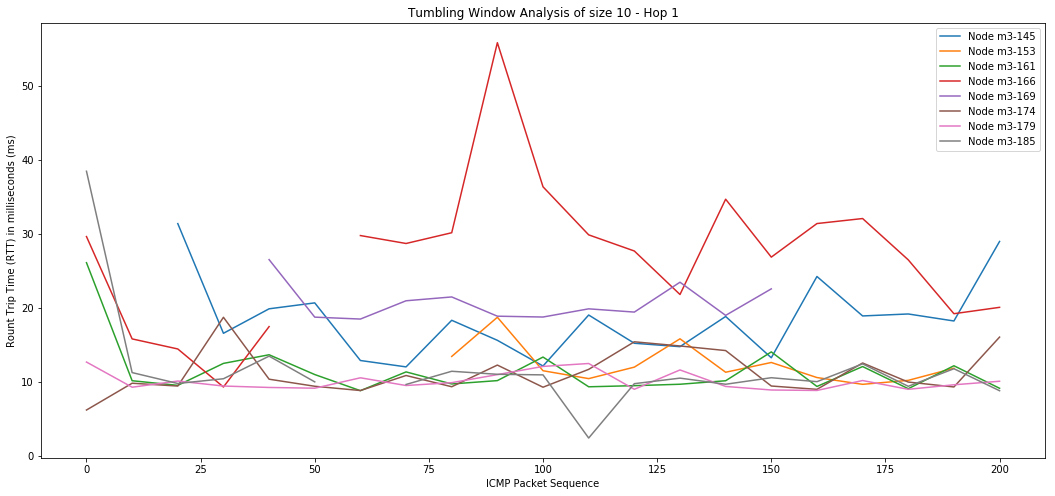

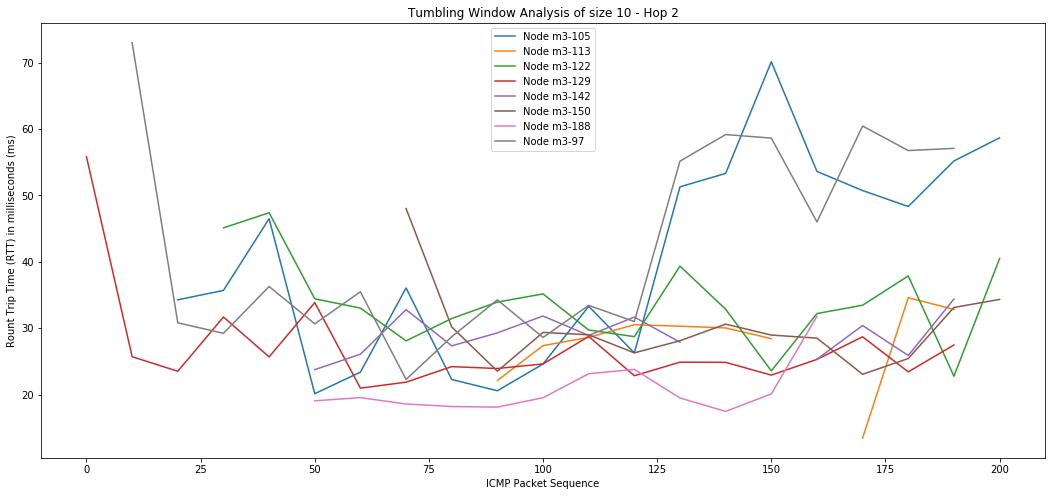

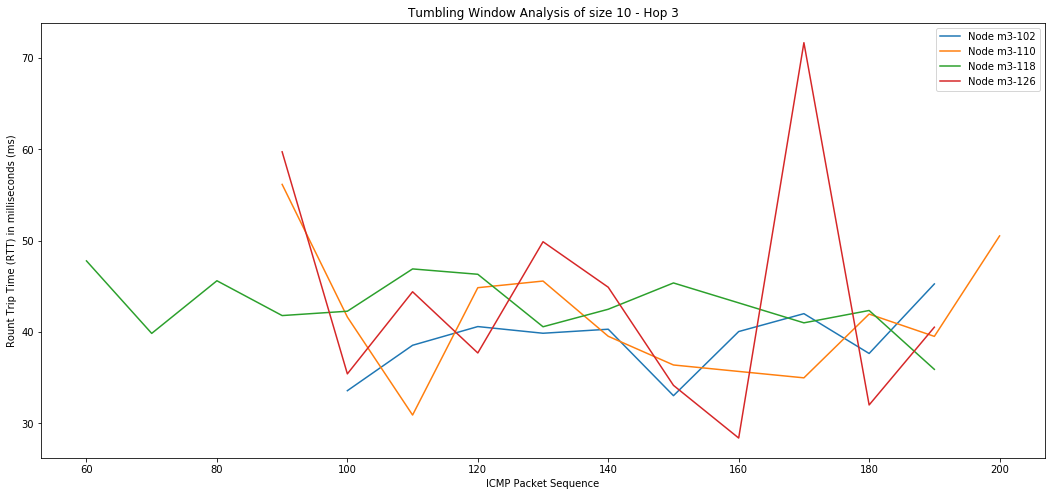

In [46]:
window_size = 10
for h in hops4.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes4:
        if node in hops4[h]:
            plt.plot(nodes4[node].groupby(nodes4[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by Hop tumbling window

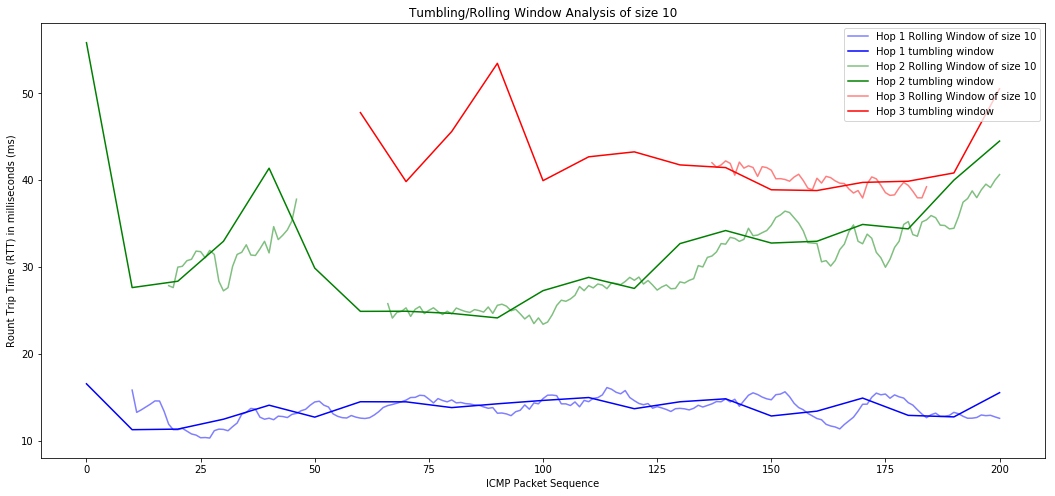

In [47]:
window_size = 10
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes4.keys():
    plt.plot(hop_nodes4[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes4[hop].groupby(hop_nodes4[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

### Statistics

For each hop

In [48]:
hop_nodes4.describe()

1           2           3
count  200.000000  187.000000  104.000000
mean    13.761554   30.813627   41.493375
std      3.389271    8.173215    7.074264
min      8.194000   15.366000   25.842000
25%     11.451829   24.532167   36.579750
50%     13.713167   29.302200   40.282167
75%     15.446625   36.332600   45.750000
max     38.009000   58.419000   62.338000

For each node

In [49]:
nodes4.describe()

m3-102      m3-105     m3-110     m3-113     m3-118     m3-122  \
count  55.000000   75.000000  52.000000  39.000000  53.000000  74.000000   
mean   39.491855   42.596520  40.428423  28.520949  43.066245  33.616743   
std     8.780387   18.775172  10.602710   9.701152   7.852264  11.492043   
min    25.842000    1.041000  25.332000   1.277000  27.253000   1.551000   
25%    32.957000   25.856000  34.195000  23.266000  37.380000  25.725000   
50%    39.168000   43.156000  39.048000  29.073000  42.695000  33.328500   
75%    44.579000   54.580500  45.783500  34.252500  48.847000  39.406750   
max    62.354000  116.186000  86.093000  43.815000  59.949000  80.878000   

          m3-126      m3-129     m3-142      m3-145    ...         m3-153  \
count  33.000000  150.000000  85.000000  108.000000    ...      99.000000   
mean   41.066333   25.311660  29.011047   17.885639    ...      12.290828   
std    10.999347    6.604156   7.877351    8.545750    ...       5.557751   
min    26.455000   16.216000   4.467000    7.662000    ...       7.244000   
25%    33.325000   21.183750  23.941000   12.051000    ...       9.156000   
50%    38.956000   24.127500  28.099000   15.391000    ...      10.111000   
75%    49.129000   27.545000  34.380000   22.792250    ...      13.557000   
max    71.675000   55.826000  59.129000   52.026000    ...      38.520000   

           m3-161      m3-166      m3-169      m3-174  m3-177      m3-179  \
count  188.000000  108.000000  108.000000  193.000000   1.000  191.000000   
mean    11.096255   24.291343   20.481935   11.243990   1.425   10.021094   
std      6.549848   12.371722    6.412211    5.923554     NaN    3.341449   
min      7.245000    1.741000    2.909000    1.415000   1.425    7.249000   
25%      8.836000   14.348000   18.306750    8.801000   1.425    8.828500   
50%      9.531000   25.292500   19.285500    9.445000   1.425    9.477000   
75%     10.474000   30.320500   20.780000   10.714000   1.425   10.429000   
max     58.391000   77.337000   54.147000   56.548000   1.425   38.009000   

           m3-185     m3-188      m3-97  
count  145.000000  99.000000  95.000000  
mean    11.214966  19.829737  44.079916  
std      5.189749   5.341620  16.936921  
min      2.446000  15.231000  15.753000  
25%      8.835000  17.470000  28.712500  
50%      9.790000  19.059000  42.607000  
75%     11.072000  20.340500  57.042000  
max     54.291000  58.918000  87.473000  

[8 rows x 21 columns]

Loss

In [50]:
pd.DataFrame([[h, str((len(hop_nodes4[h]) - hop_nodes4[h].count())/len(hop_nodes4[h])*100) +'%'] 
              for h in hop_nodes4.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 0.0%
1    2                 6.5%
2    3                48.0%

In [51]:
pd.DataFrame([[n, h, str((len(nodes4[n]) - nodes4[n].count())/len(nodes4[n])*100) +'%'] 
              for n in nodes4.keys() for h in hops4.keys() if n in hops4[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
9   m3-145    1                46.0%
17  m3-185    1                27.5%
16  m3-179    1                 4.5%
15  m3-174    1                 3.5%
14  m3-169    1                46.0%
13  m3-166    1                46.0%
12  m3-161    1                 6.0%
11  m3-153    1                50.5%
10  m3-150    2                61.0%
19   m3-97    2                52.5%
8   m3-142    2                57.5%
7   m3-129    2                25.0%
5   m3-122    2                63.0%
3   m3-113    2                80.5%
1   m3-105    2                62.5%
18  m3-188    2                50.5%
6   m3-126    3                83.5%
4   m3-118    3                73.5%
2   m3-110    3                74.0%
0   m3-102    3                72.5%

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

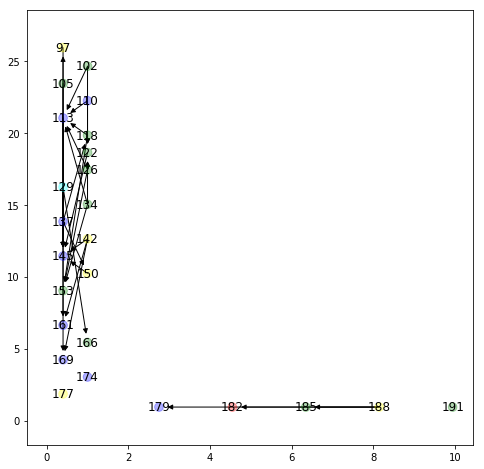

In [52]:
G4 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-2')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G4, pos=nx.get_node_attributes(G4,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G4,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G4, pos=nx.get_node_attributes(G4,'loc'), labels=nx.get_node_attributes(G4,'id'))
nx.draw_networkx_edges(G4, pos=nx.get_node_attributes(G4,'loc'))
plt.show()

## 5 Nodes are de-activated
Parse the 5th trace file with 200 packets when 5 nodes (113,122,145,166,185) are de-activated.

In [53]:
hop_nodes5 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185')
hop_std_values5, hop_outliers5 = trace_analysis.separate_outliers(hop_nodes5)

nodes5, hops5 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185')
std_values5, outliers5 = trace_analysis.separate_outliers_node_by_node(nodes5)


../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Produce Histogram of delay depending on the hop-distance from the root

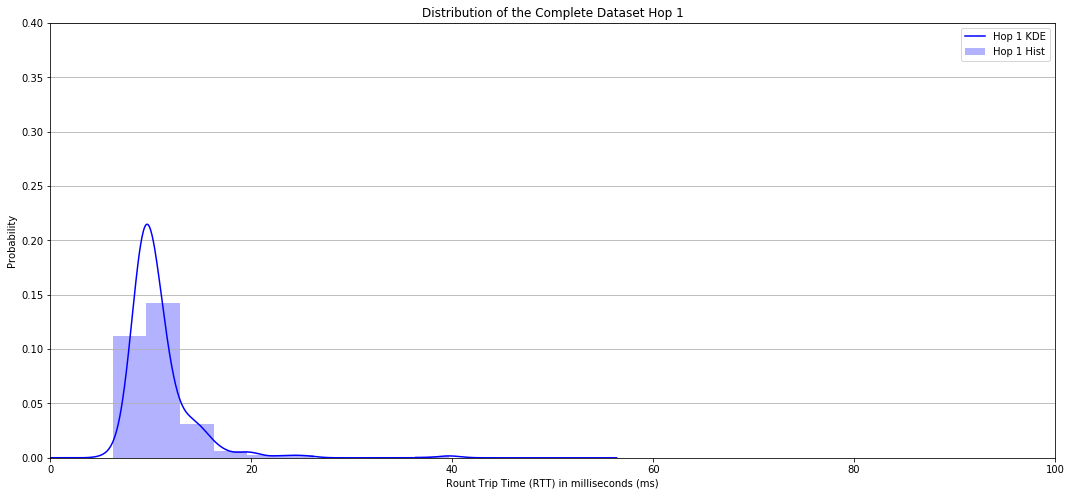

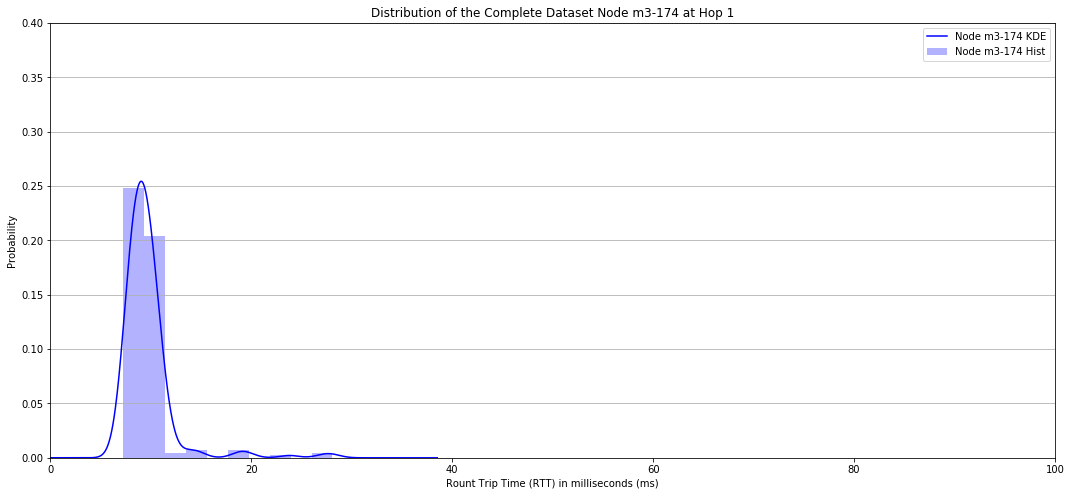

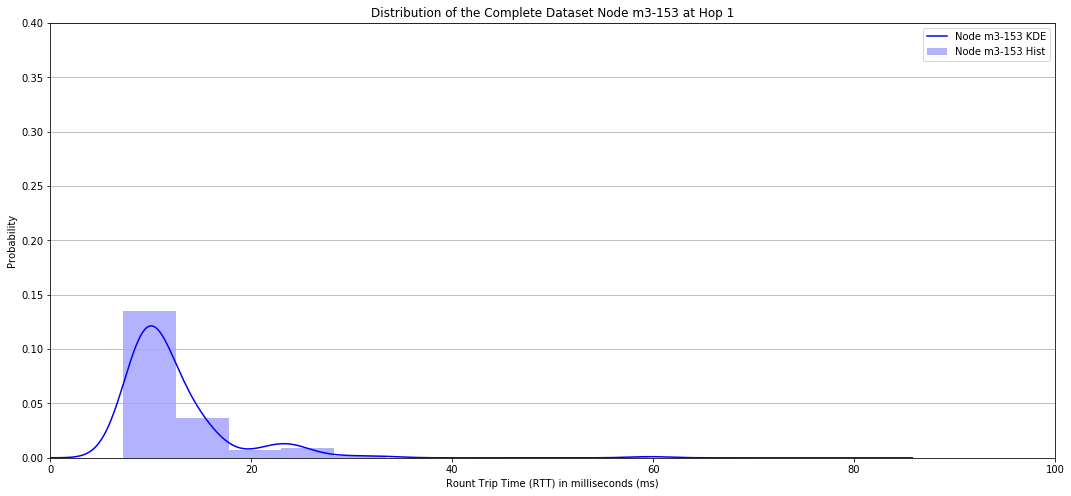

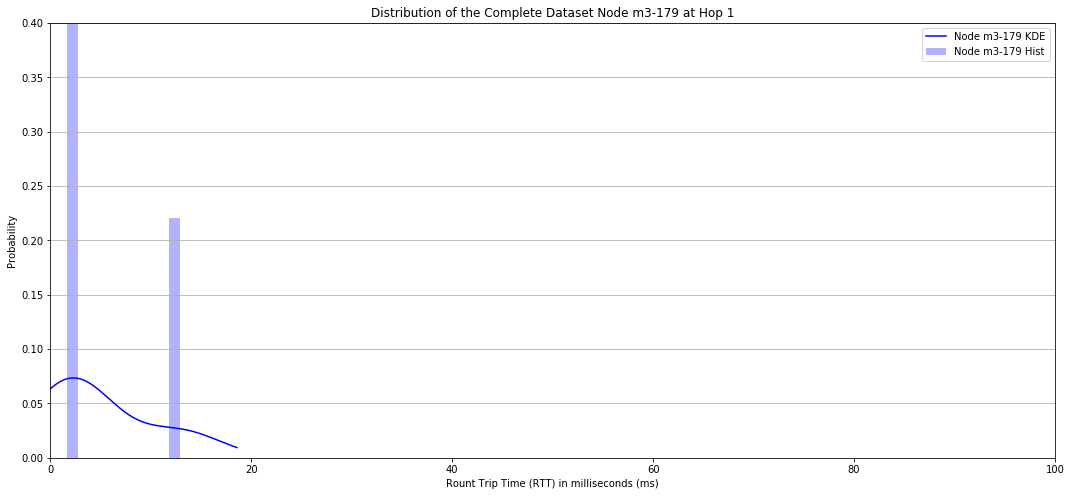

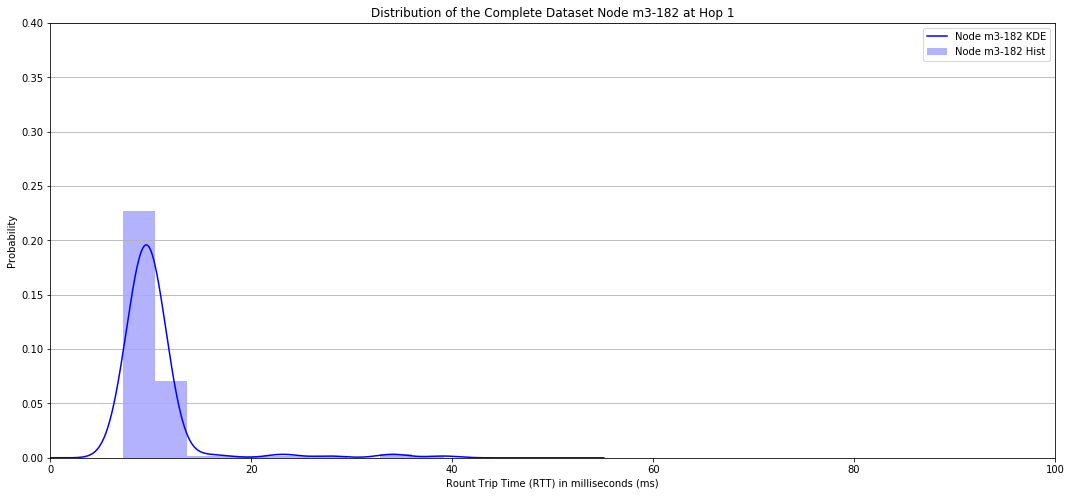

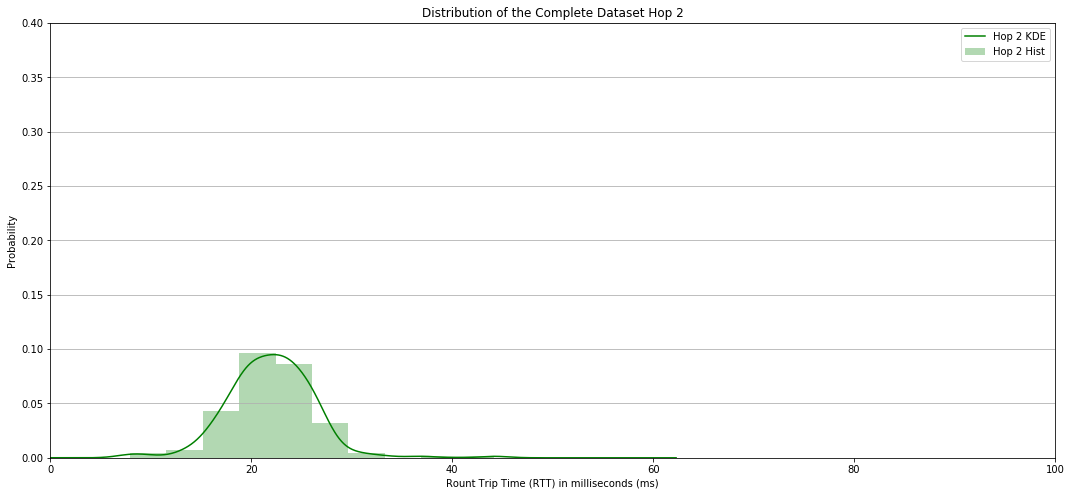

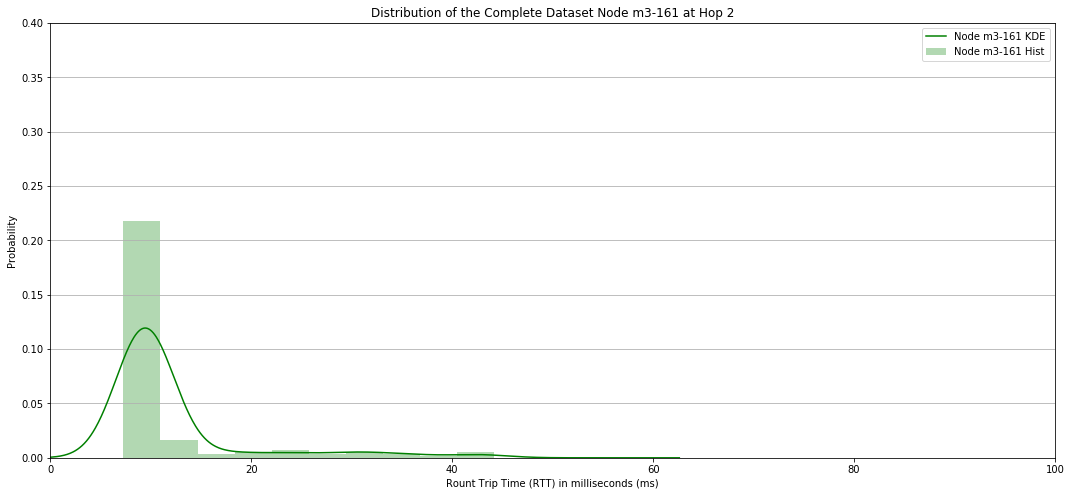

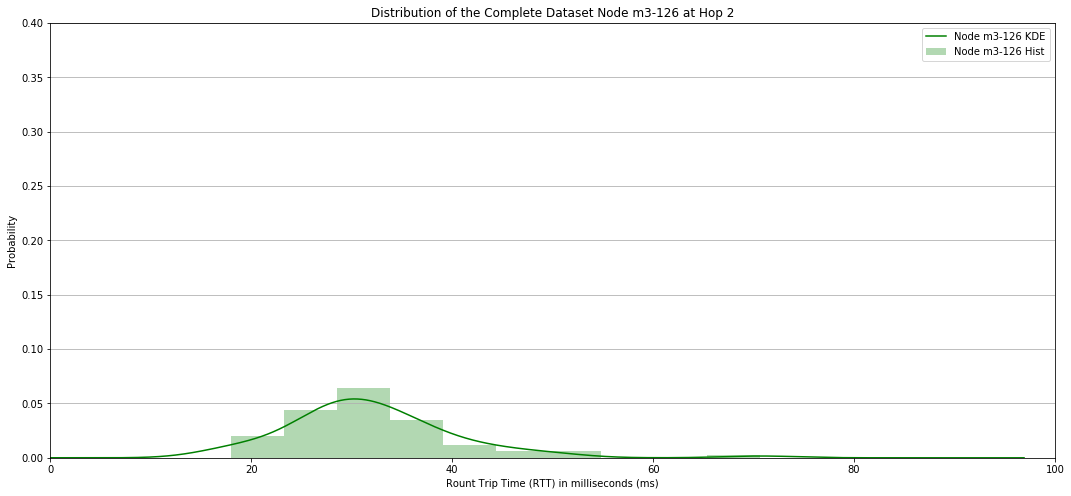

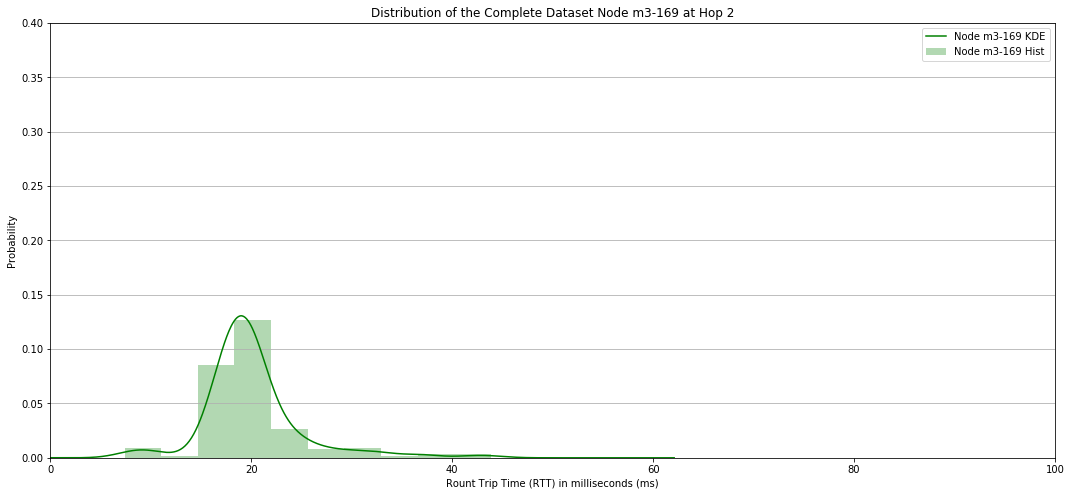

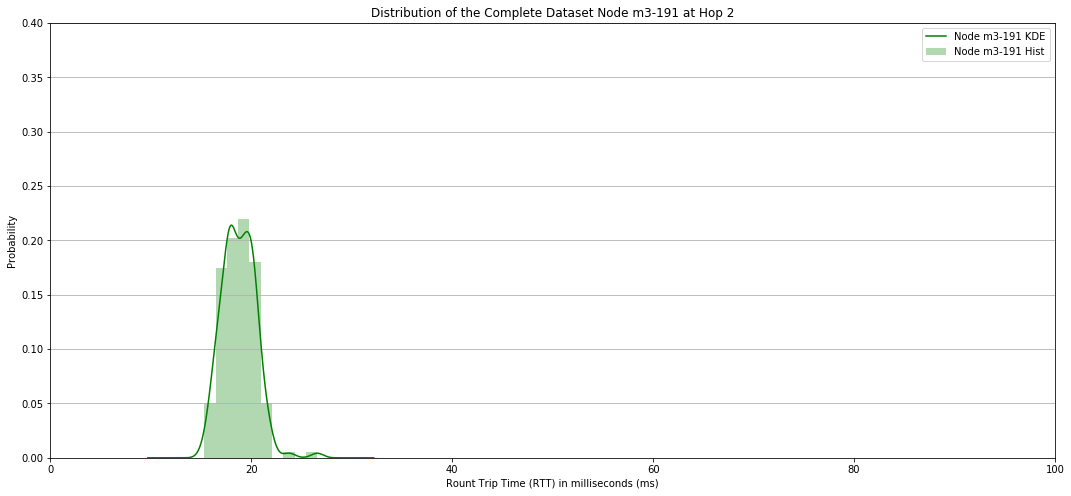

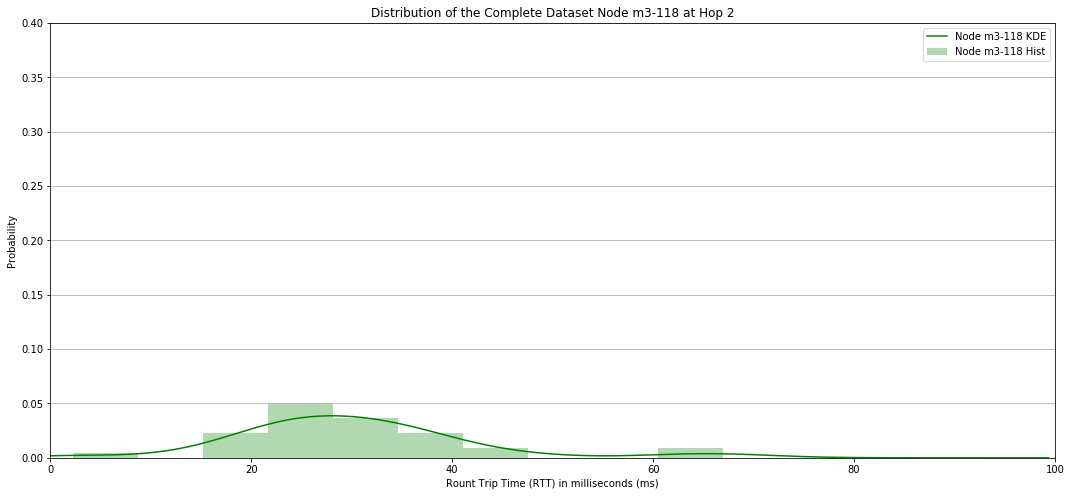

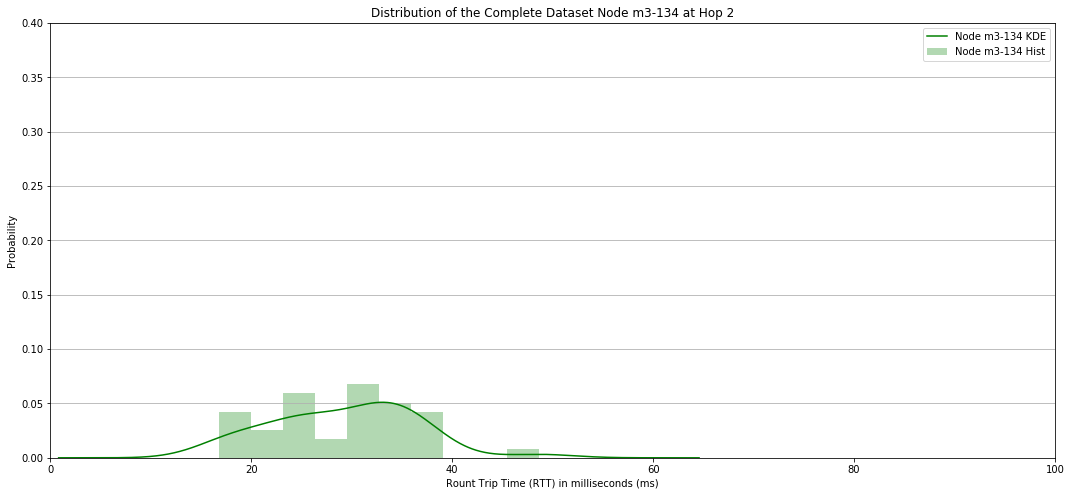

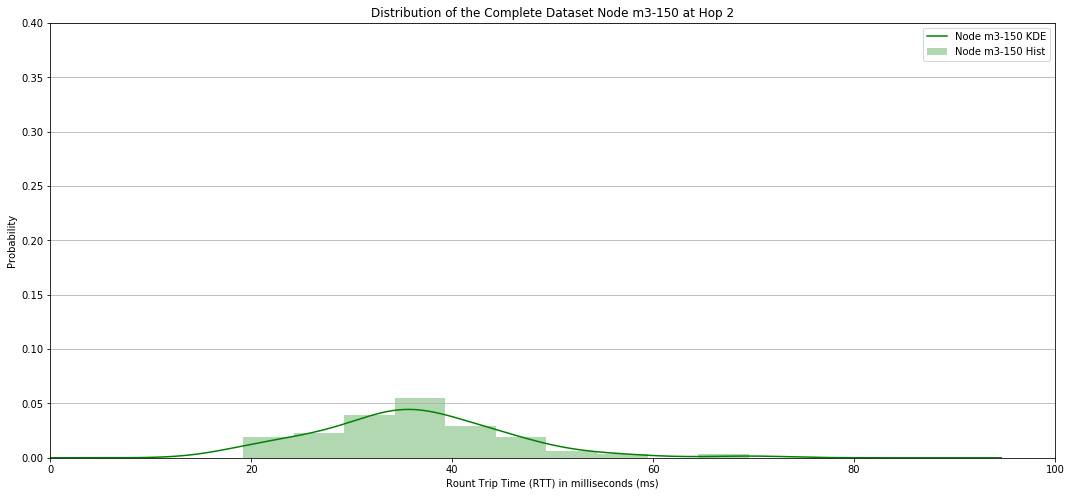

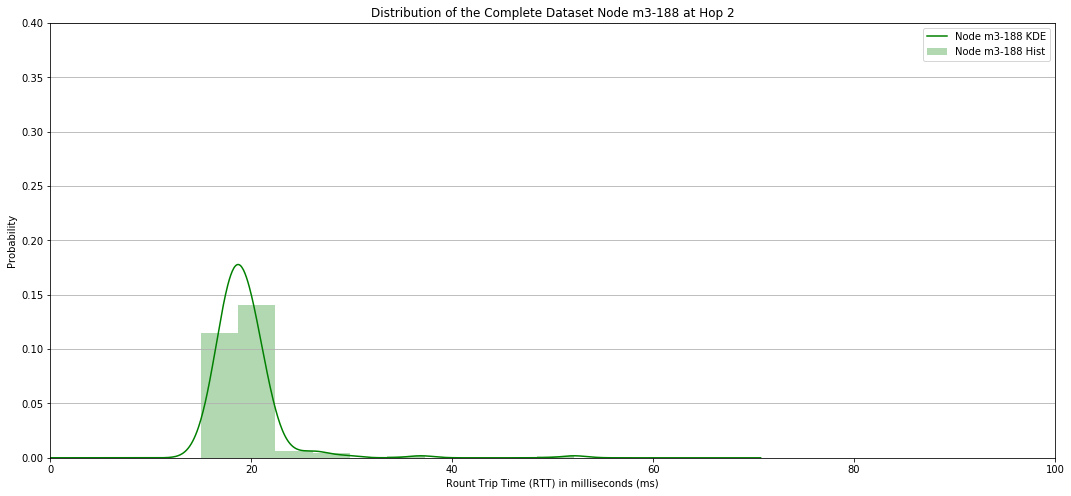

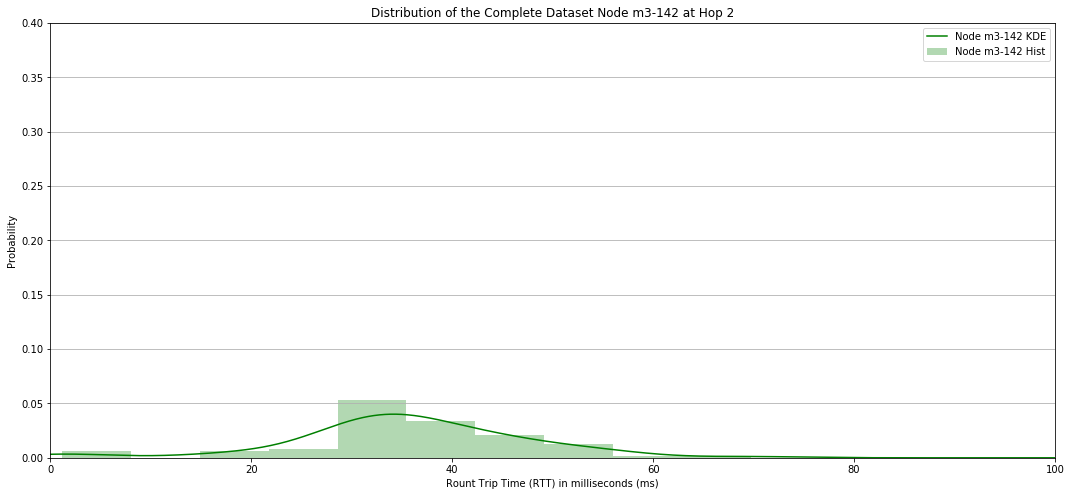

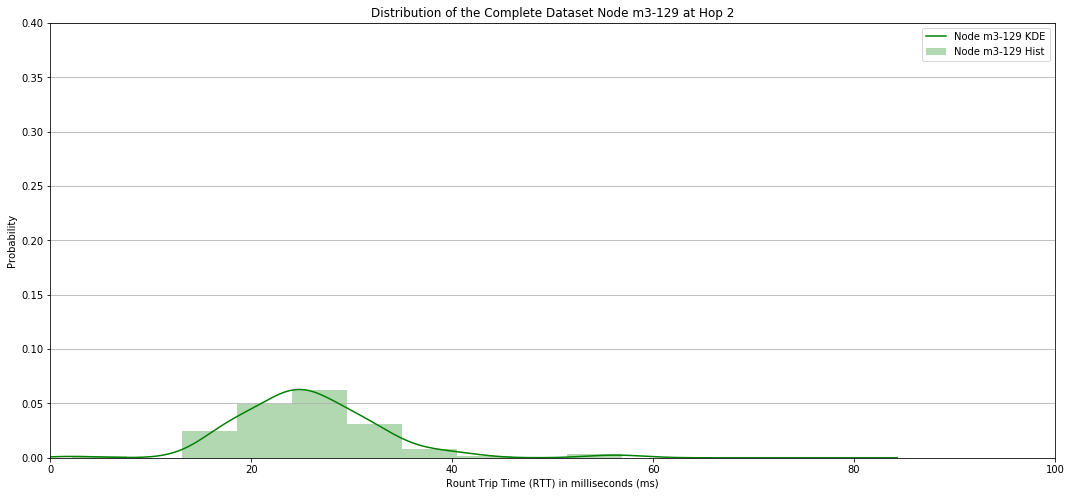

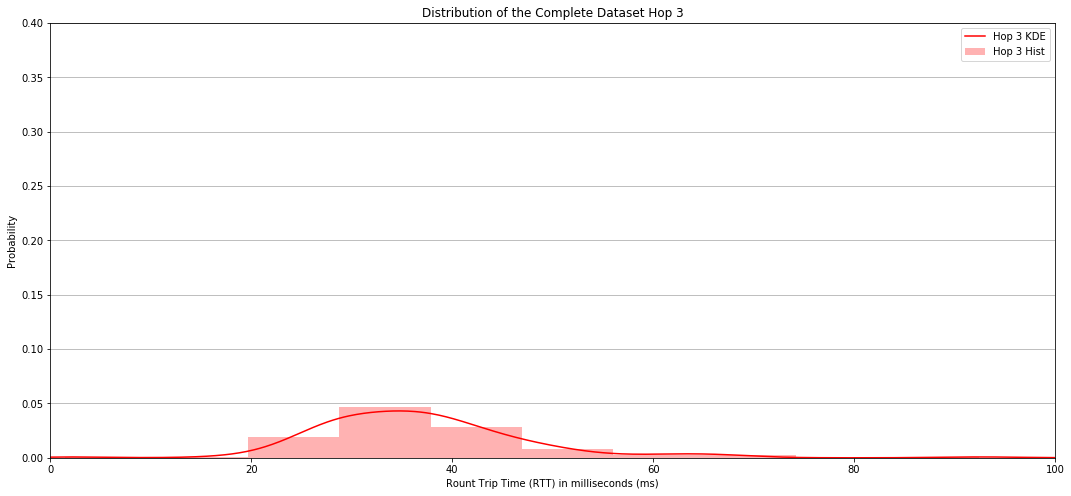

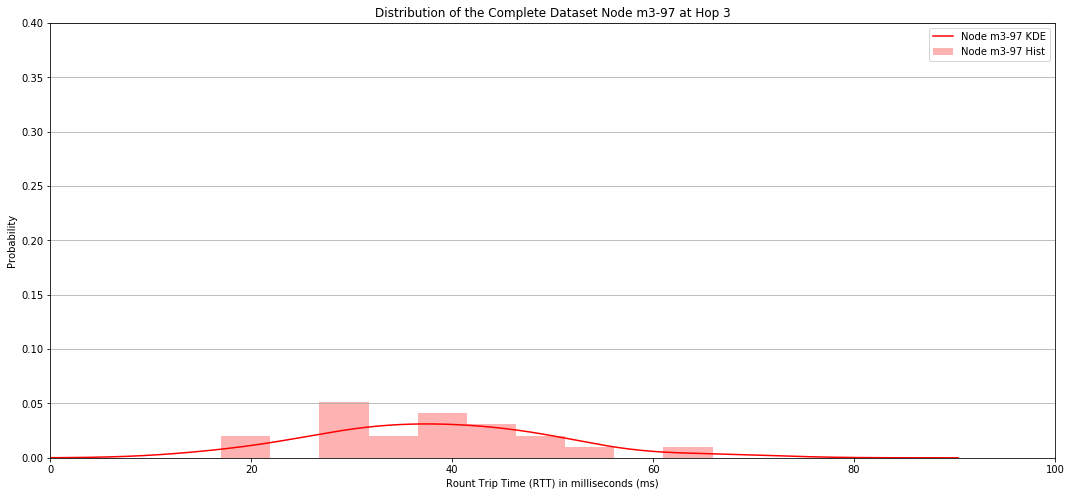

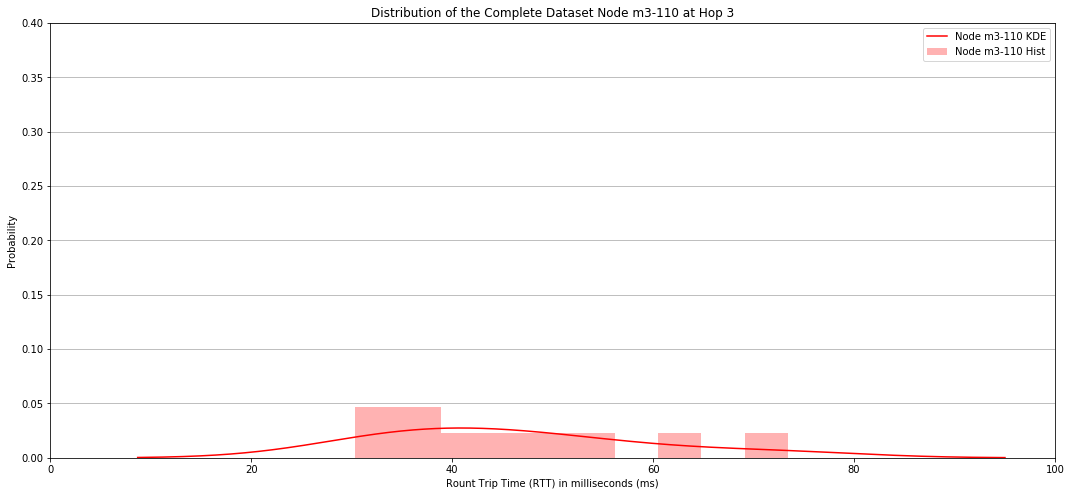

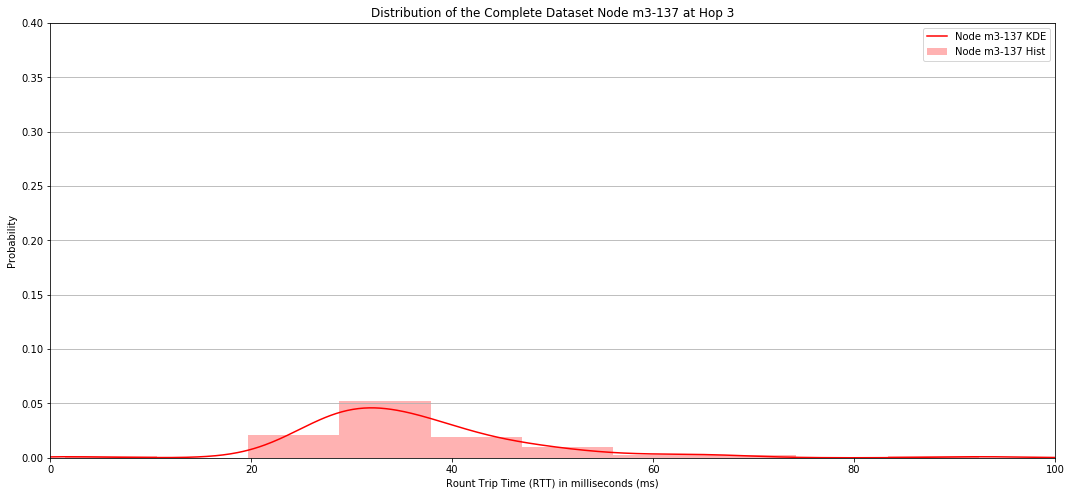

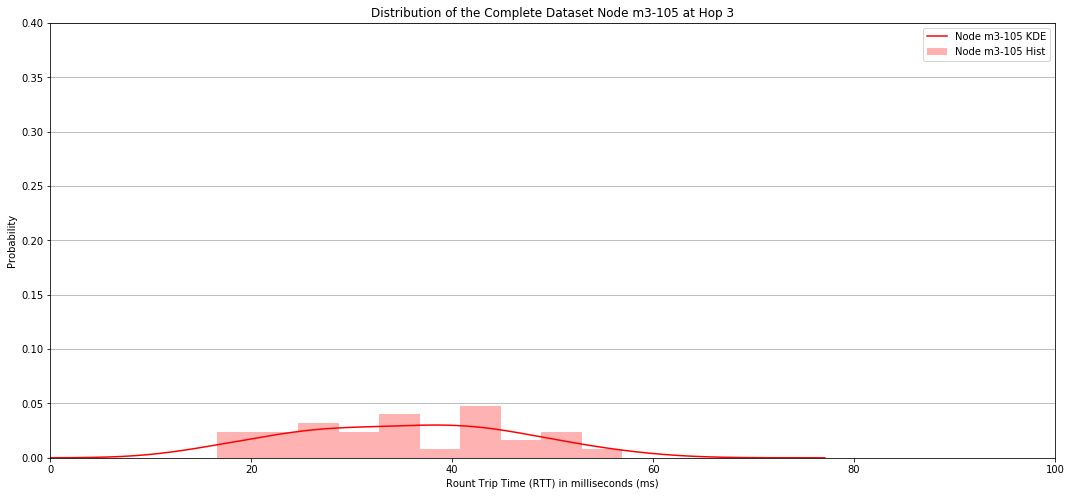

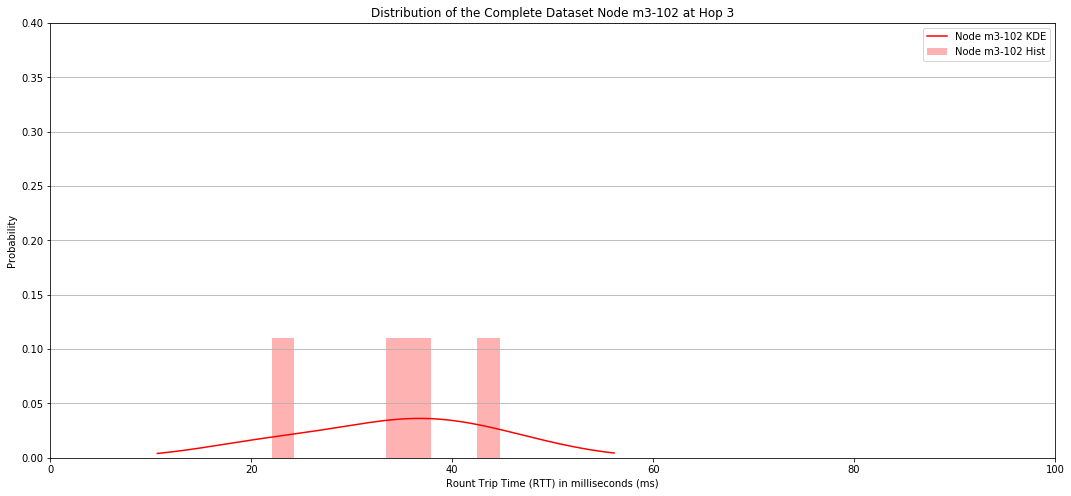

In [54]:
for hop in sorted(hops5.keys()):
    fig, ax = plt.subplots(figsize=(18, 8))
    hop_nodes5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset Hop ' + str(hop))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.4])
    ax.legend()
    plt.show()
    
    for node in hops5[hop]:
        fig, ax = plt.subplots(figsize=(18, 8))
        nodes5[node].plot.kde(ax=ax, color=color[hop], label='Node ' + str(node) + ' KDE')
        nodes5[node].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

        ax.set_ylabel('Probability')
        ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
        ax.grid(axis='y')
        ax.set_title('Distribution of the Complete Dataset Node ' + str(node) + ' at Hop ' + str(hop))
        ax.set_xlim([0, 100])
        ax.set_ylim([0,0.4])
        ax.legend()
        plt.show()

Complete dataset

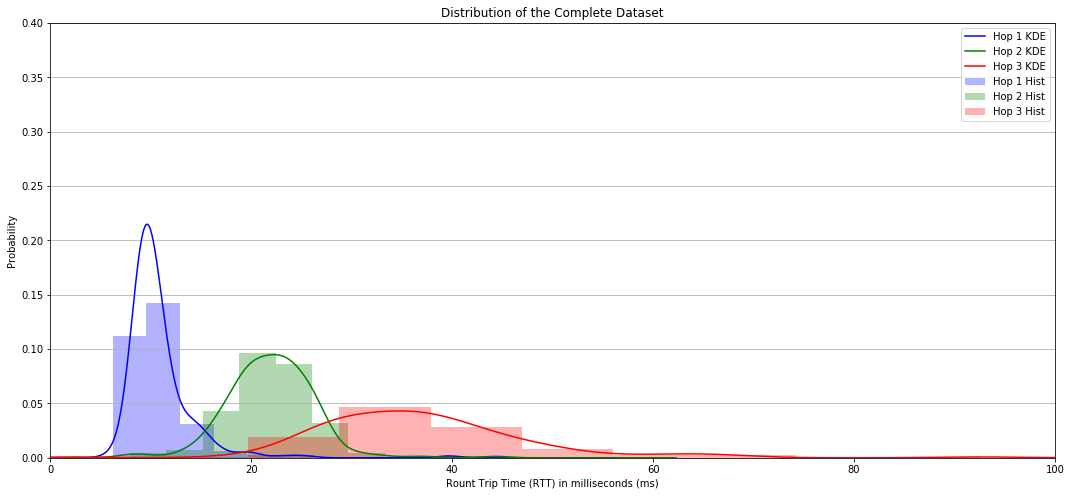

In [55]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes5.keys():
    hop_nodes5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

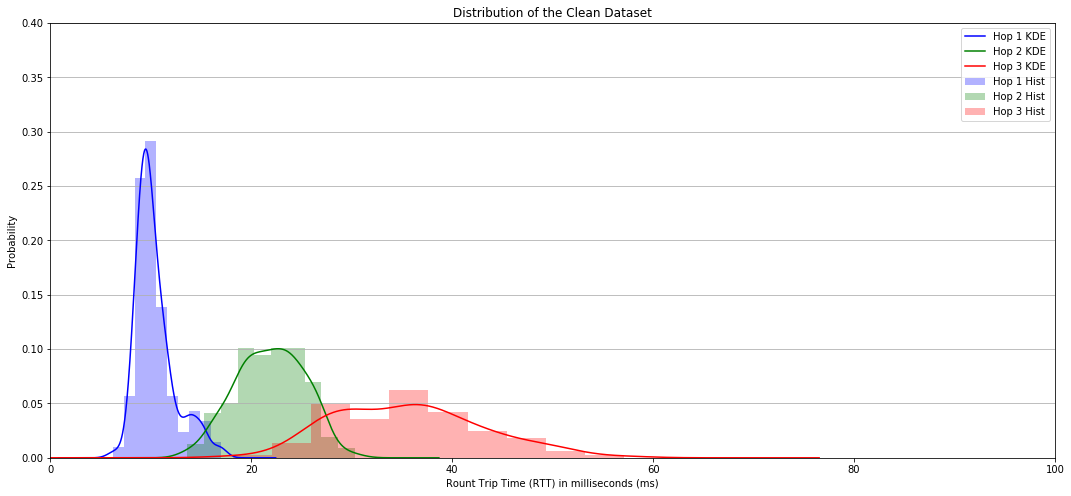

In [56]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_std_values5.keys():
    hop_std_values5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_std_values5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

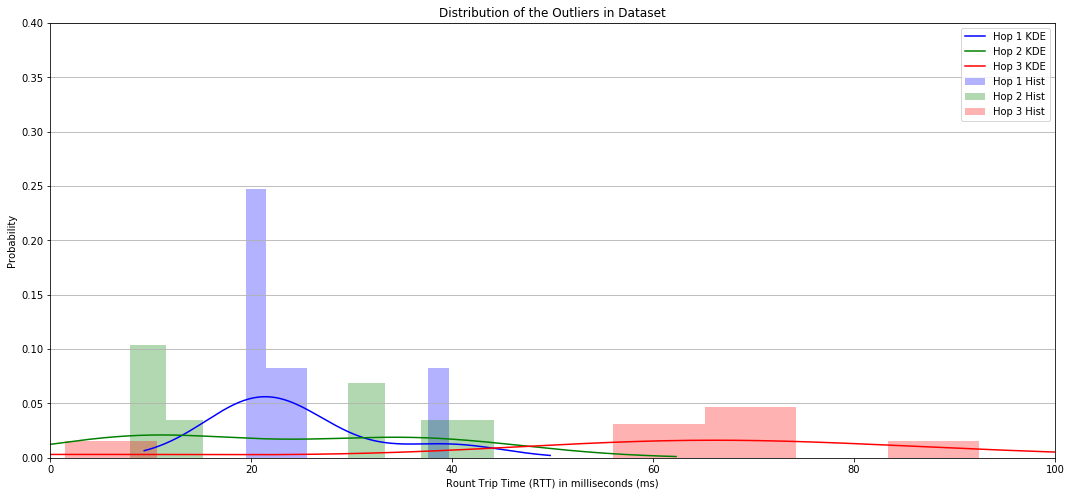

In [57]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_outliers5.keys():
    hop_outliers5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_outliers5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


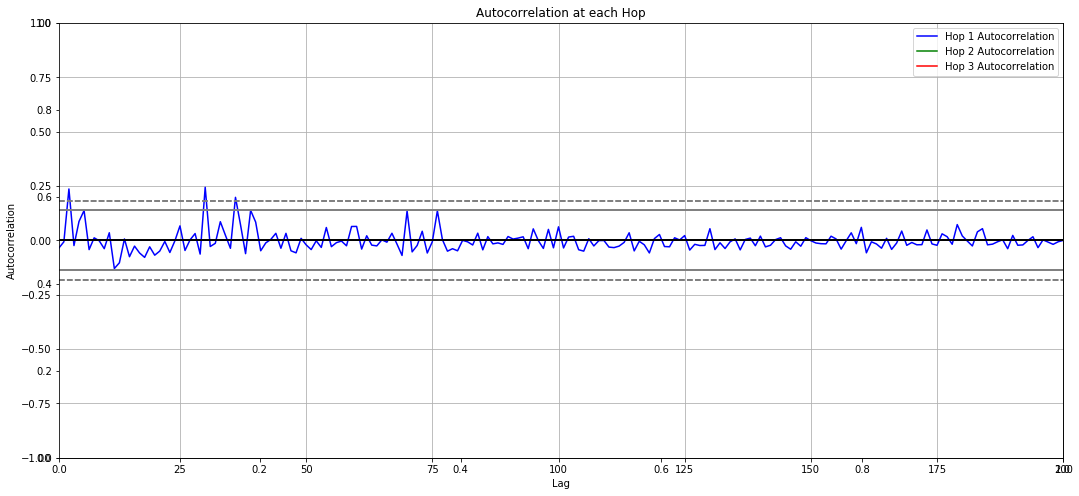

In [58]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes5.keys():
    autocorrelation_plot(hop_nodes5[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

Produce a visualization of a tumbling window

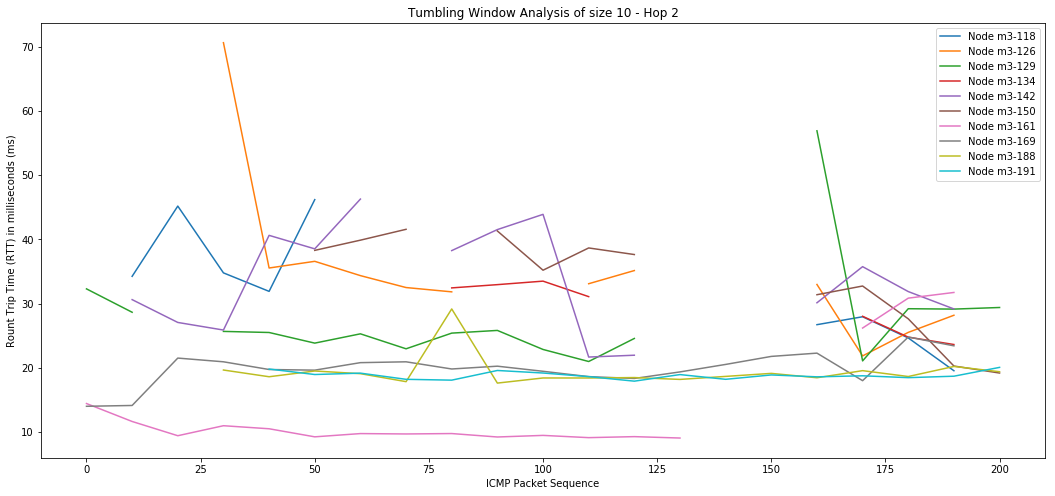

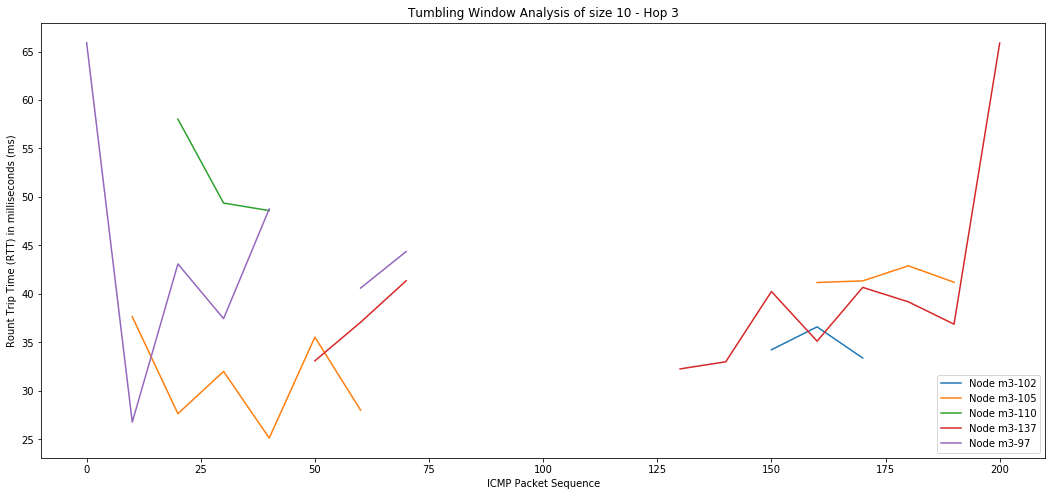

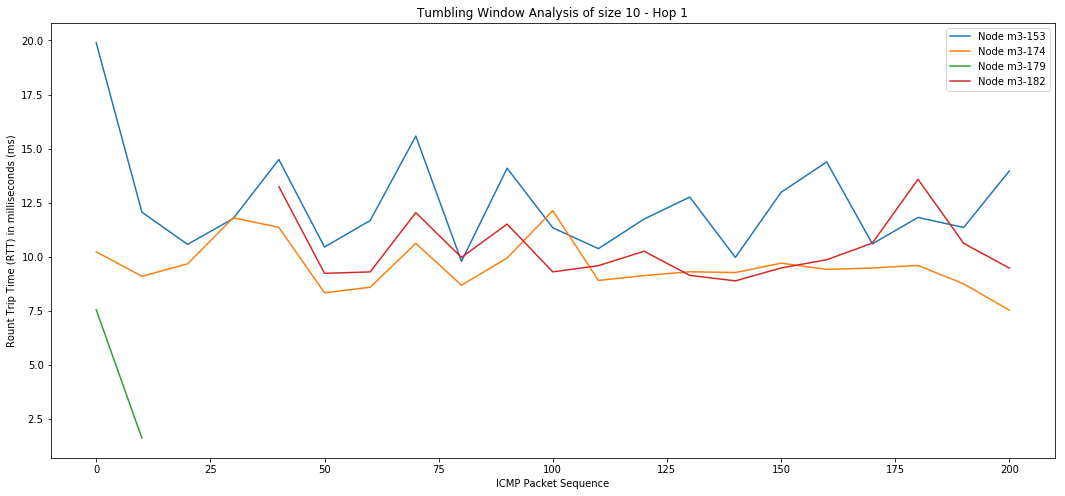

In [59]:
window_size = 10
for h in hops5.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for node in nodes5:
        if node in hops5[h]:
            plt.plot(nodes5[node].groupby(nodes5[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

    plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
    plt.legend()

    


Hop by Hop tumbling window

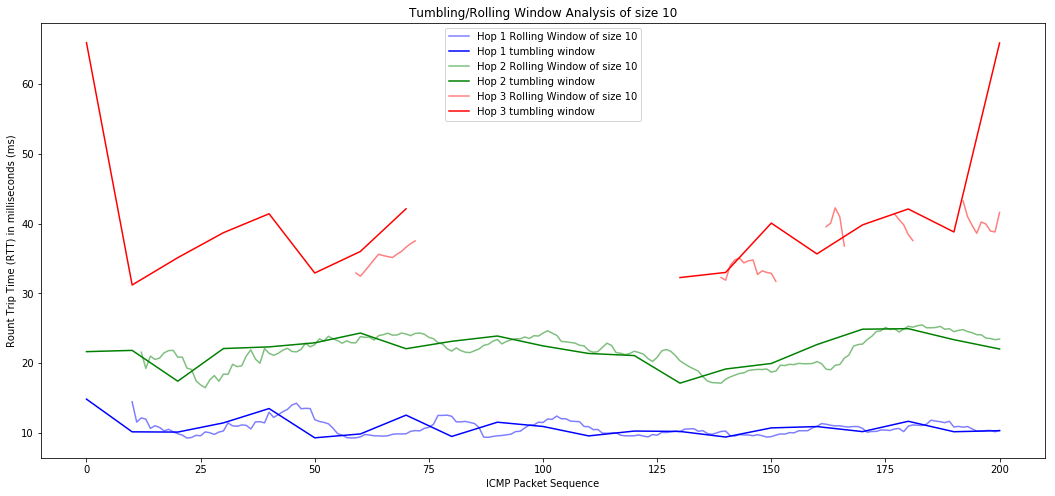

In [60]:
window_size = 10
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')

for hop in hop_nodes5.keys():
    plt.plot(hop_nodes5[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
    plt.plot(hop_nodes5[hop].groupby(hop_nodes5[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
plt.legend()

### Statistics

For each hop

In [61]:
hop_nodes5.describe()

1           2           3
count  200.000000  198.000000  122.000000
mean    10.813202   21.929574   37.021839
std      3.320236    4.312484   10.915887
min      6.213333    7.903000    1.462000
25%      9.152083   19.339958   29.917750
50%      9.833500   21.986062   35.813250
75%     11.255167   24.477702   41.251500
max     39.650500   44.162000   92.450000

For each node

In [62]:
nodes5.describe()

m3-102     m3-105     m3-110     m3-118     m3-126      m3-129  \
count   4.000000  31.000000  10.000000  34.000000  65.000000  111.000000   
mean   34.396000  35.263452  46.210700  30.447441  32.010554   25.838883   
std     9.405943  10.693410  13.441361  12.032272   8.610172    7.277284   
min    22.011000  16.598000  30.272000   2.220000  18.020000    2.114000   
25%    31.175250  27.348500  37.539750  23.611250  27.392000   22.070000   
50%    35.412500  35.565000  43.708000  28.220500  30.882000   24.954000   
75%    38.633250  42.548000  51.741750  34.905750  36.302000   29.240000   
max    44.748000  56.930000  73.448000  66.992000  70.629000   56.910000   

          m3-134     m3-137     m3-142     m3-150      m3-153      m3-161  \
count  37.000000  88.000000  69.000000  61.000000  184.000000  148.000000   
mean   29.204135  36.339125  35.510159  36.145131   12.362190   11.998689   
std     7.101918  11.440699  11.934684   9.410589    5.816059    7.314952   
min    16.754000   1.462000   1.159000  19.199000    7.258000    7.261000   
25%    24.787000  29.525750  30.751000  30.461000    9.189000    8.771750   
50%    30.817000  34.476000  35.426000  35.532000   10.463000    9.808000   
75%    34.622000  40.332000  42.454000  41.538000   13.170000   10.768250   
max    48.638000  92.450000  69.716000  69.510000   59.624000   44.162000   

           m3-169      m3-174     m3-179      m3-182      m3-188      m3-191  \
count  177.000000  197.000000   4.000000  159.000000  167.000000  158.000000   
mean    20.074277    9.663071   4.848750   10.383862   19.347629   18.771690   
std      4.981465    2.728674   5.397786    4.312207    3.600988    1.652521   
min      7.380000    7.212000   1.606000    7.241000   14.950000   15.319000   
25%     17.934000    8.480000   2.020750    8.844500   17.790500   17.629000   
50%     19.234000    9.126000   2.436000    9.483000   18.784000   18.829000   
75%     20.826000   10.080000   5.264000   10.442000   20.061500   20.081500   
max     43.860000   28.078000  12.917000   39.141000   52.119000   26.564000   

           m3-97  
count  20.000000  
mean   38.429000  
std    11.475884  
min    16.996000  
25%    30.206000  
50%    37.775500  
75%    45.477750  
max    65.915000

Loss

In [63]:
pd.DataFrame([[h, str((len(hop_nodes5[h]) - hop_nodes5[h].count())/len(hop_nodes5[h])*100) +'%'] 
              for h in hop_nodes5.keys()], 
             columns=['Hop','Probability of Error']).sort_values(by=['Hop']).sort_values(by=['Hop'])


Hop Probability of Error
0    1                 0.0%
1    2                 1.0%
2    3                39.0%

In [64]:
pd.DataFrame([[n, h, str((len(nodes5[n]) - nodes5[n].count())/len(nodes5[n])*100) +'%'] 
              for n in nodes5.keys() for h in hops5.keys() if n in hops5[h]], 
             columns=['Node', 'Hop','Probability of Error']).sort_values(by=['Hop'])




Node  Hop Probability of Error
15  m3-182    1                20.5%
14  m3-179    1                98.0%
10  m3-153    1                 8.0%
13  m3-174    1                 1.5%
9   m3-150    2                69.5%
16  m3-188    2                16.5%
3   m3-118    2                83.0%
4   m3-126    2                67.5%
5   m3-129    2                44.5%
6   m3-134    2                81.5%
8   m3-142    2                65.5%
17  m3-191    2                21.0%
11  m3-161    2                26.0%
12  m3-169    2                11.5%
0   m3-102    3                98.0%
2   m3-110    3                95.0%
1   m3-105    3                84.5%
7   m3-137    3                56.0%
18   m3-97    3                90.0%

Packet loss in a tumbling window

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

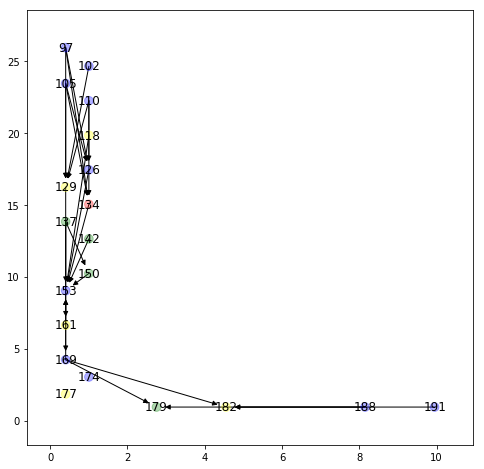

In [65]:
G4 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G4, pos=nx.get_node_attributes(G4,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G4,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G4, pos=nx.get_node_attributes(G4,'loc'), labels=nx.get_node_attributes(G4,'id'))
nx.draw_networkx_edges(G4, pos=nx.get_node_attributes(G4,'loc'))
plt.show()